In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
!echo $CUDA_VISIBLE_DEVICES

1


In [3]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [4]:
from examples.dw4 import *
import target.double_well as dw4
from examples.train import plot_sample_hist, eval_fn, original_dataset_to_joint_dataset, default_plotter
import yaml
import matplotlib.pyplot as plt

/scratch/lim24/augmented-equivariant-flows/examples/train.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2023-02-12 21:30:43.440092: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-12 21:30:43.440252: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-12 21:30:43.440268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

In [5]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [6]:
cfg = DictConfig(yaml.safe_load(open("examples/config/dw4.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'target': {'aug_global_centering': False, 'aug_scale': 1.0, 'custom_samples': True, 'temperature': 0.1}, 'flow': {'dim': 2, 'nodes': 4, 'n_layers': 4, 'identity_init': True, 'type': ['proj', 'nice'], 'kwargs': {'proj_v2': {'global_frame': False, 'process_flow_params_jointly': False, 'gram_schmidt': False, 'mlp_function_units': [16]}}, 'act_norm': False, 'fast_compile': True, 'compile_n_unroll': 1, 'egnn': {'emile_net': False, 'mlp_units': [32, 32], 'n_layers': 3, 'normalize_by_norms': True, 'variance_scaling_init': 0.001, 'tanh': False, 'agg': 'mean', 'phi_x_max': 1.0, 'h': {'linear_softmax': True, 'share_h': True}}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 3, 'key_size': 4, 'w_init_scale': 0.1, 'n_layers': 3}}, 'training': {'lr': '4e-4', 'use_64_bit': False, 'optimizer_name': 'adam', 'n_epoch': 50, 'batch_size': 100, 'plot_batch_size': 256, 'max_global_norm': None, 'seed': 0, 'reload_aug_per_epoch': True, 'train_set_size': 1000, 'test_se

# Plainest flow (nice), high temp.

In [7]:
cfg.target.temperature=1.0
load_dataset = partial(load_dataset_custom, temperature=cfg.target.temperature)

In [8]:
cfg.training.lr = 6e-4
cfg.flow.egnn.mlp_units = (32, 32)
cfg.flow.n_layers=3


cfg.target.aug_global_centering = False
cfg.target.aug_scale = 1.0

cfg.flow.egnn.n_layers = 3
cfg.training.batch_size = 100
cfg.training.n_epoch = 100
cfg.training.save = False
cfg.training.plot_batch_size = 256
cfg.logger = DictConfig({"list_logger": None})

cfg.flow.type= "nice"
cfg.flow.act_norm = False

creating flow of type nice
training data shape of (1000, 4, 2)


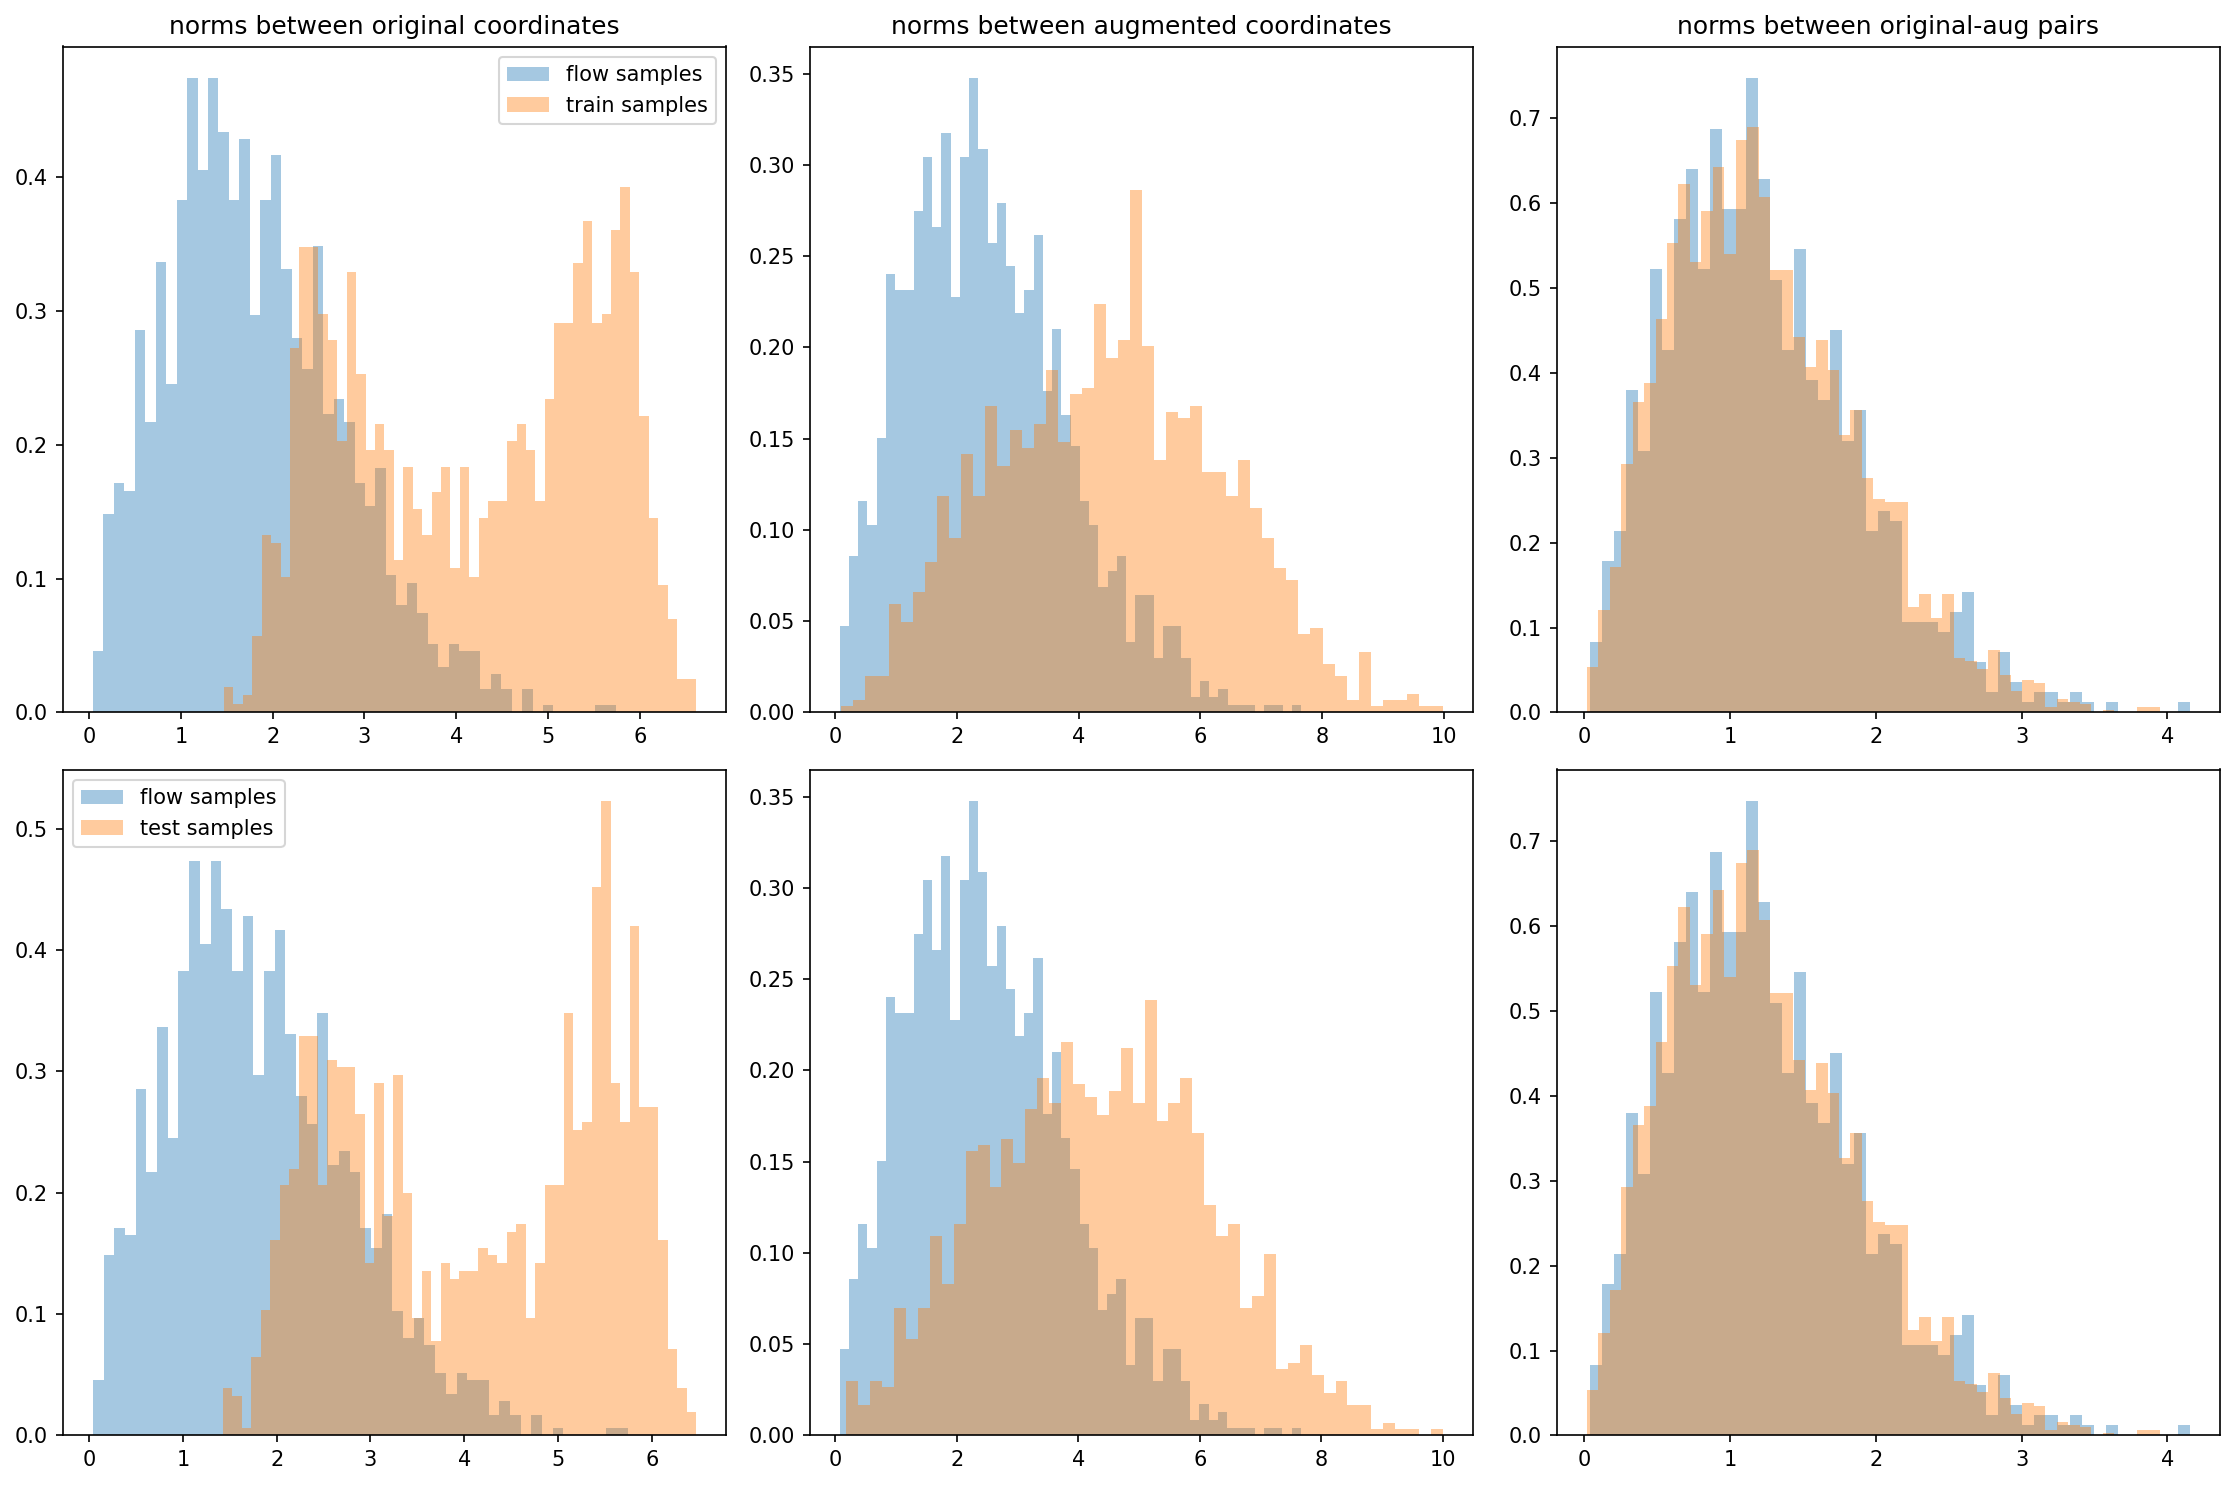

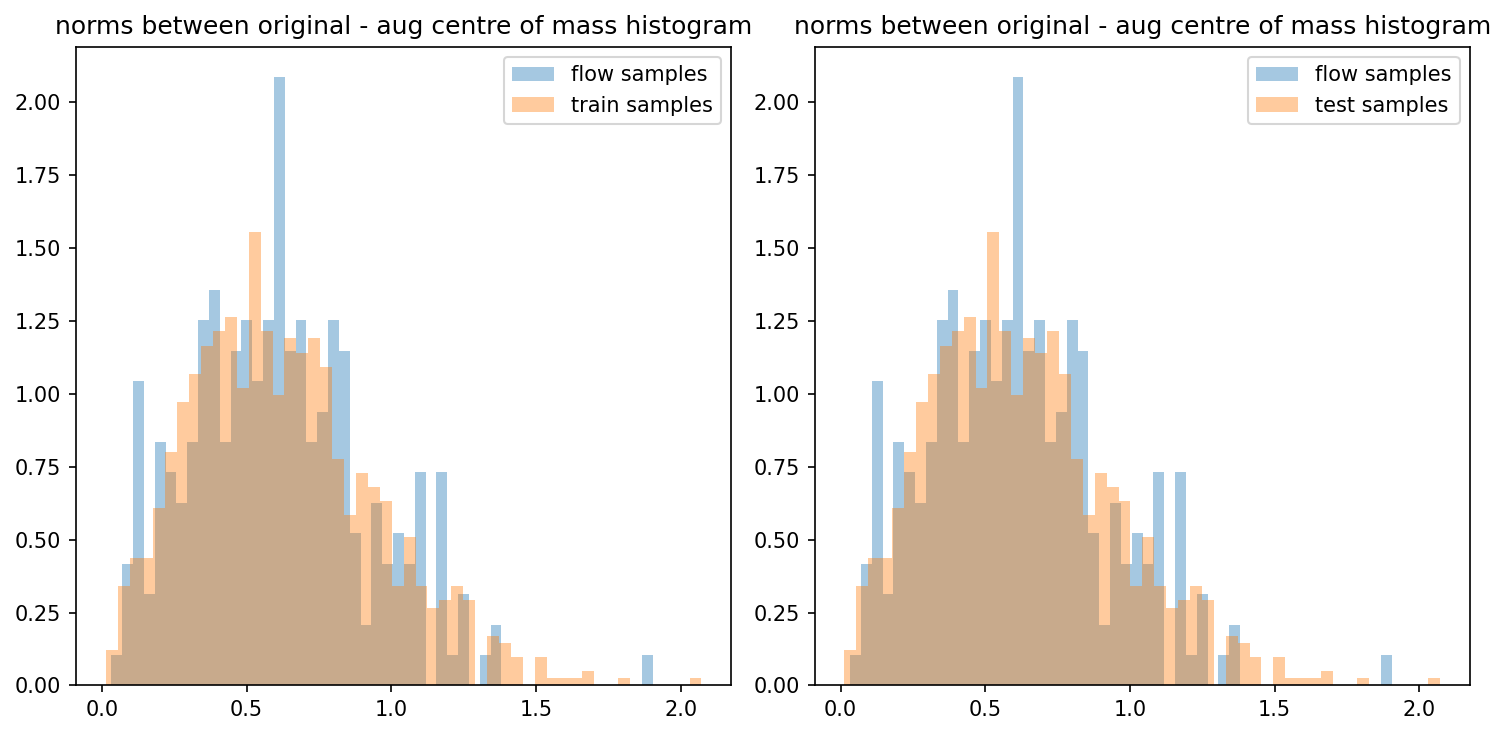

  0%|                                                   | 0/600 [00:00<?, ?it/s]

non numeric history values being saved


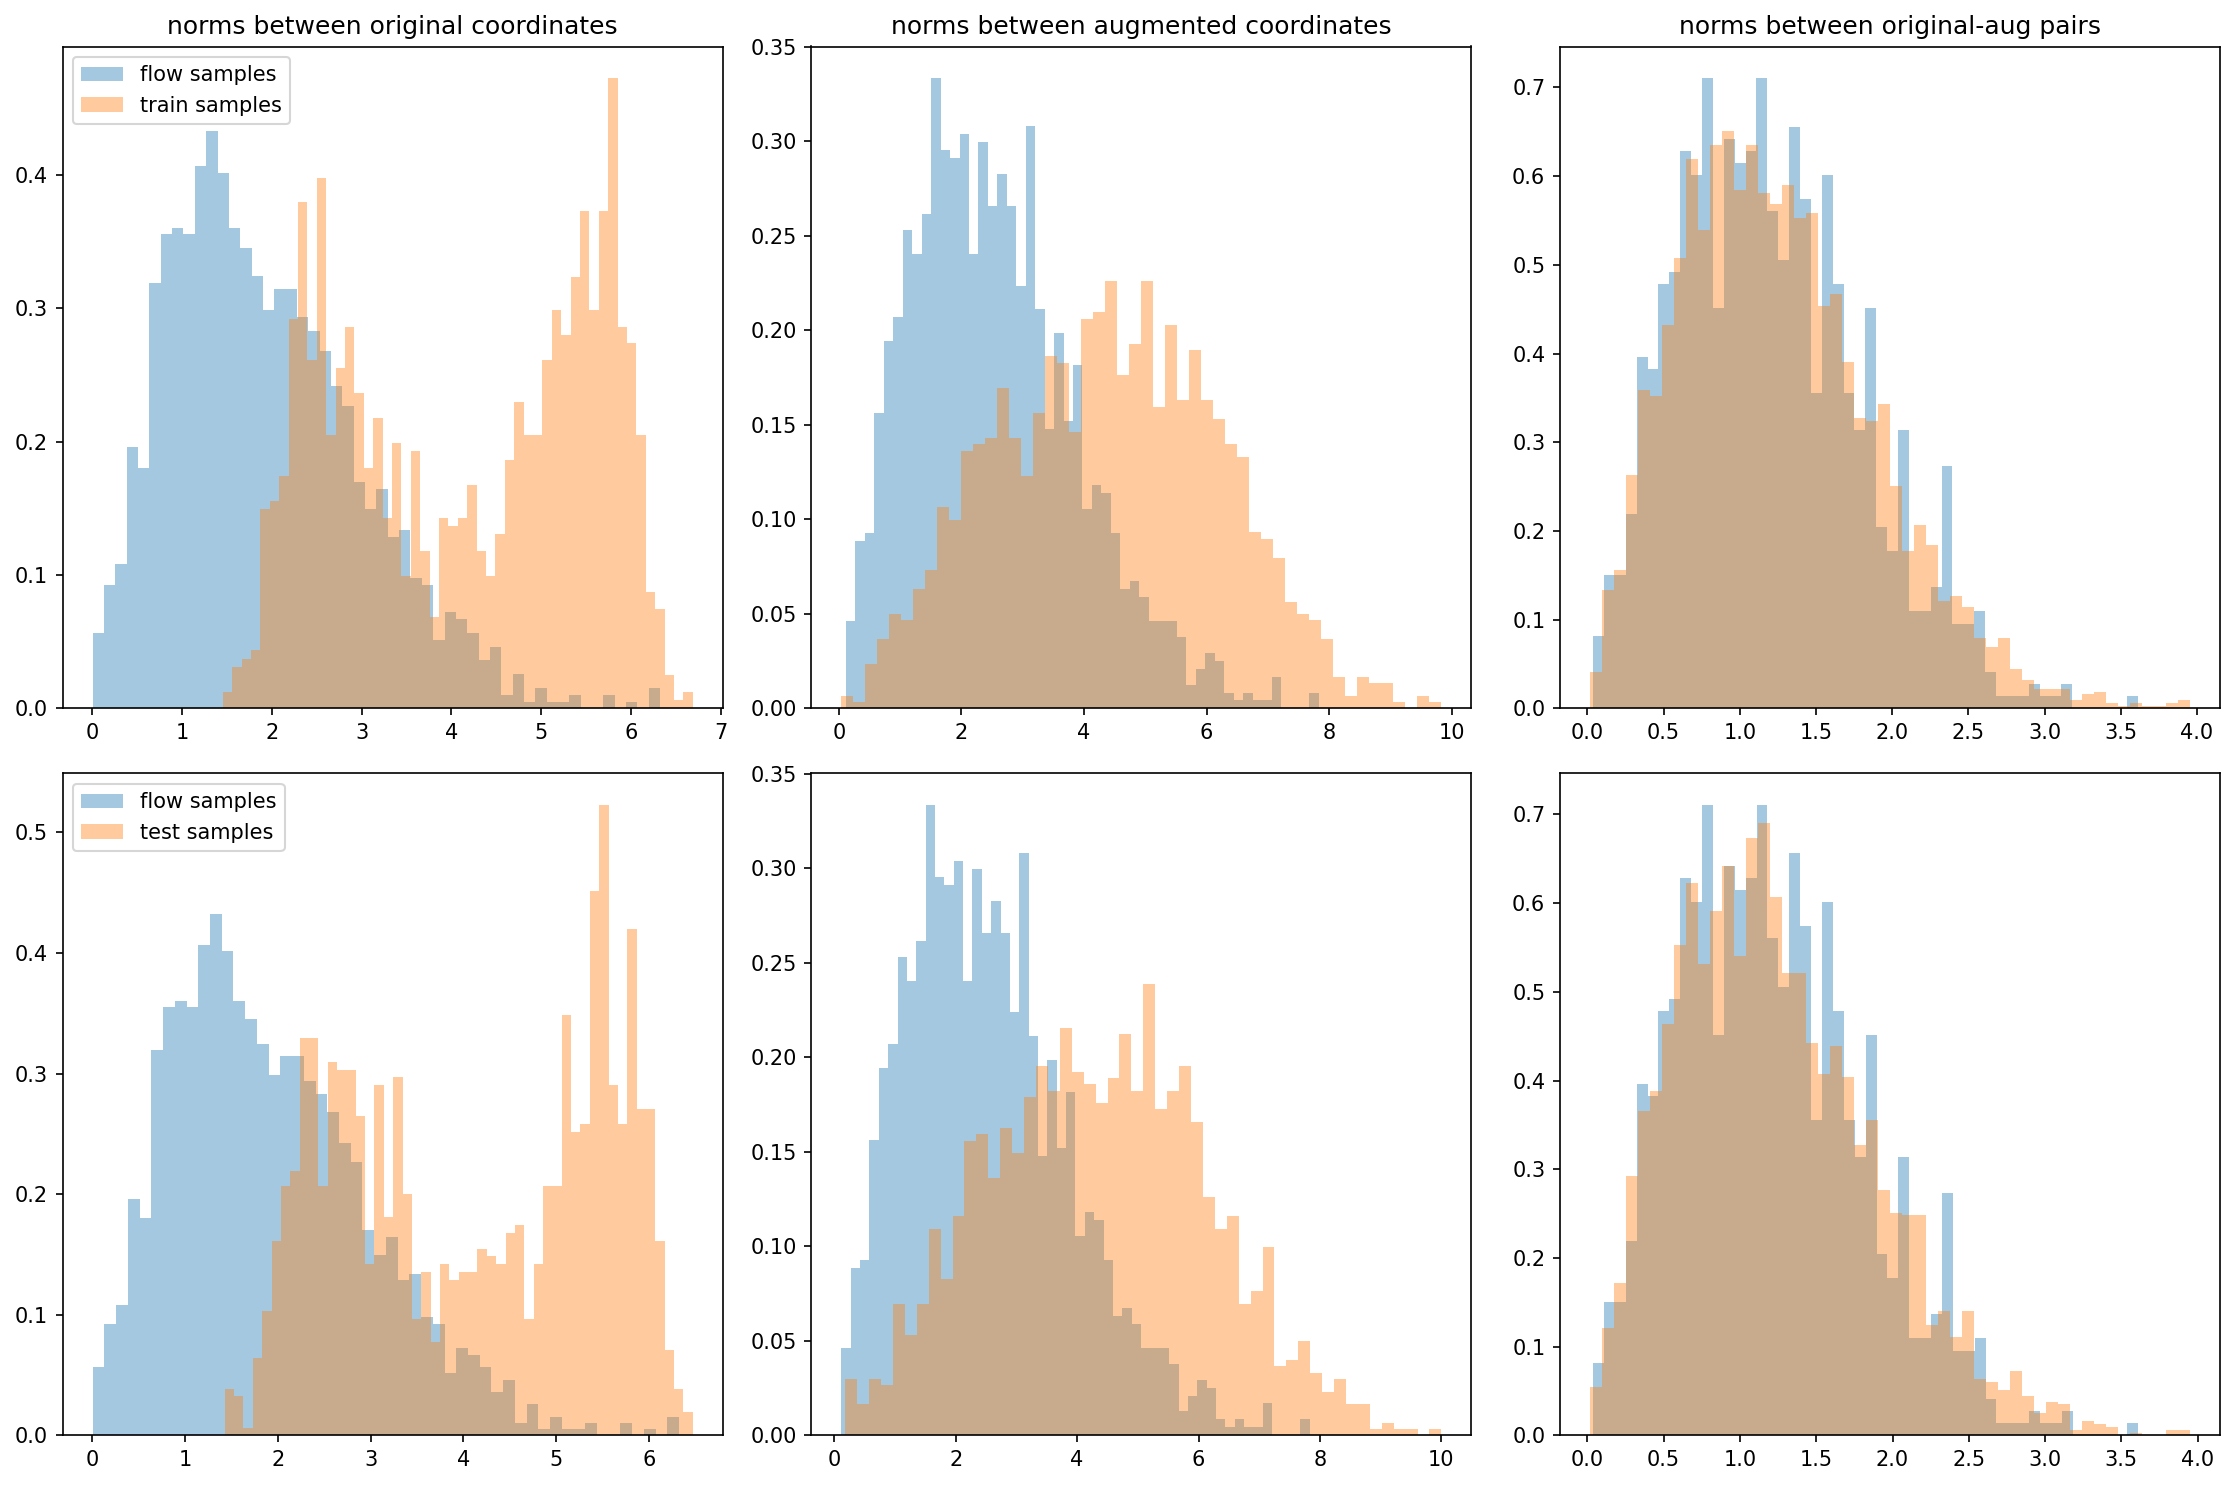

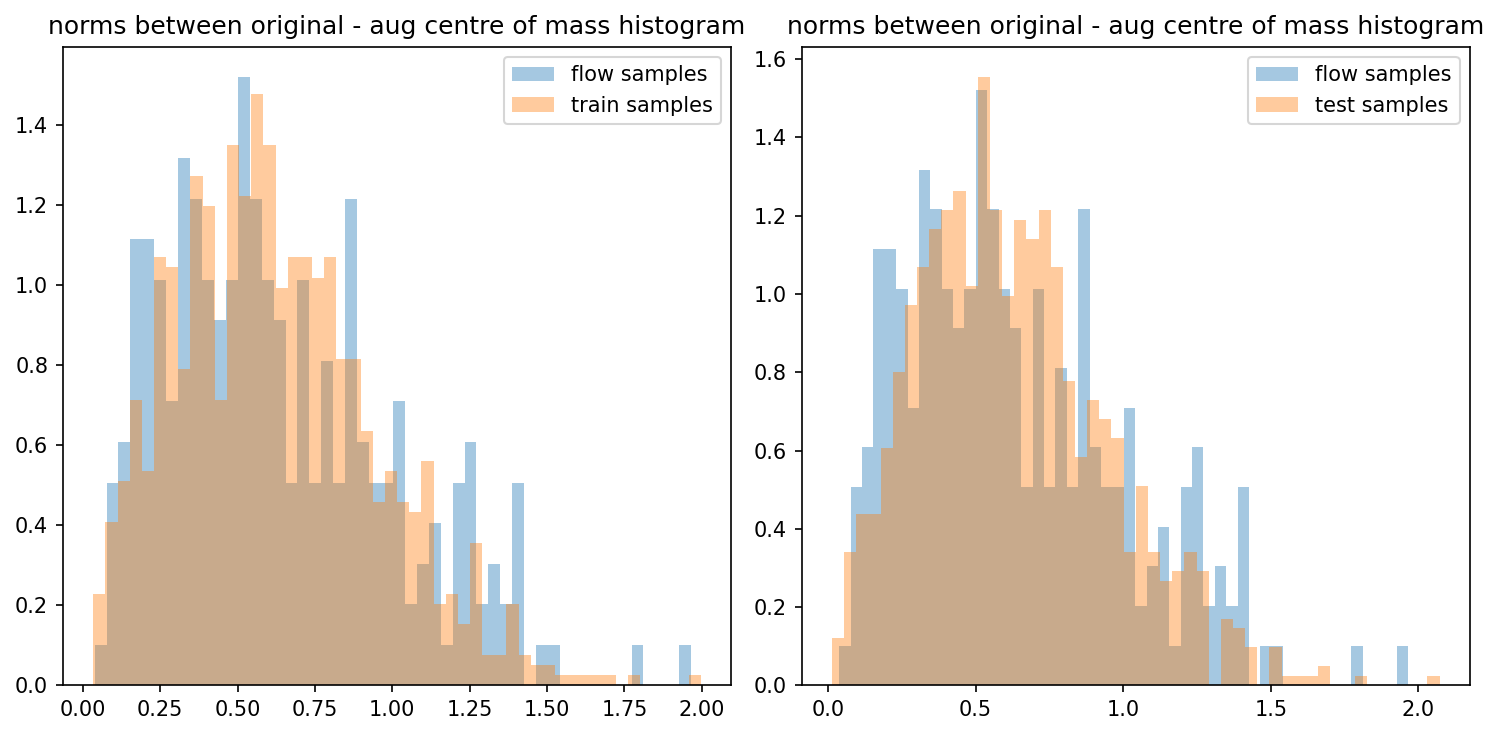

  0%|▏                                        | 2/600 [00:19<1:20:23,  8.07s/it]

{'eval_log_lik': Array(-28.2822, dtype=float32), 'eval_marginal_log_lik': Array(-14.590775, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.888245e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.3332367e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.63055325, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.2787, dtype=float32)}


 11%|████▊                                     | 68/600 [00:27<01:06,  7.97it/s]

{'eval_log_lik': Array(-23.95944, dtype=float32), 'eval_marginal_log_lik': Array(-10.434791, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(9.89914e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.7324448e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.61585087, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.98458, dtype=float32)}


 20%|████████▏                                | 119/600 [00:33<00:57,  8.43it/s]

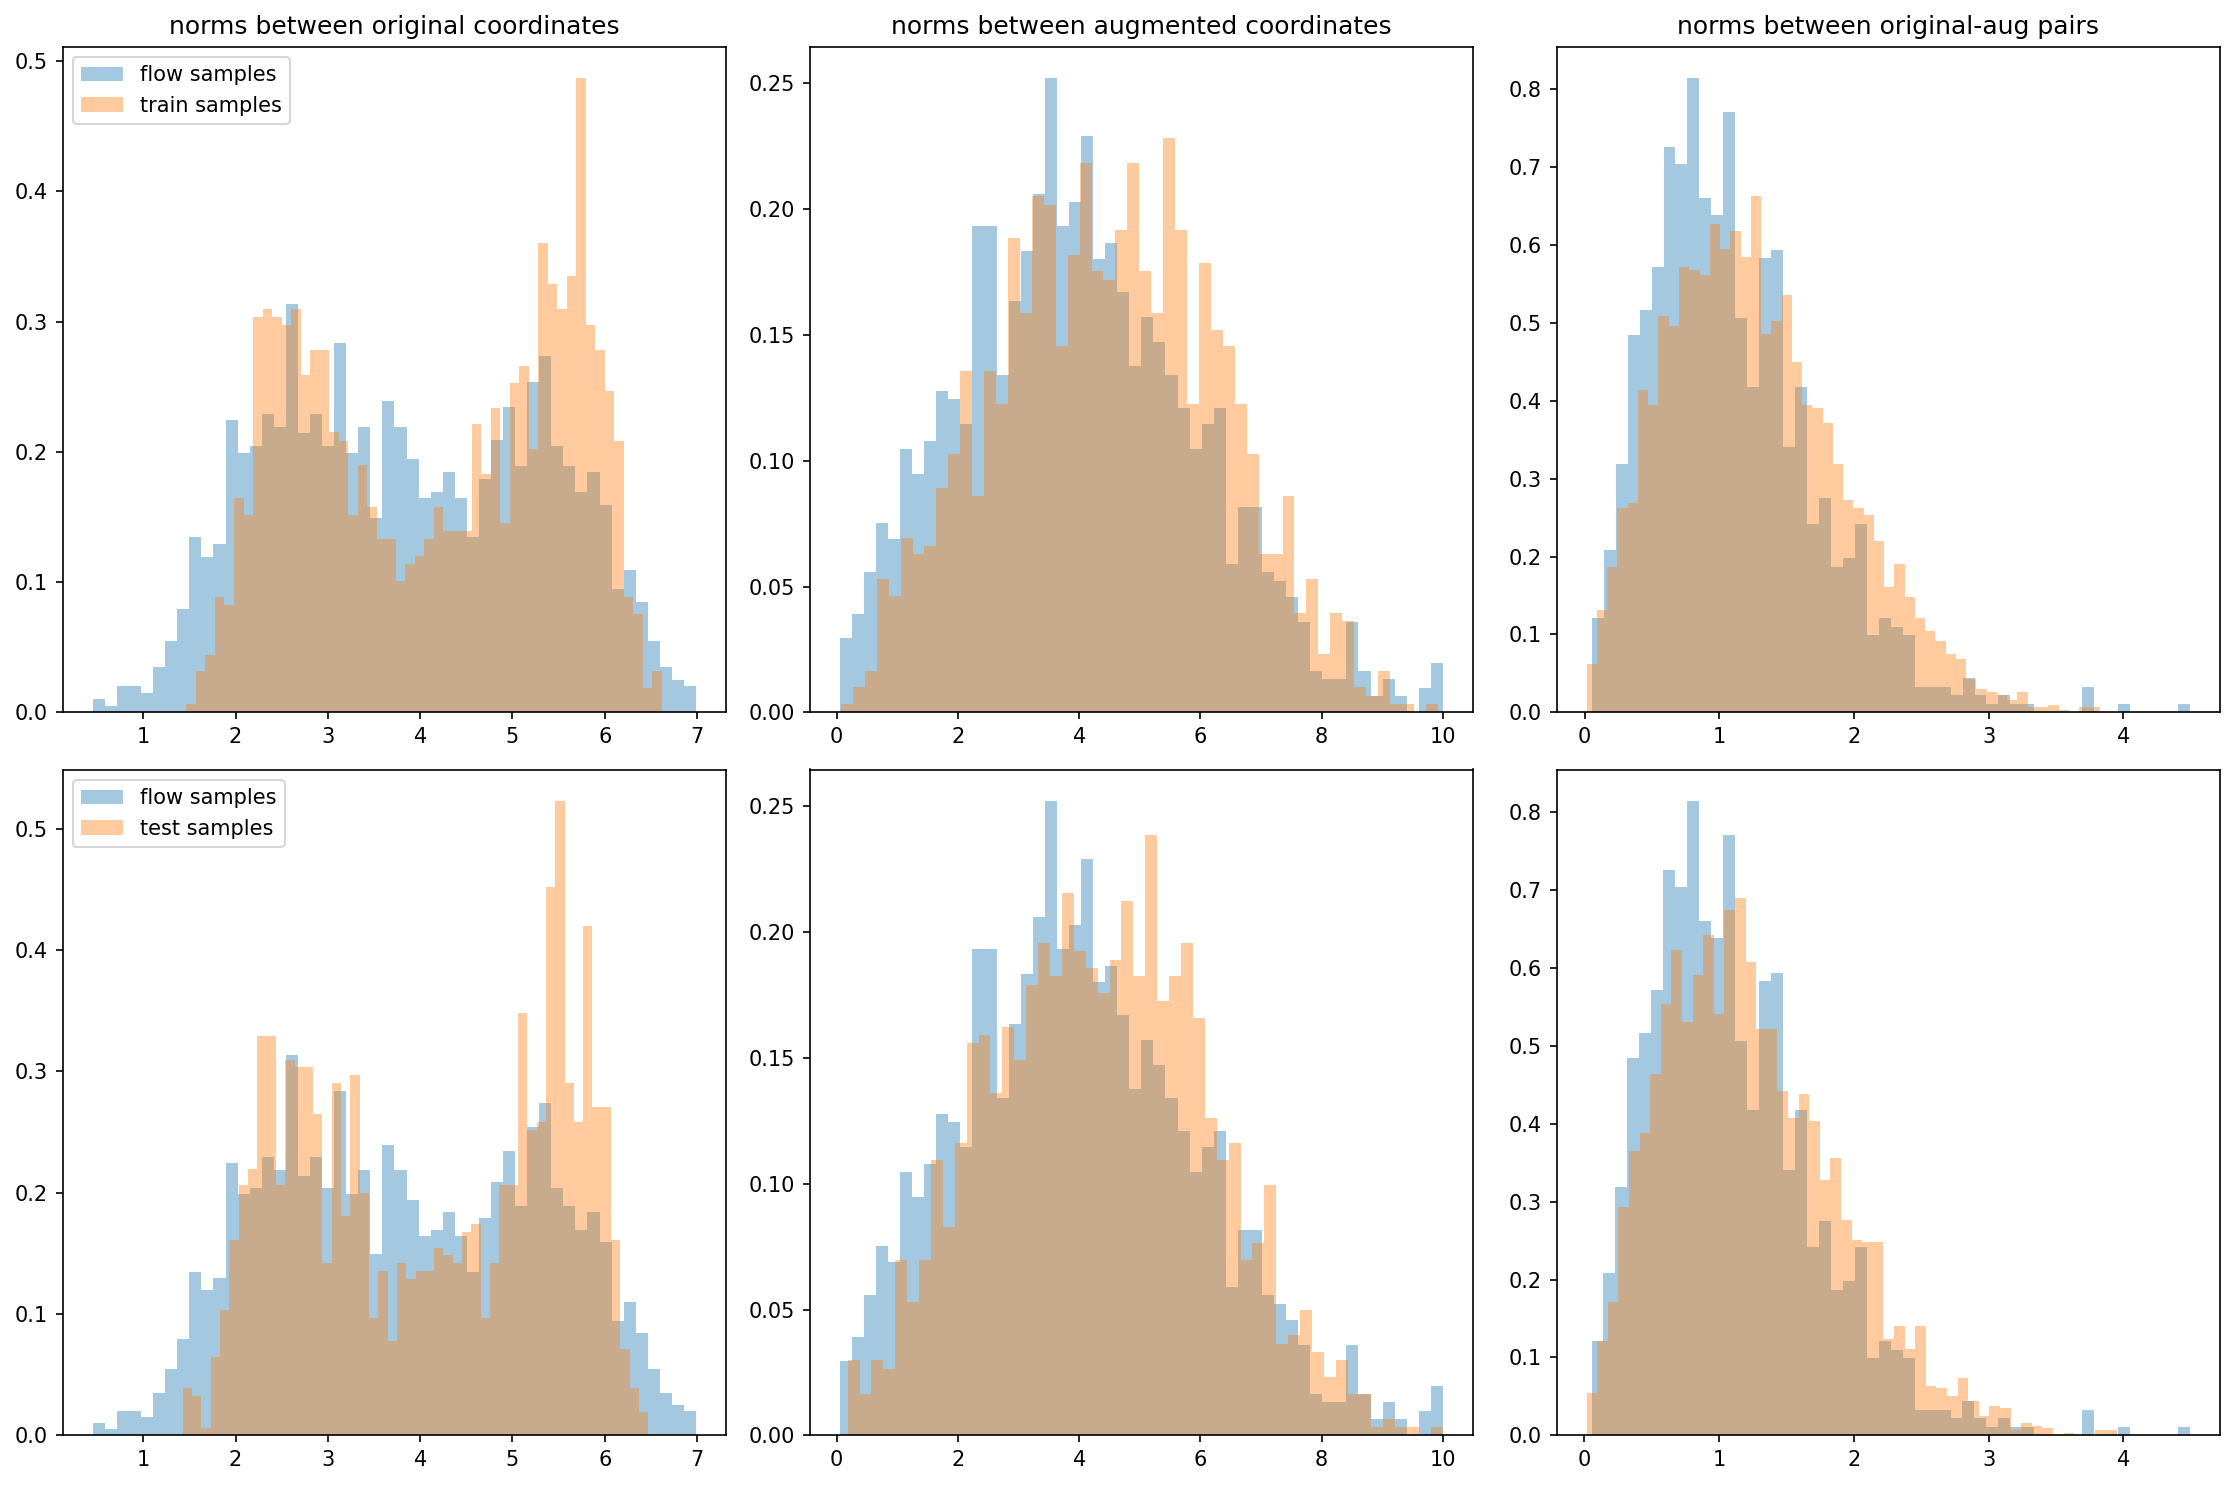

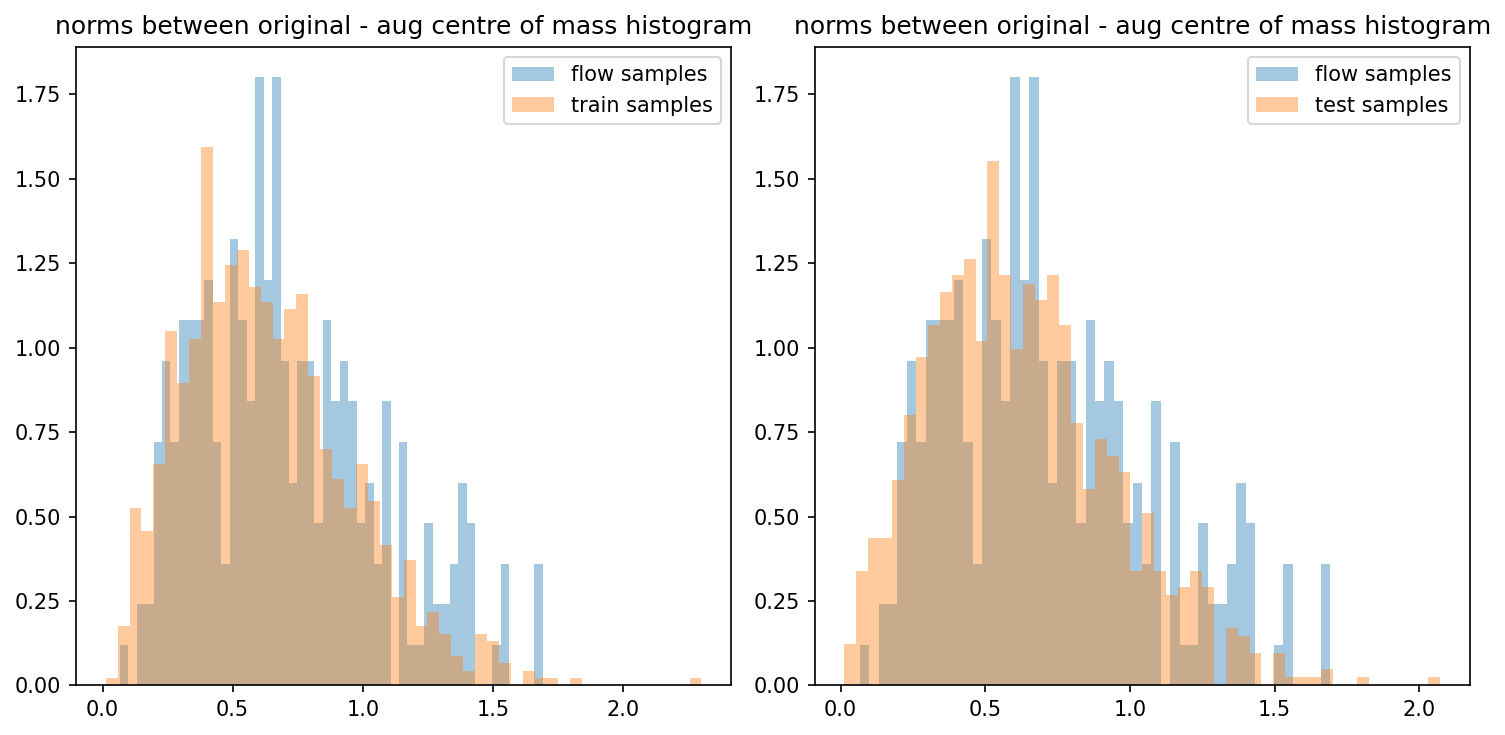

 22%|█████████▏                               | 135/600 [00:39<01:00,  7.63it/s]

{'eval_log_lik': Array(-23.57321, dtype=float32), 'eval_marginal_log_lik': Array(-10.048971, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.000103, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.864052e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.7209282, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.733246, dtype=float32)}


 34%|█████████████▋                           | 201/600 [00:46<00:50,  7.91it/s]

{'eval_log_lik': Array(-23.350168, dtype=float32), 'eval_marginal_log_lik': Array(-9.766191, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.373261e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.699257e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.7474397, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.342731, dtype=float32)}


 40%|████████████████▎                        | 239/600 [00:51<00:42,  8.45it/s]

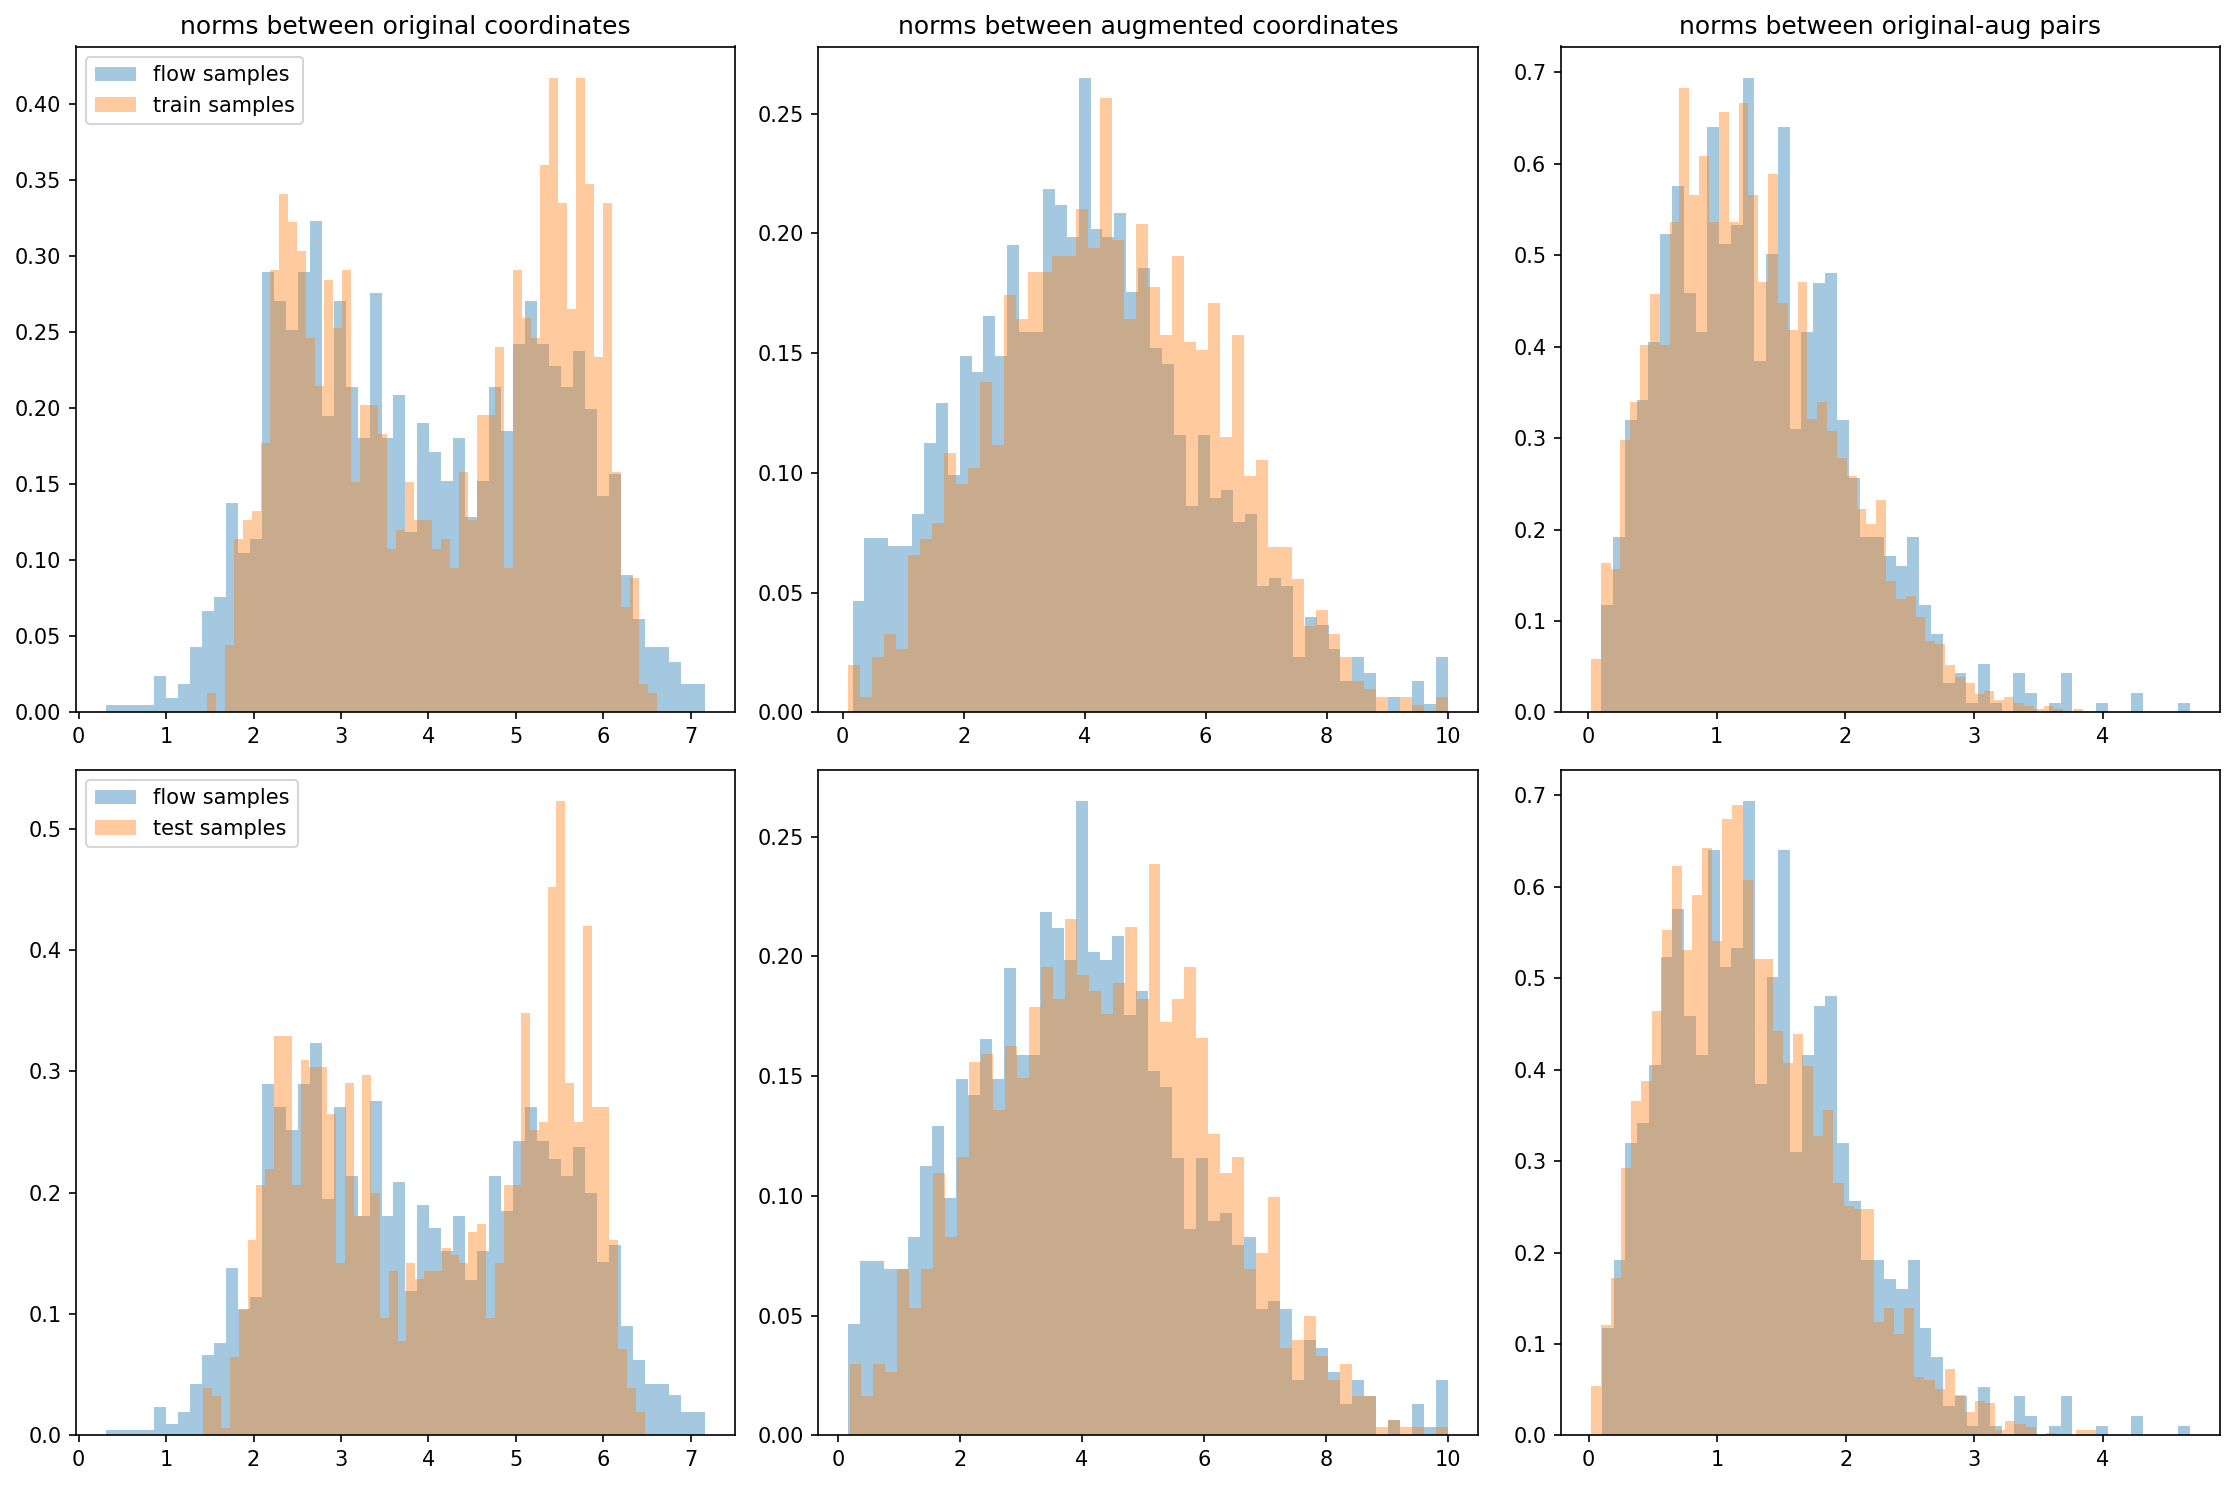

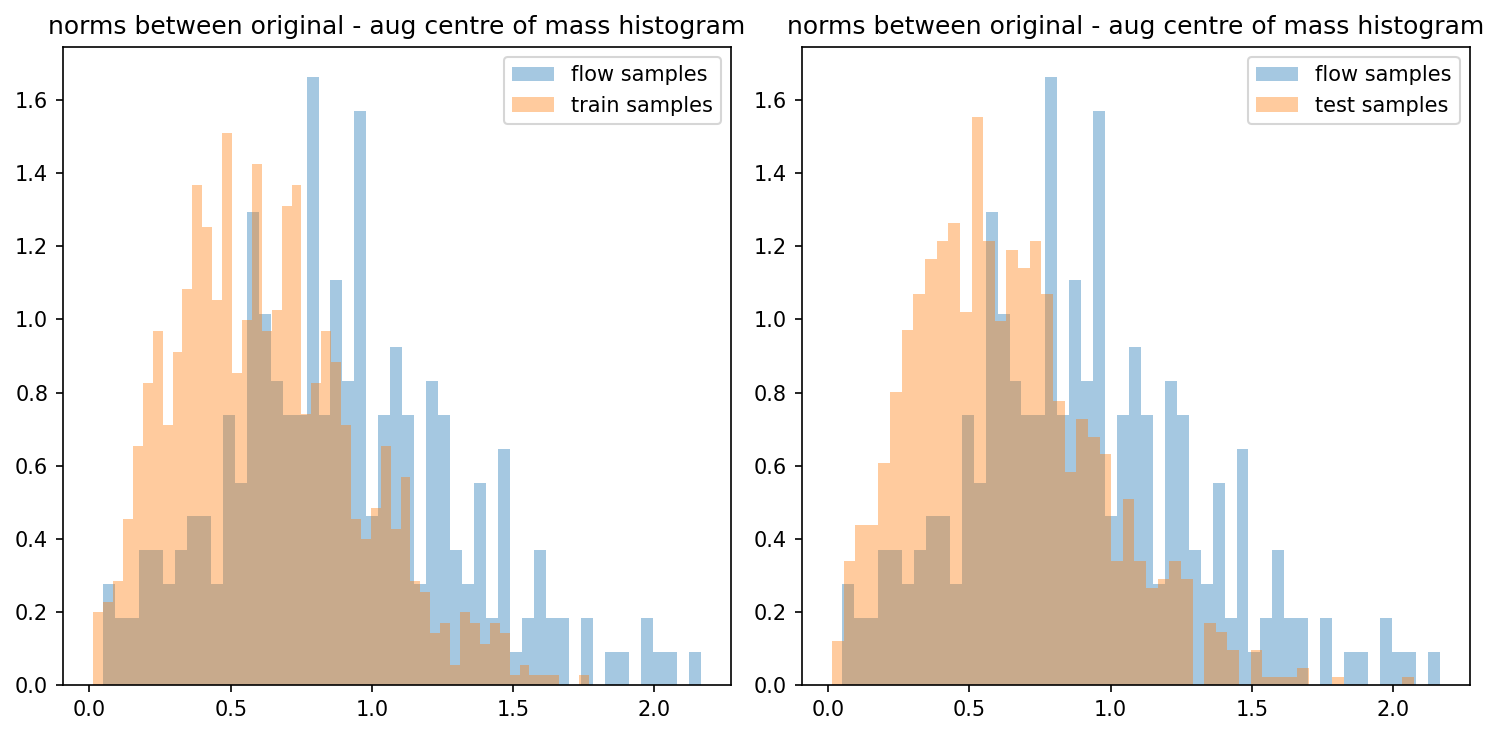

 45%|██████████████████▎                      | 268/600 [00:59<00:42,  7.78it/s]

{'eval_log_lik': Array(-23.24205, dtype=float32), 'eval_marginal_log_lik': Array(-9.622468, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.9836125e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.610565e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.88233685, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.910028, dtype=float32)}


 56%|██████████████████████▊                  | 334/600 [01:07<00:34,  7.81it/s]

{'eval_log_lik': Array(-23.18698, dtype=float32), 'eval_marginal_log_lik': Array(-9.626548, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.640289e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.6057968e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.8917889, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.937271, dtype=float32)}


 60%|████████████████████████▌                | 359/600 [01:10<00:28,  8.40it/s]

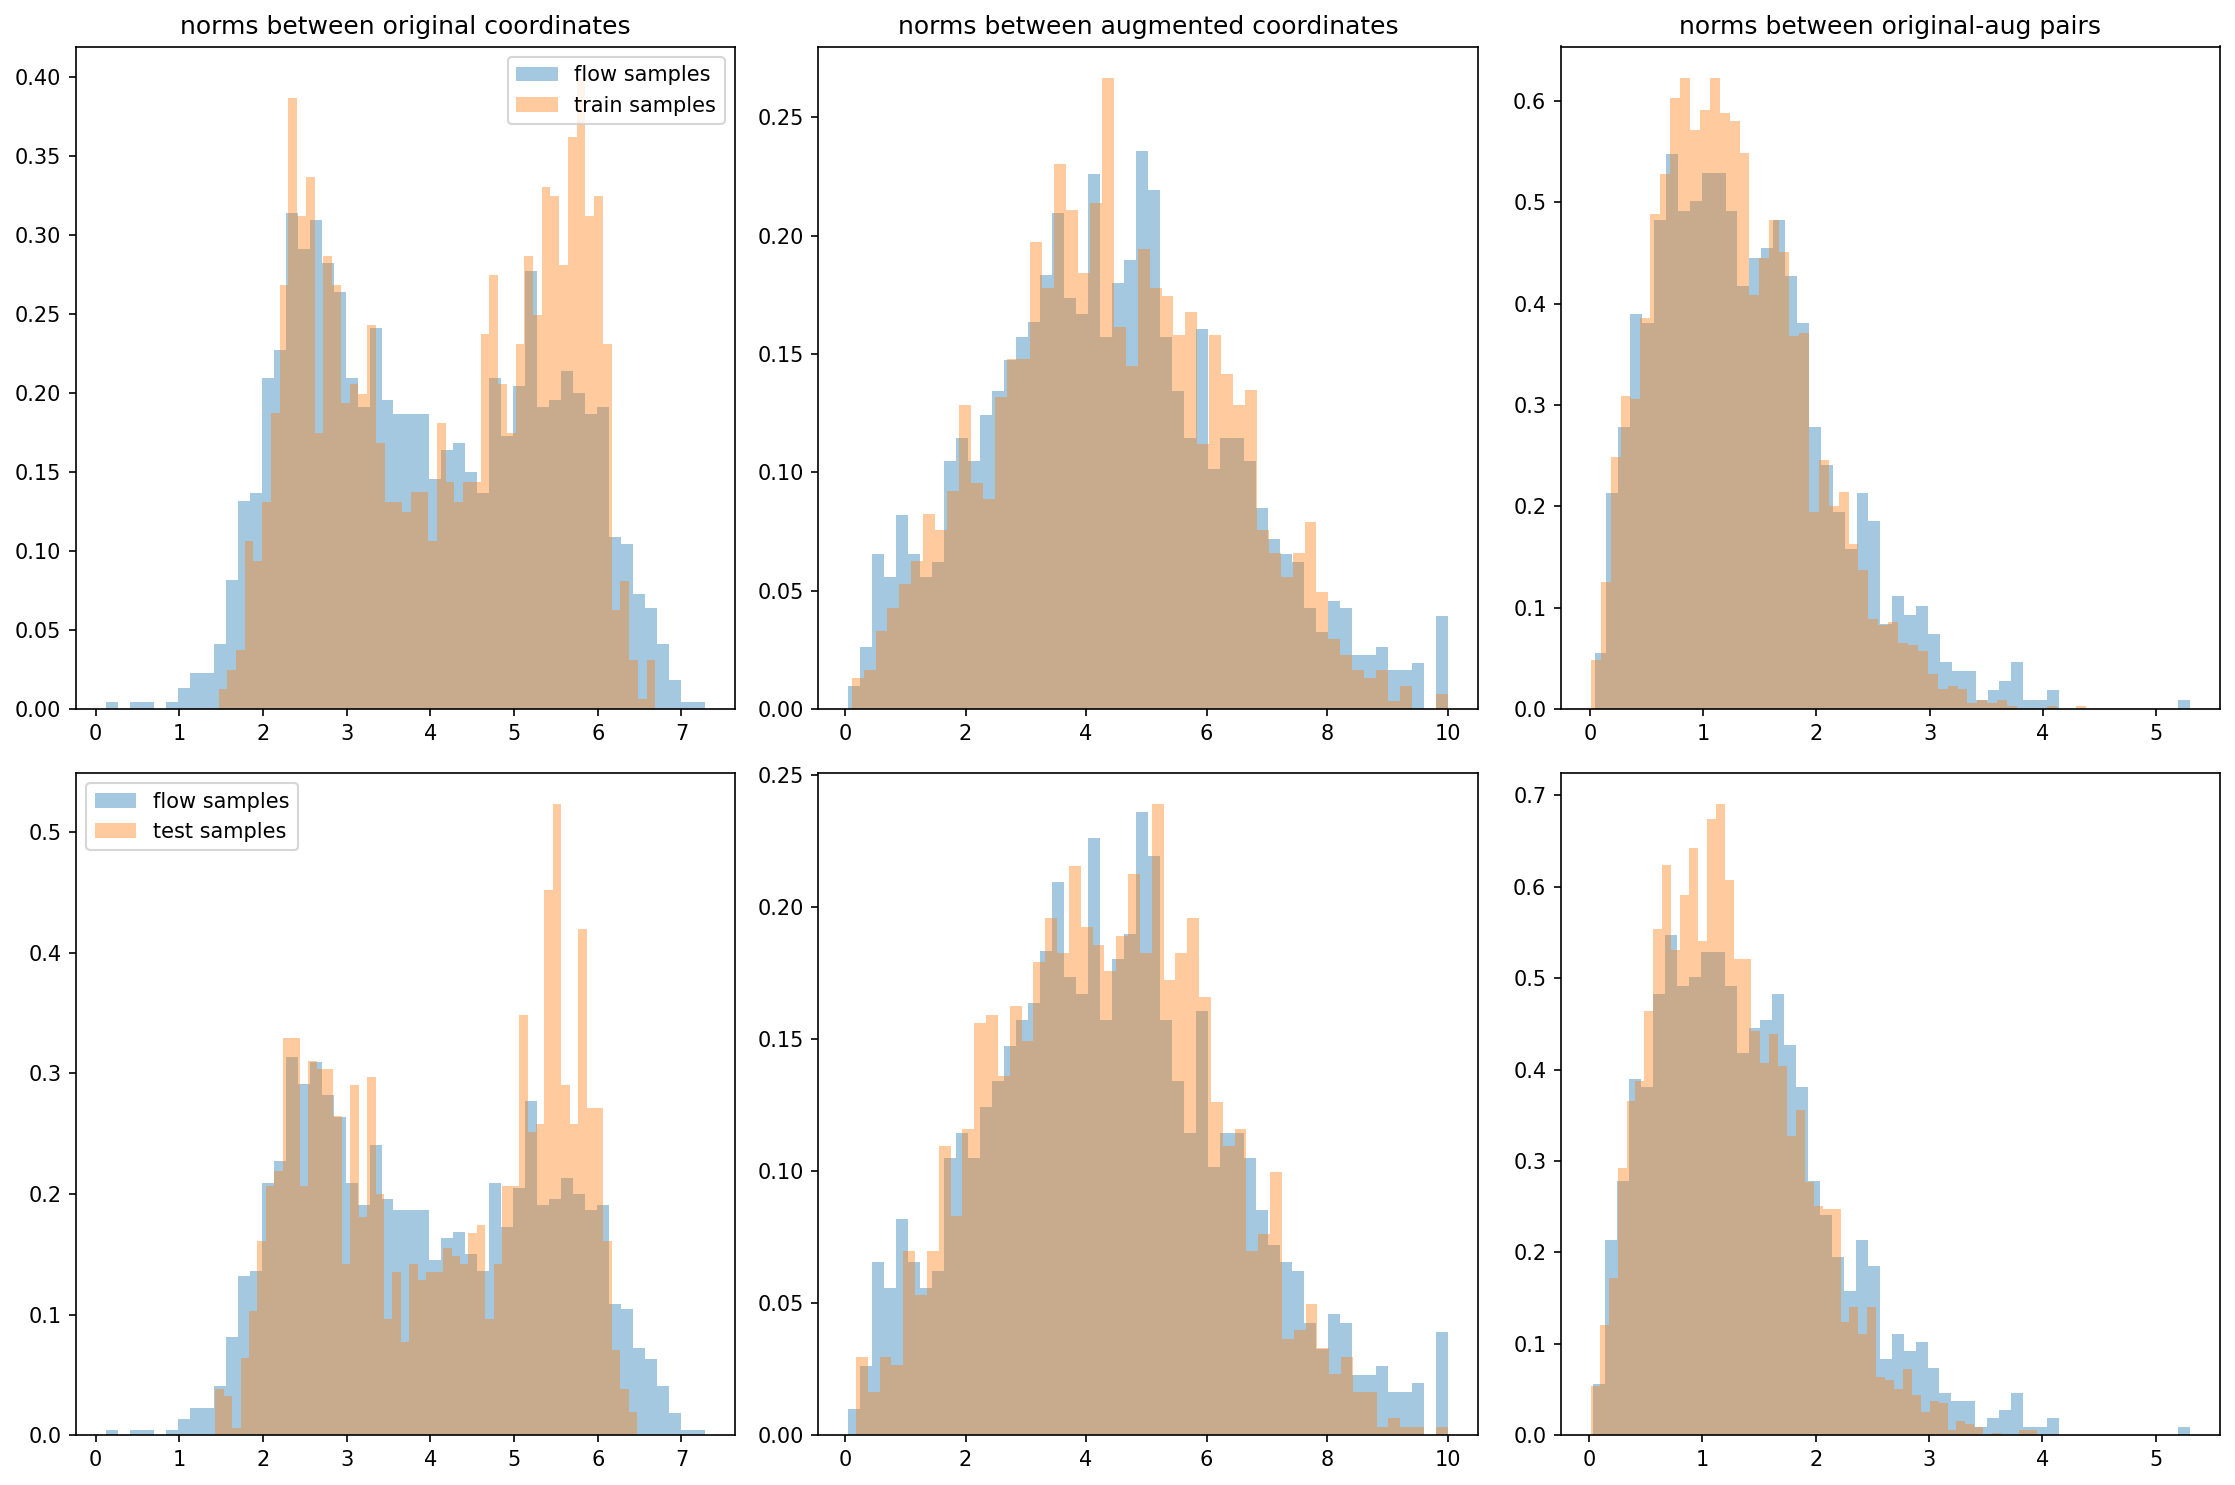

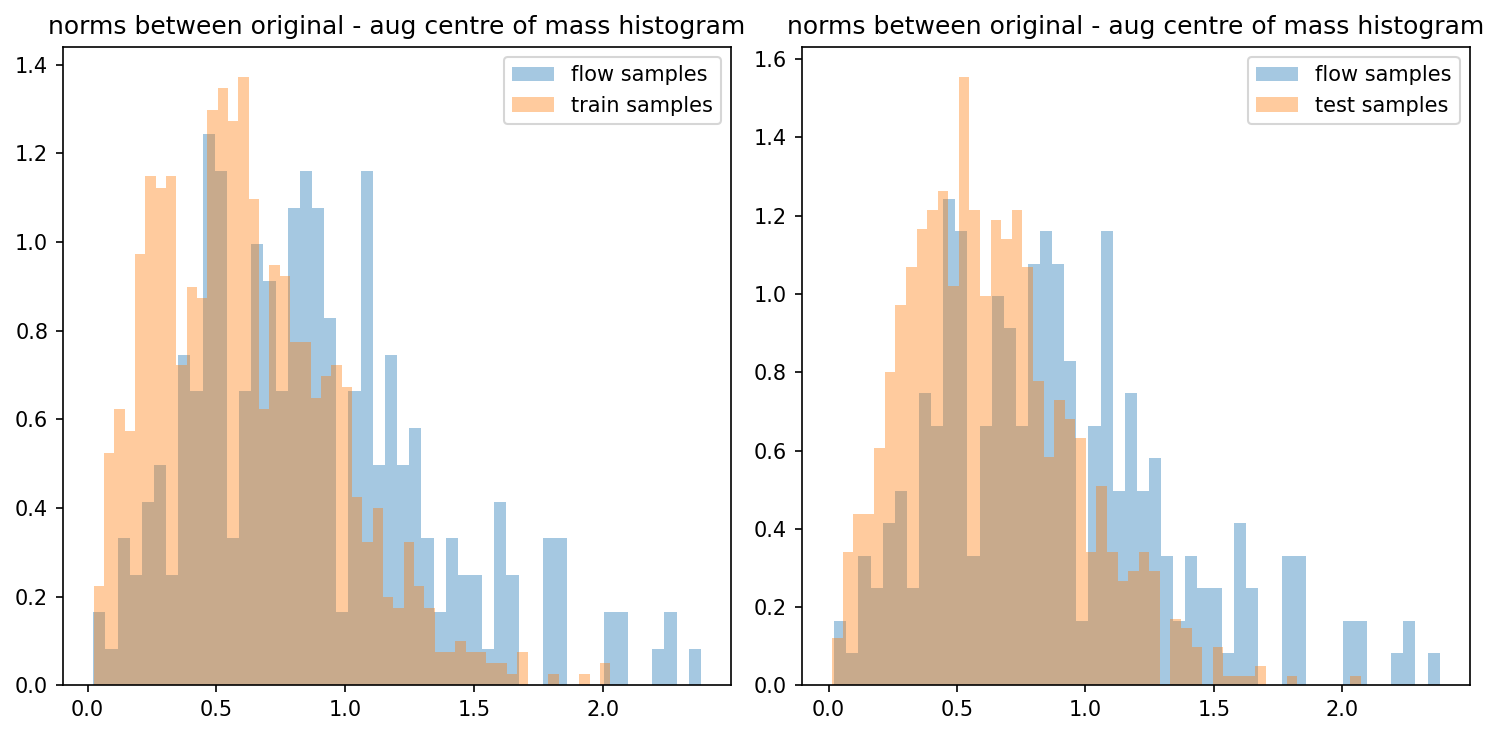

 67%|███████████████████████████▍             | 401/600 [01:19<00:27,  7.30it/s]

{'eval_log_lik': Array(-23.233528, dtype=float32), 'eval_marginal_log_lik': Array(-9.530731, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.7165834e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.4984131e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.81983864, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.294386, dtype=float32)}


 78%|███████████████████████████████▉         | 467/600 [01:26<00:17,  7.68it/s]

{'eval_log_lik': Array(-23.177805, dtype=float32), 'eval_marginal_log_lik': Array(-9.630635, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.5258485e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.5146255e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.90850383, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.48827, dtype=float32)}


 80%|████████████████████████████████▋        | 479/600 [01:28<00:14,  8.43it/s]

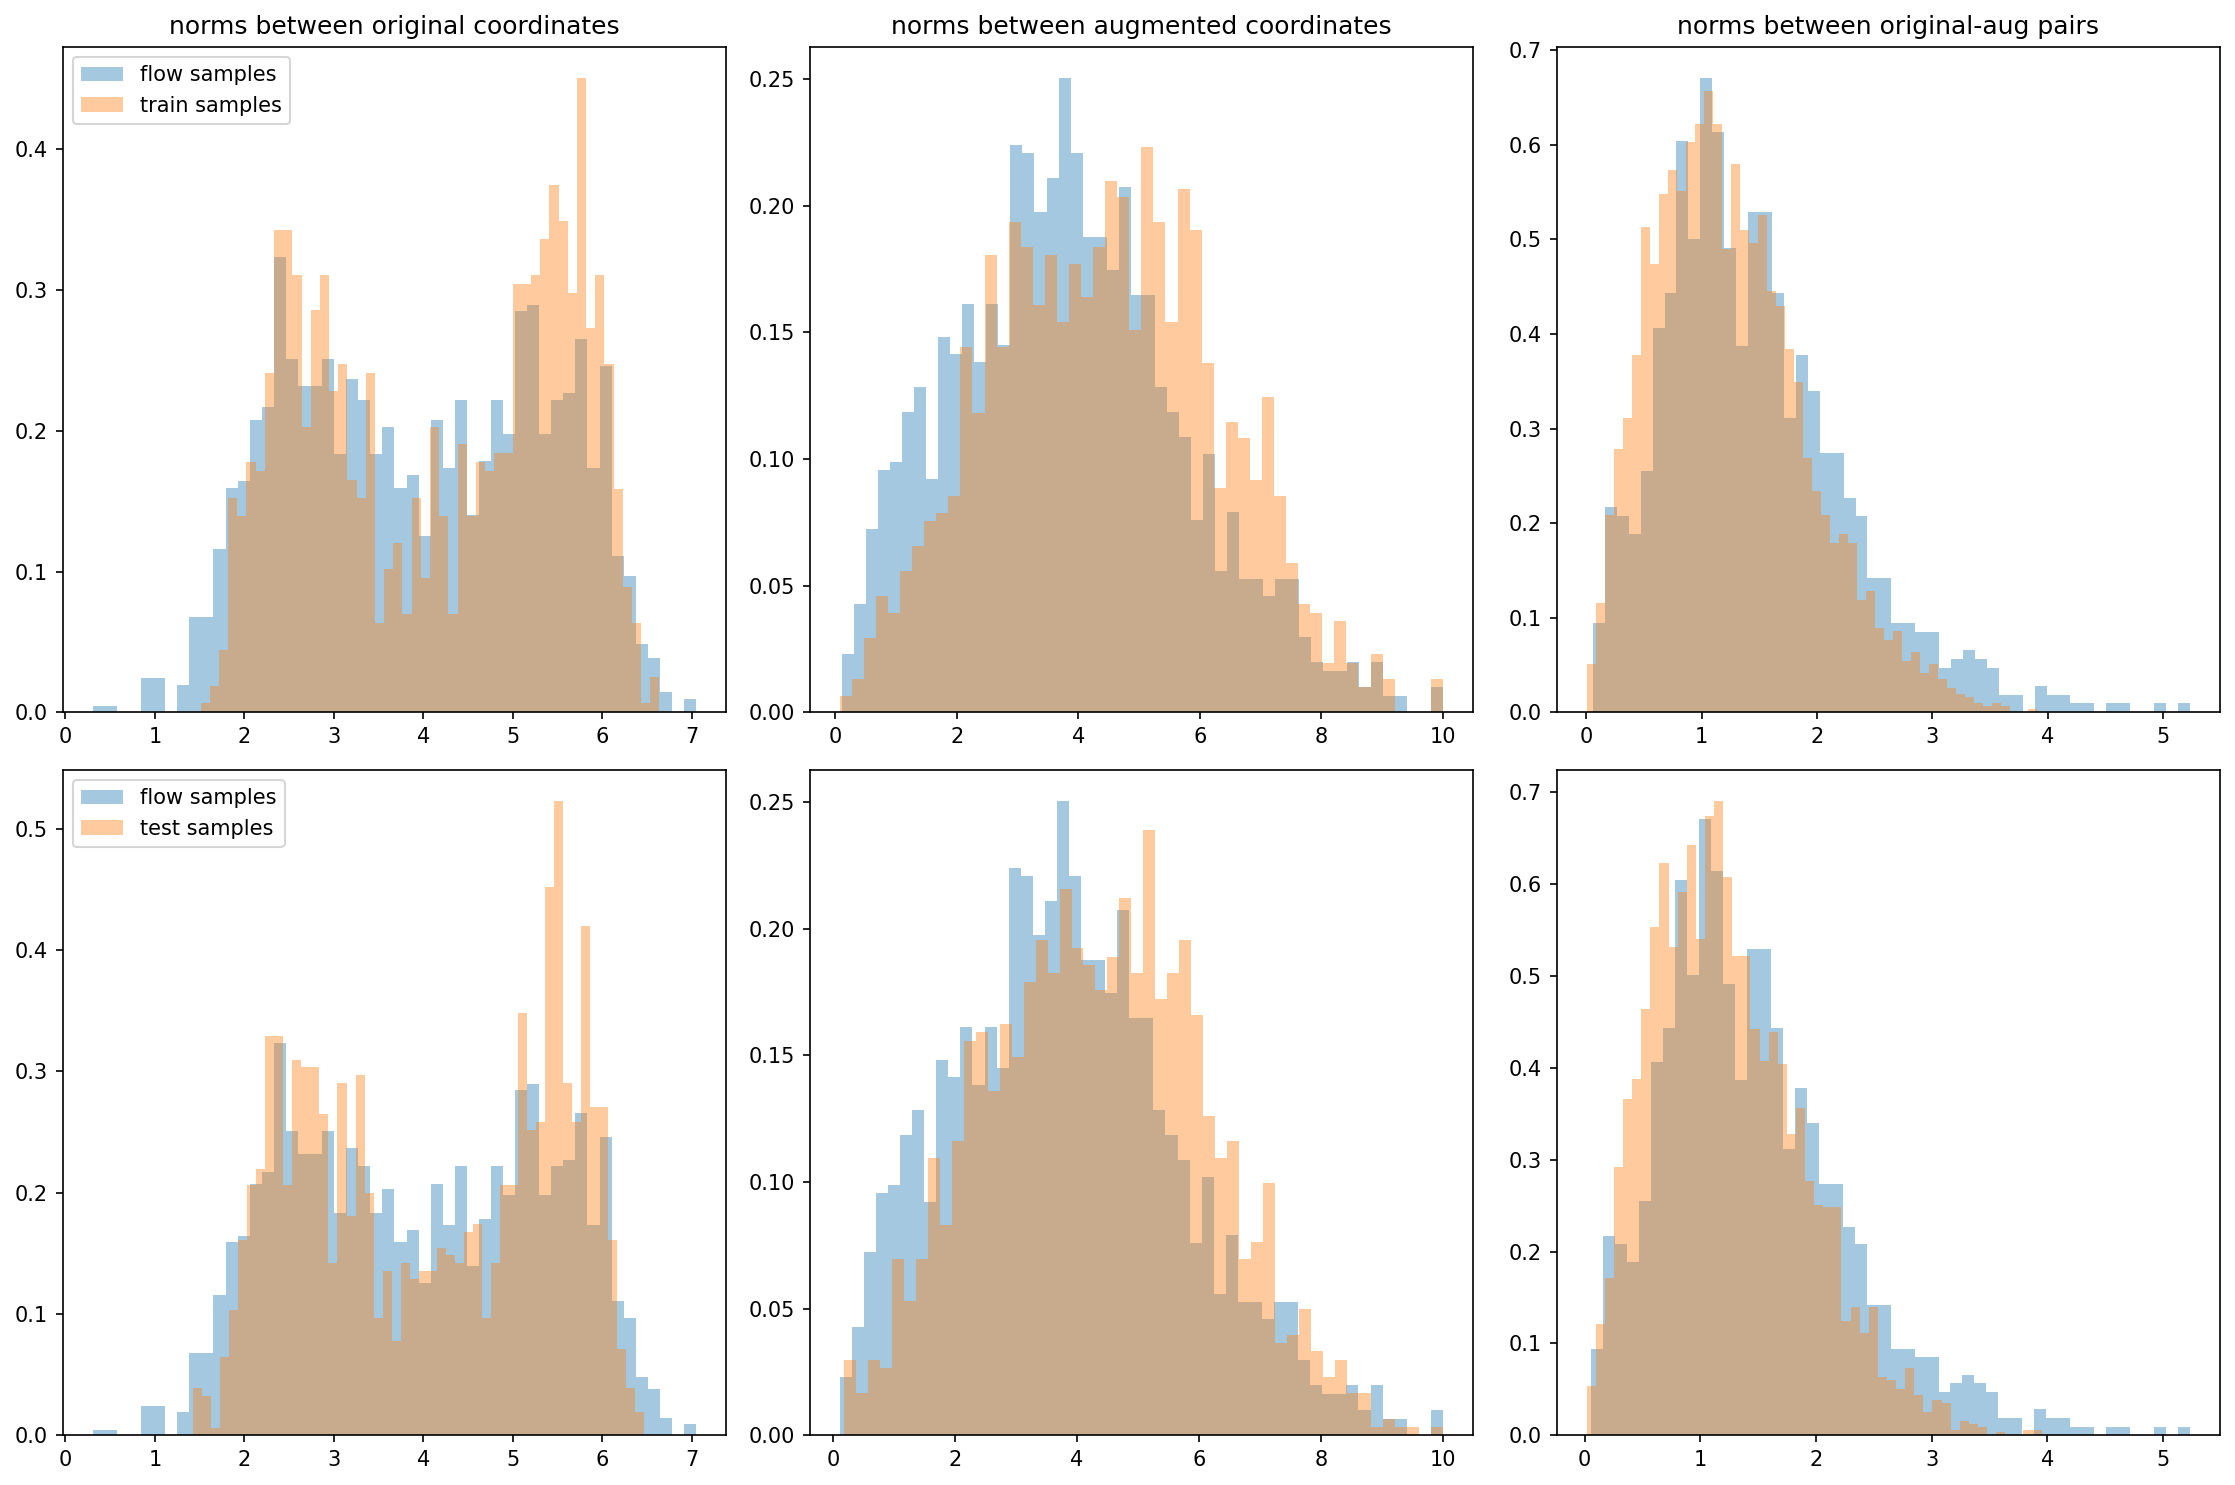

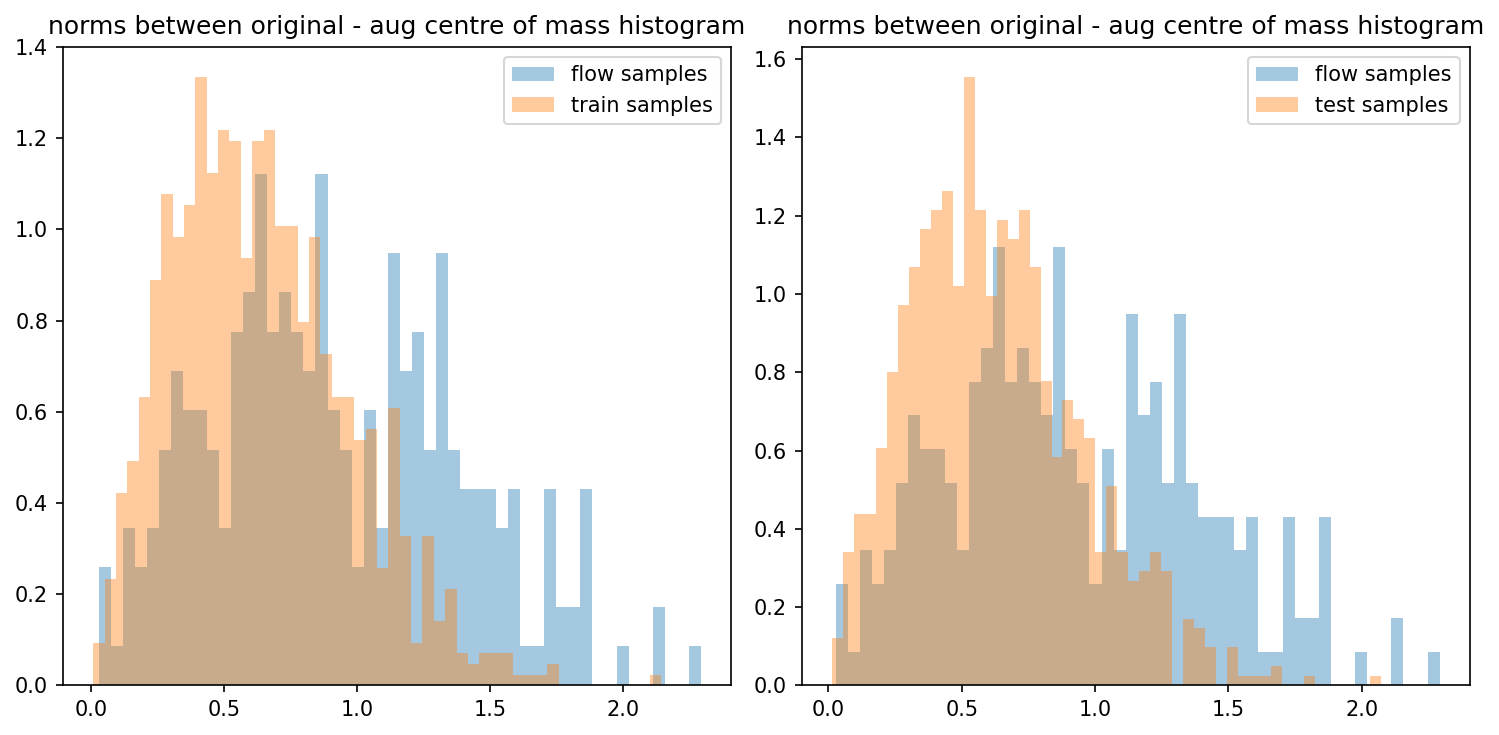

 89%|████████████████████████████████████▍    | 534/600 [01:38<00:08,  7.91it/s]

{'eval_log_lik': Array(-23.201113, dtype=float32), 'eval_marginal_log_lik': Array(-9.562982, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(7.743836e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.4348983e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.9280081, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.944304, dtype=float32)}


100%|████████████████████████████████████████▉| 599/600 [01:46<00:00,  8.37it/s]

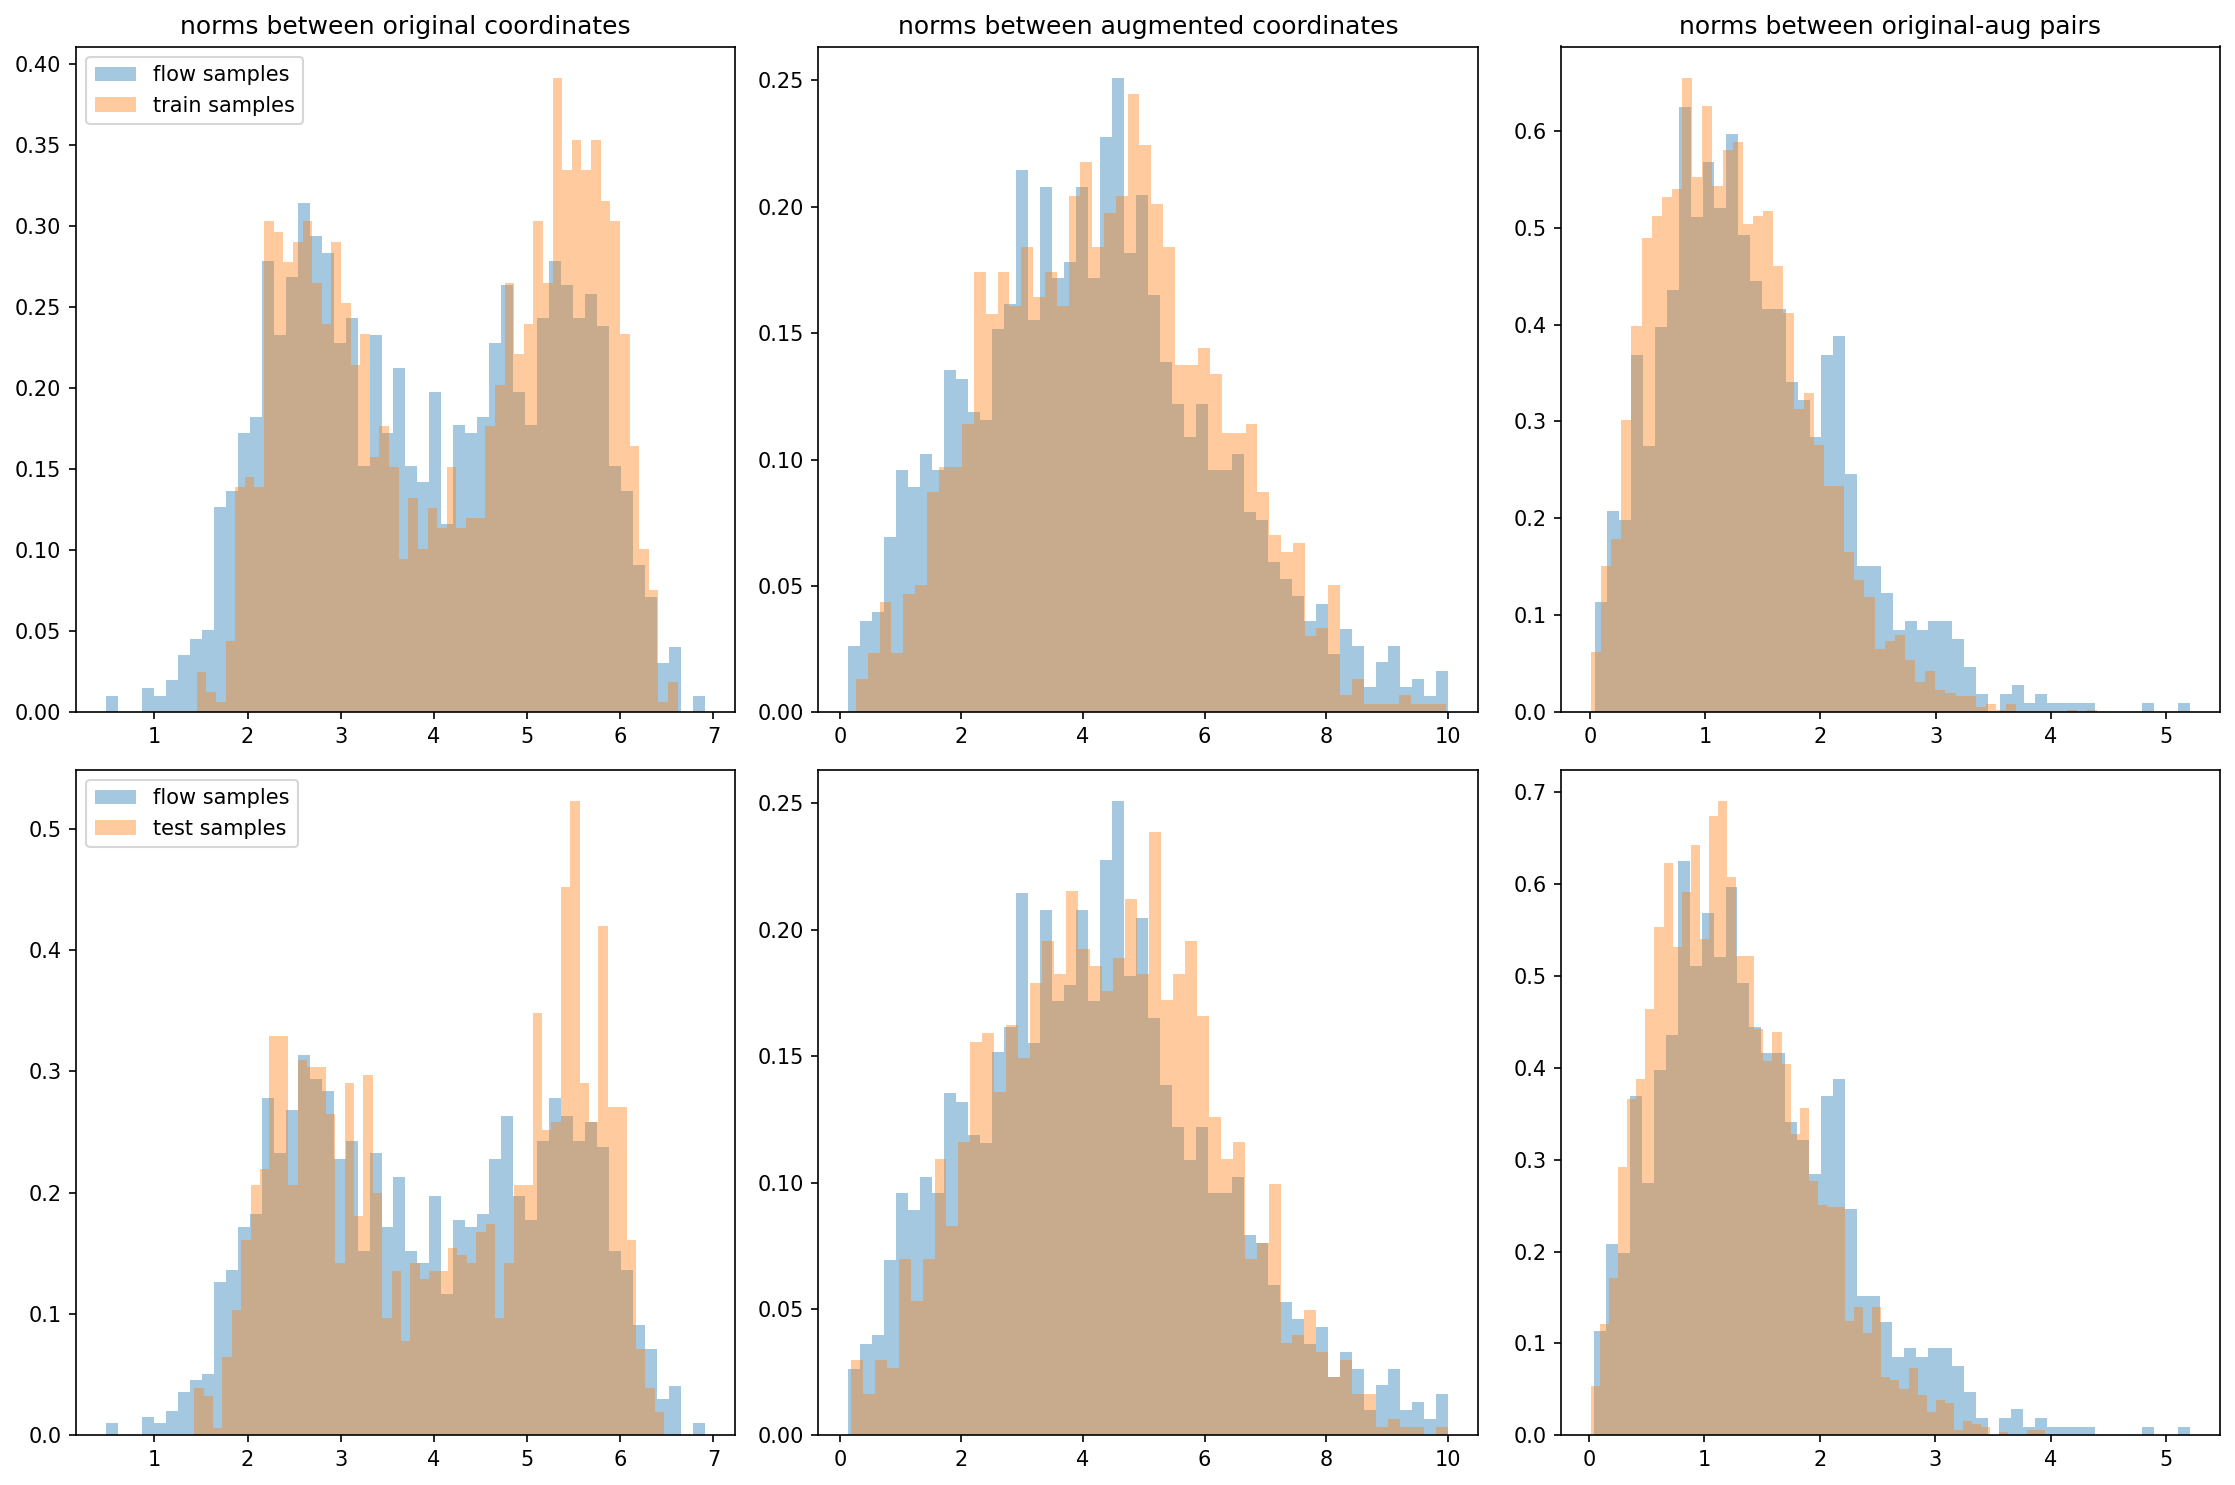

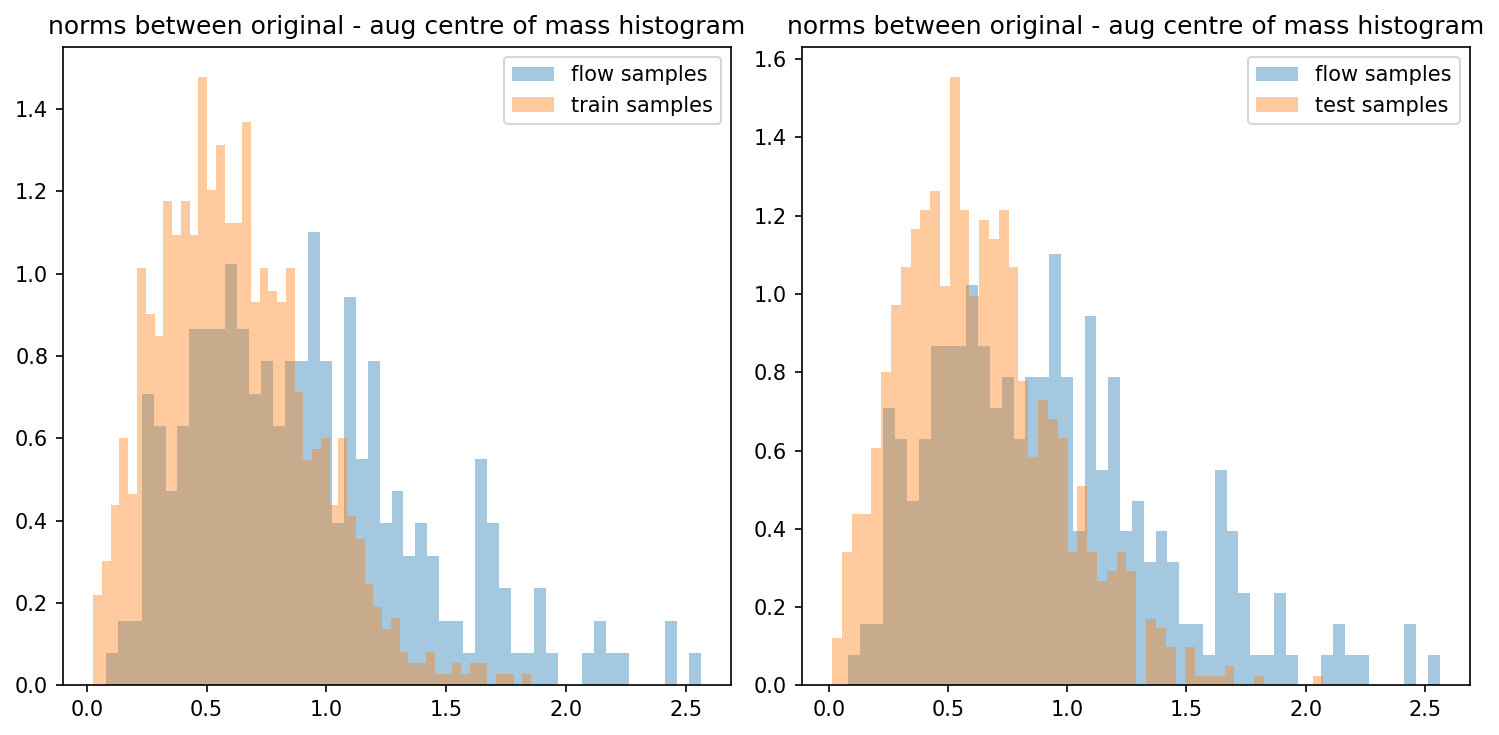

100%|█████████████████████████████████████████| 600/600 [01:50<00:00,  5.42it/s]


{'eval_log_lik': Array(-23.15104, dtype=float32), 'eval_marginal_log_lik': Array(-9.603751, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(7.801056e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.4003752e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.93656325, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.522577, dtype=float32)}


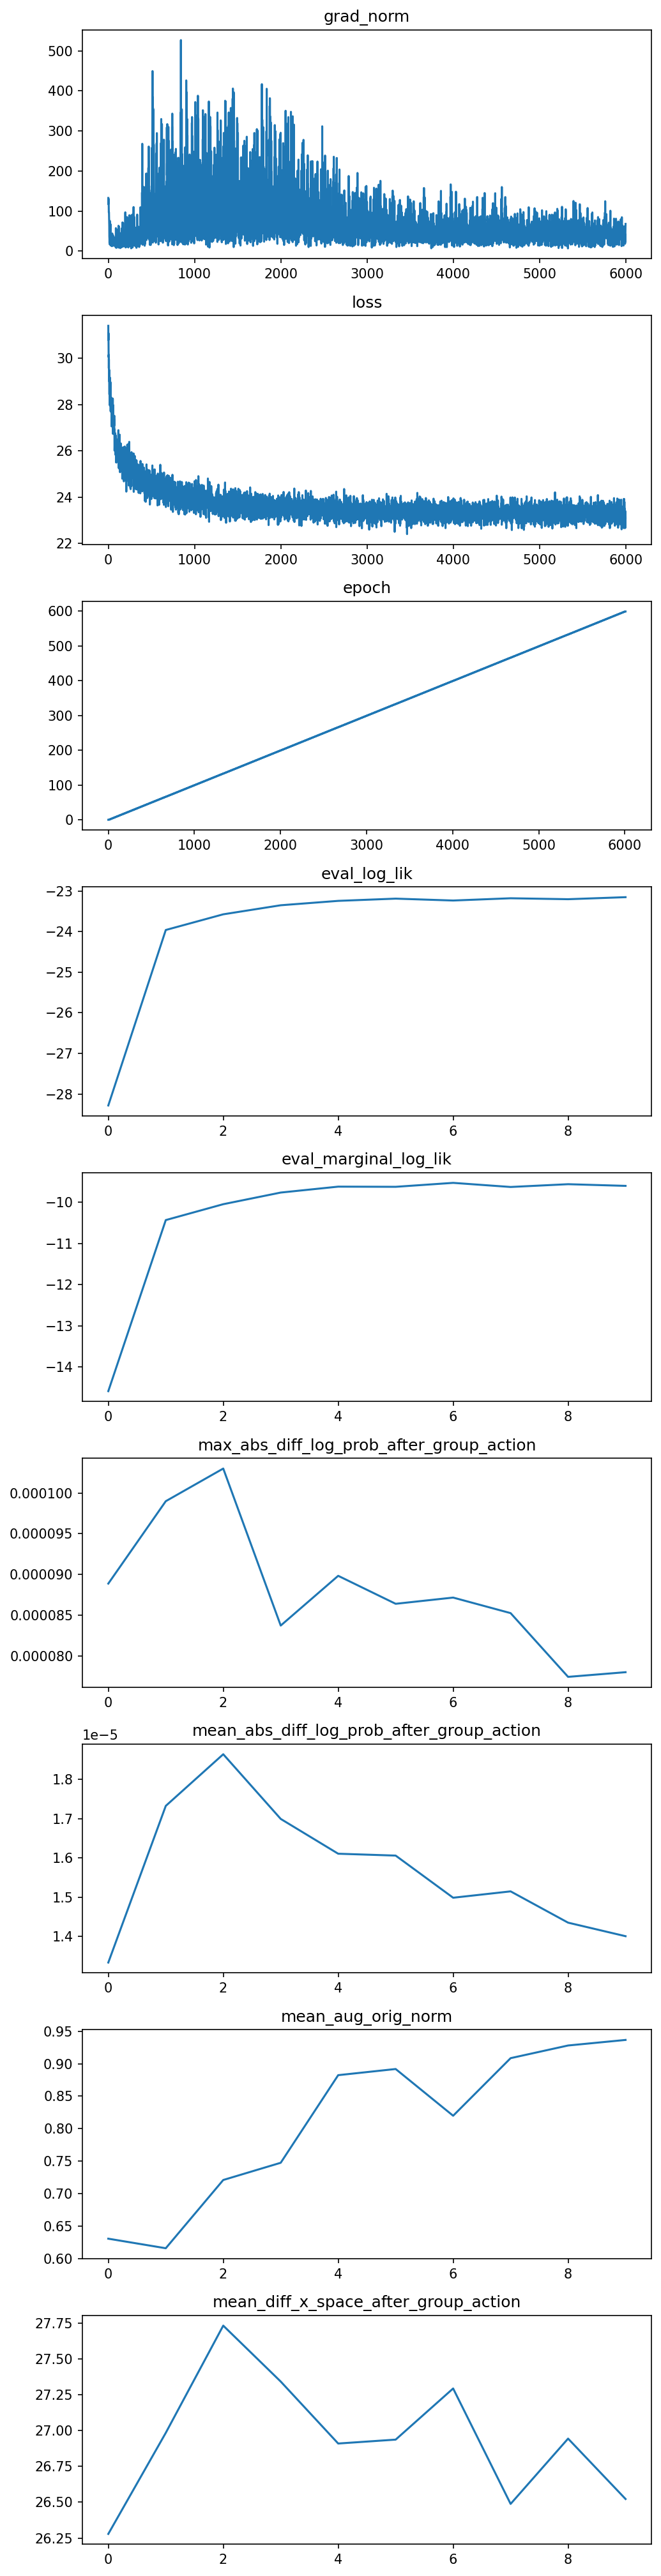

In [8]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [13]:
train_data_original, test_data_original = load_dataset(batch_size=cfg.training.batch_size, 
                                           train_set_size=1000, 
                                           test_set_size=1000)

In [14]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

[<Figure size 2250x1500 with 6 Axes>, <Figure size 1500x750 with 2 Axes>]

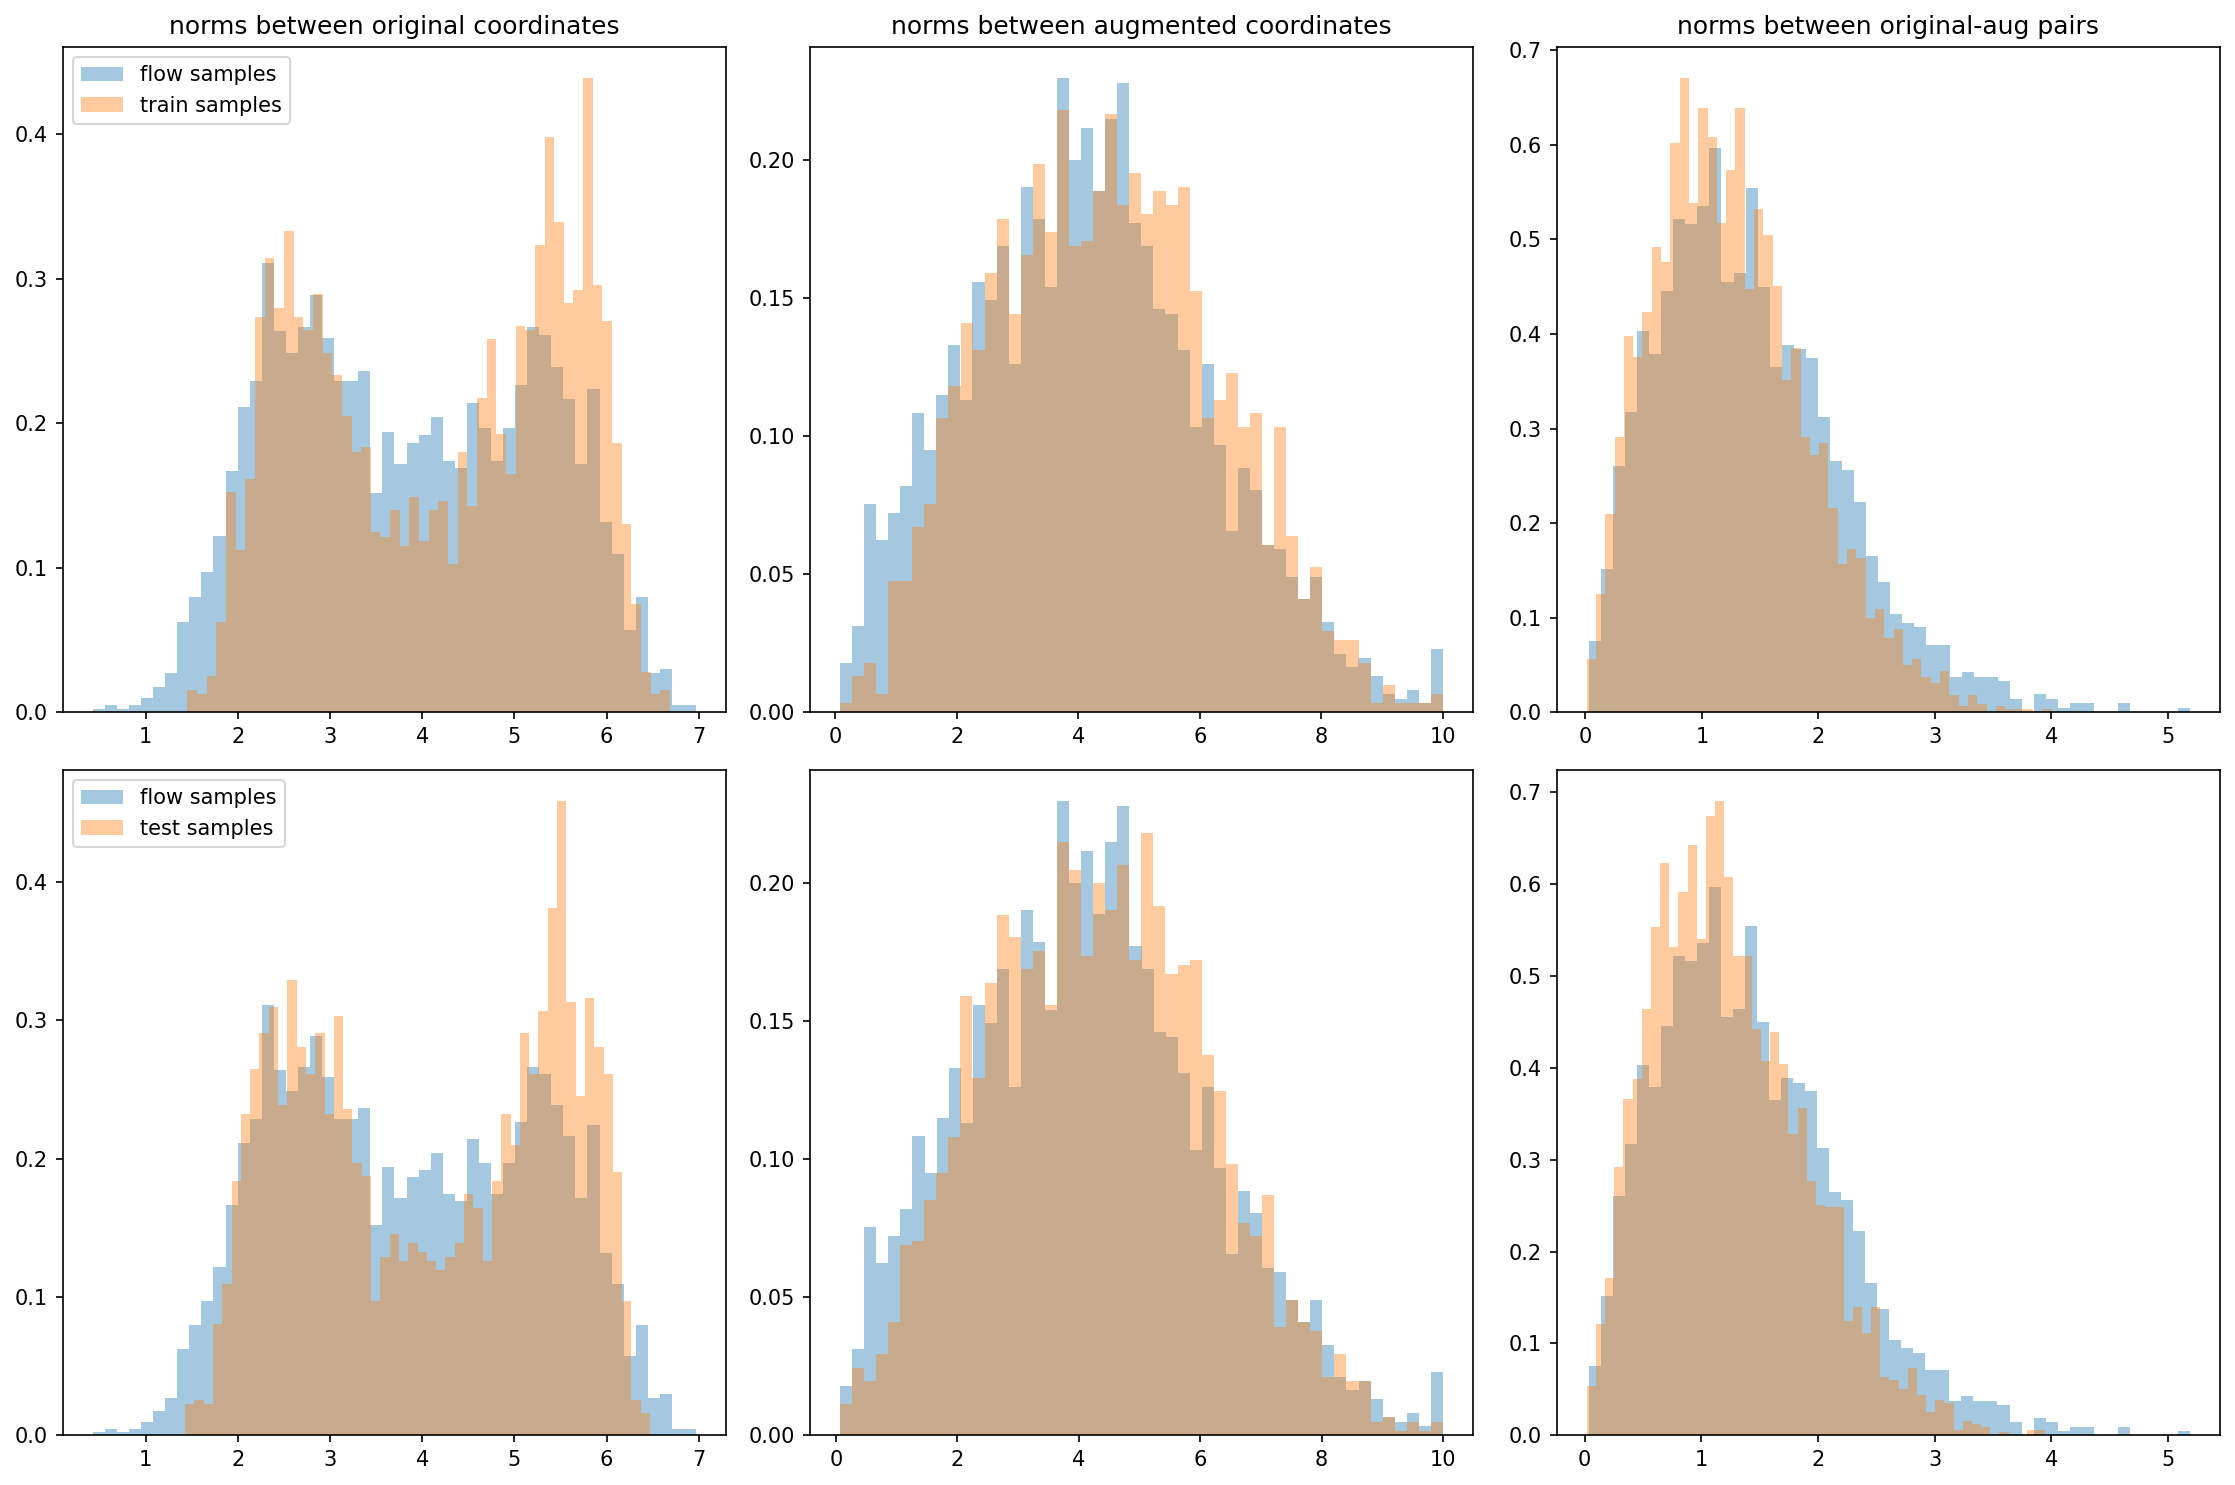

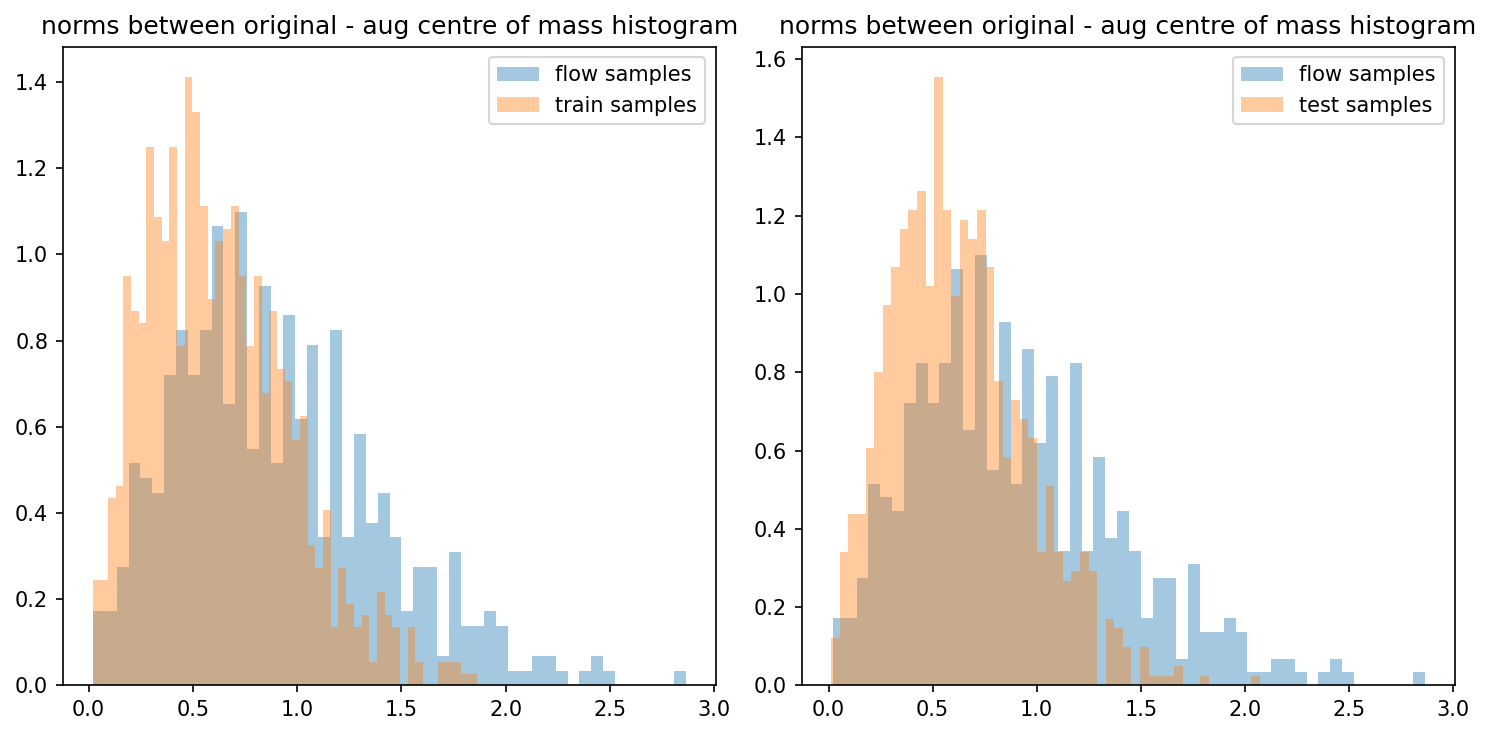

In [11]:
plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [12]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

{'ess': Array(0.01684521, dtype=float32),
 'eval_kl': Array(-995.993, dtype=float32),
 'eval_log_lik': Array(-23.15104, dtype=float32),
 'eval_marginal_log_lik': Array(-9.059358, dtype=float32),
 'max_abs_diff_log_prob_after_group_action': Array(8.583069e-05, dtype=float32),
 'mean_abs_diff_log_prob_after_group_action': Array(1.4284134e-05, dtype=float32),
 'mean_aug_orig_norm': Array(0.9120993, dtype=float32),
 'mean_diff_x_space_after_group_action': Array(26.574081, dtype=float32)}

# More expresive flow: add act norm
Helps performance but plots seem worse?

In [13]:
cfg.flow.type= "nice"
cfg.flow.act_norm = True

creating flow of type nice
training data shape of (1000, 4, 2)


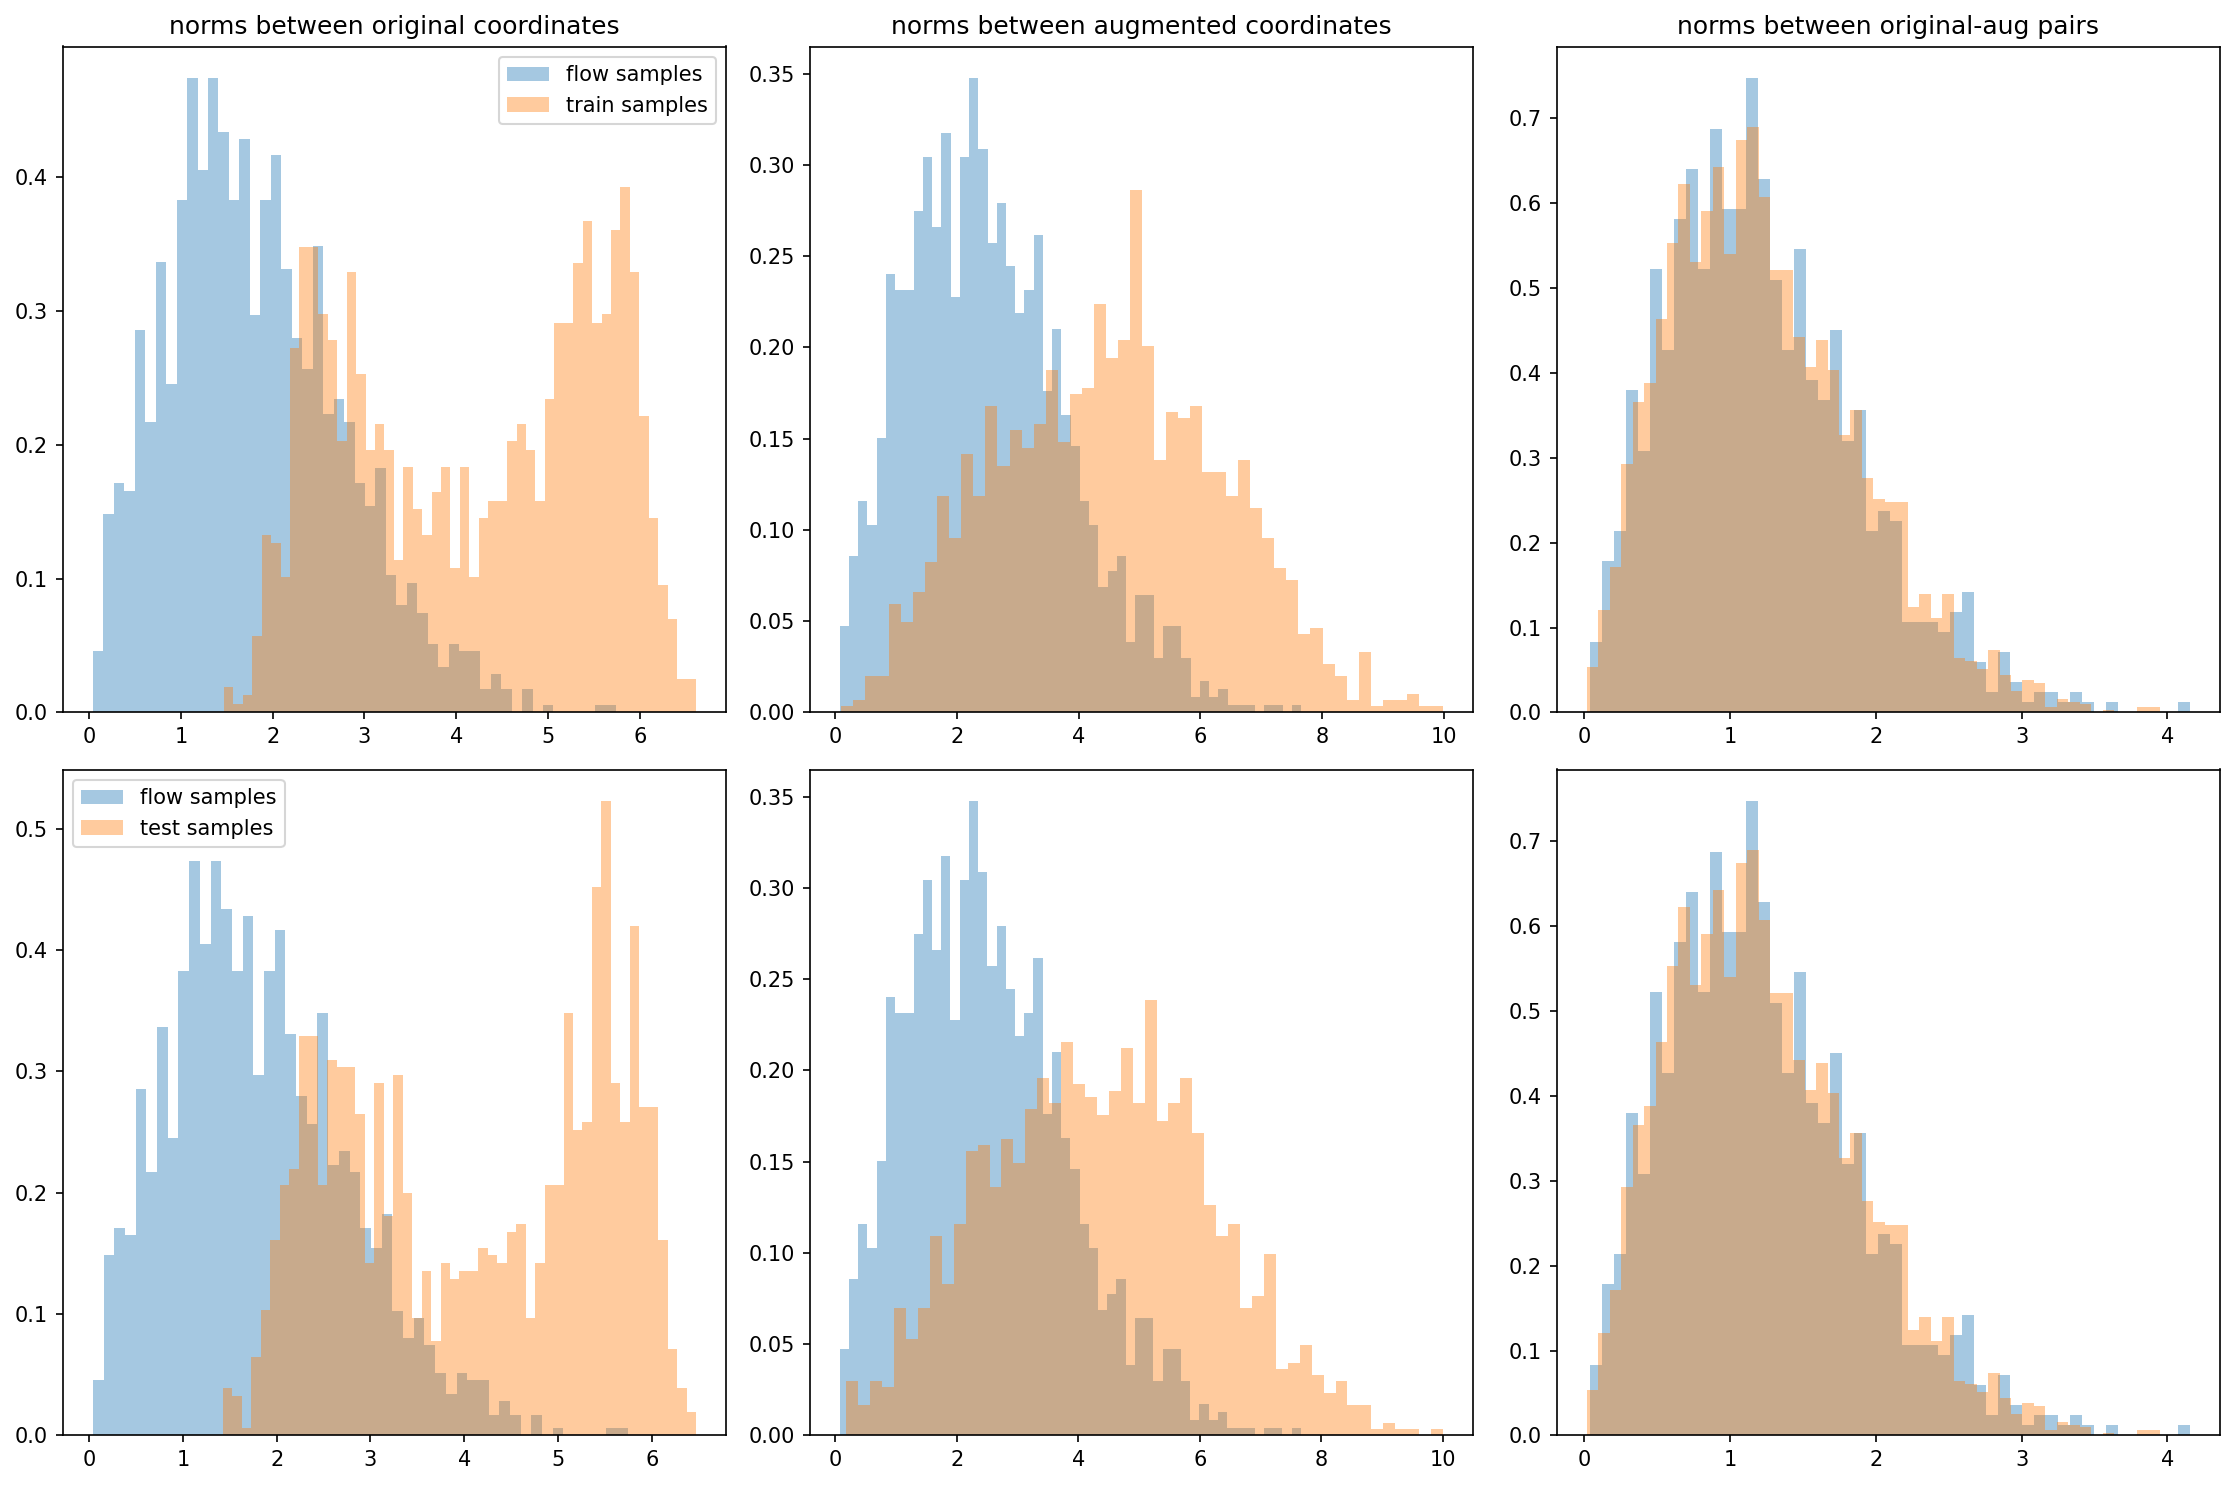

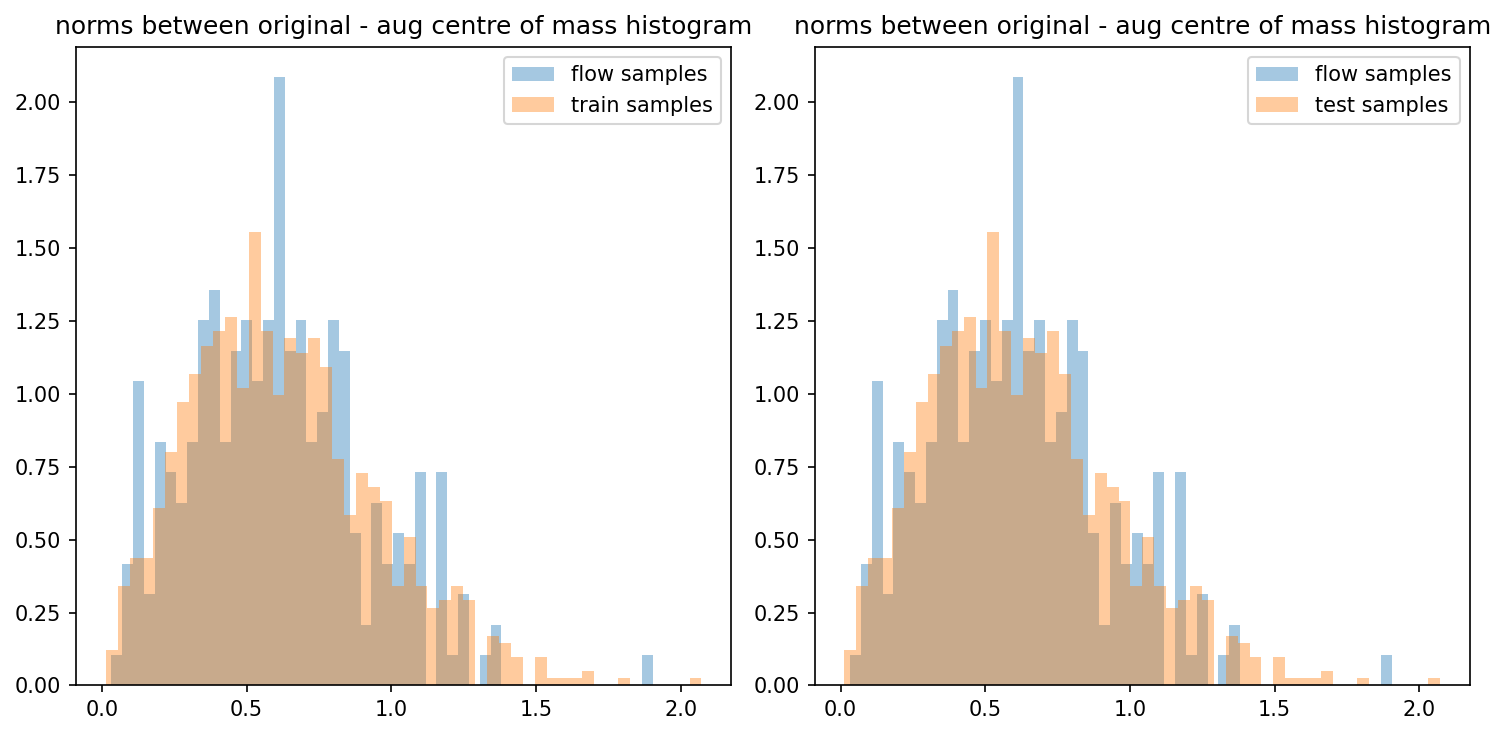

  0%|                                                   | 0/600 [00:00<?, ?it/s]

non numeric history values being saved


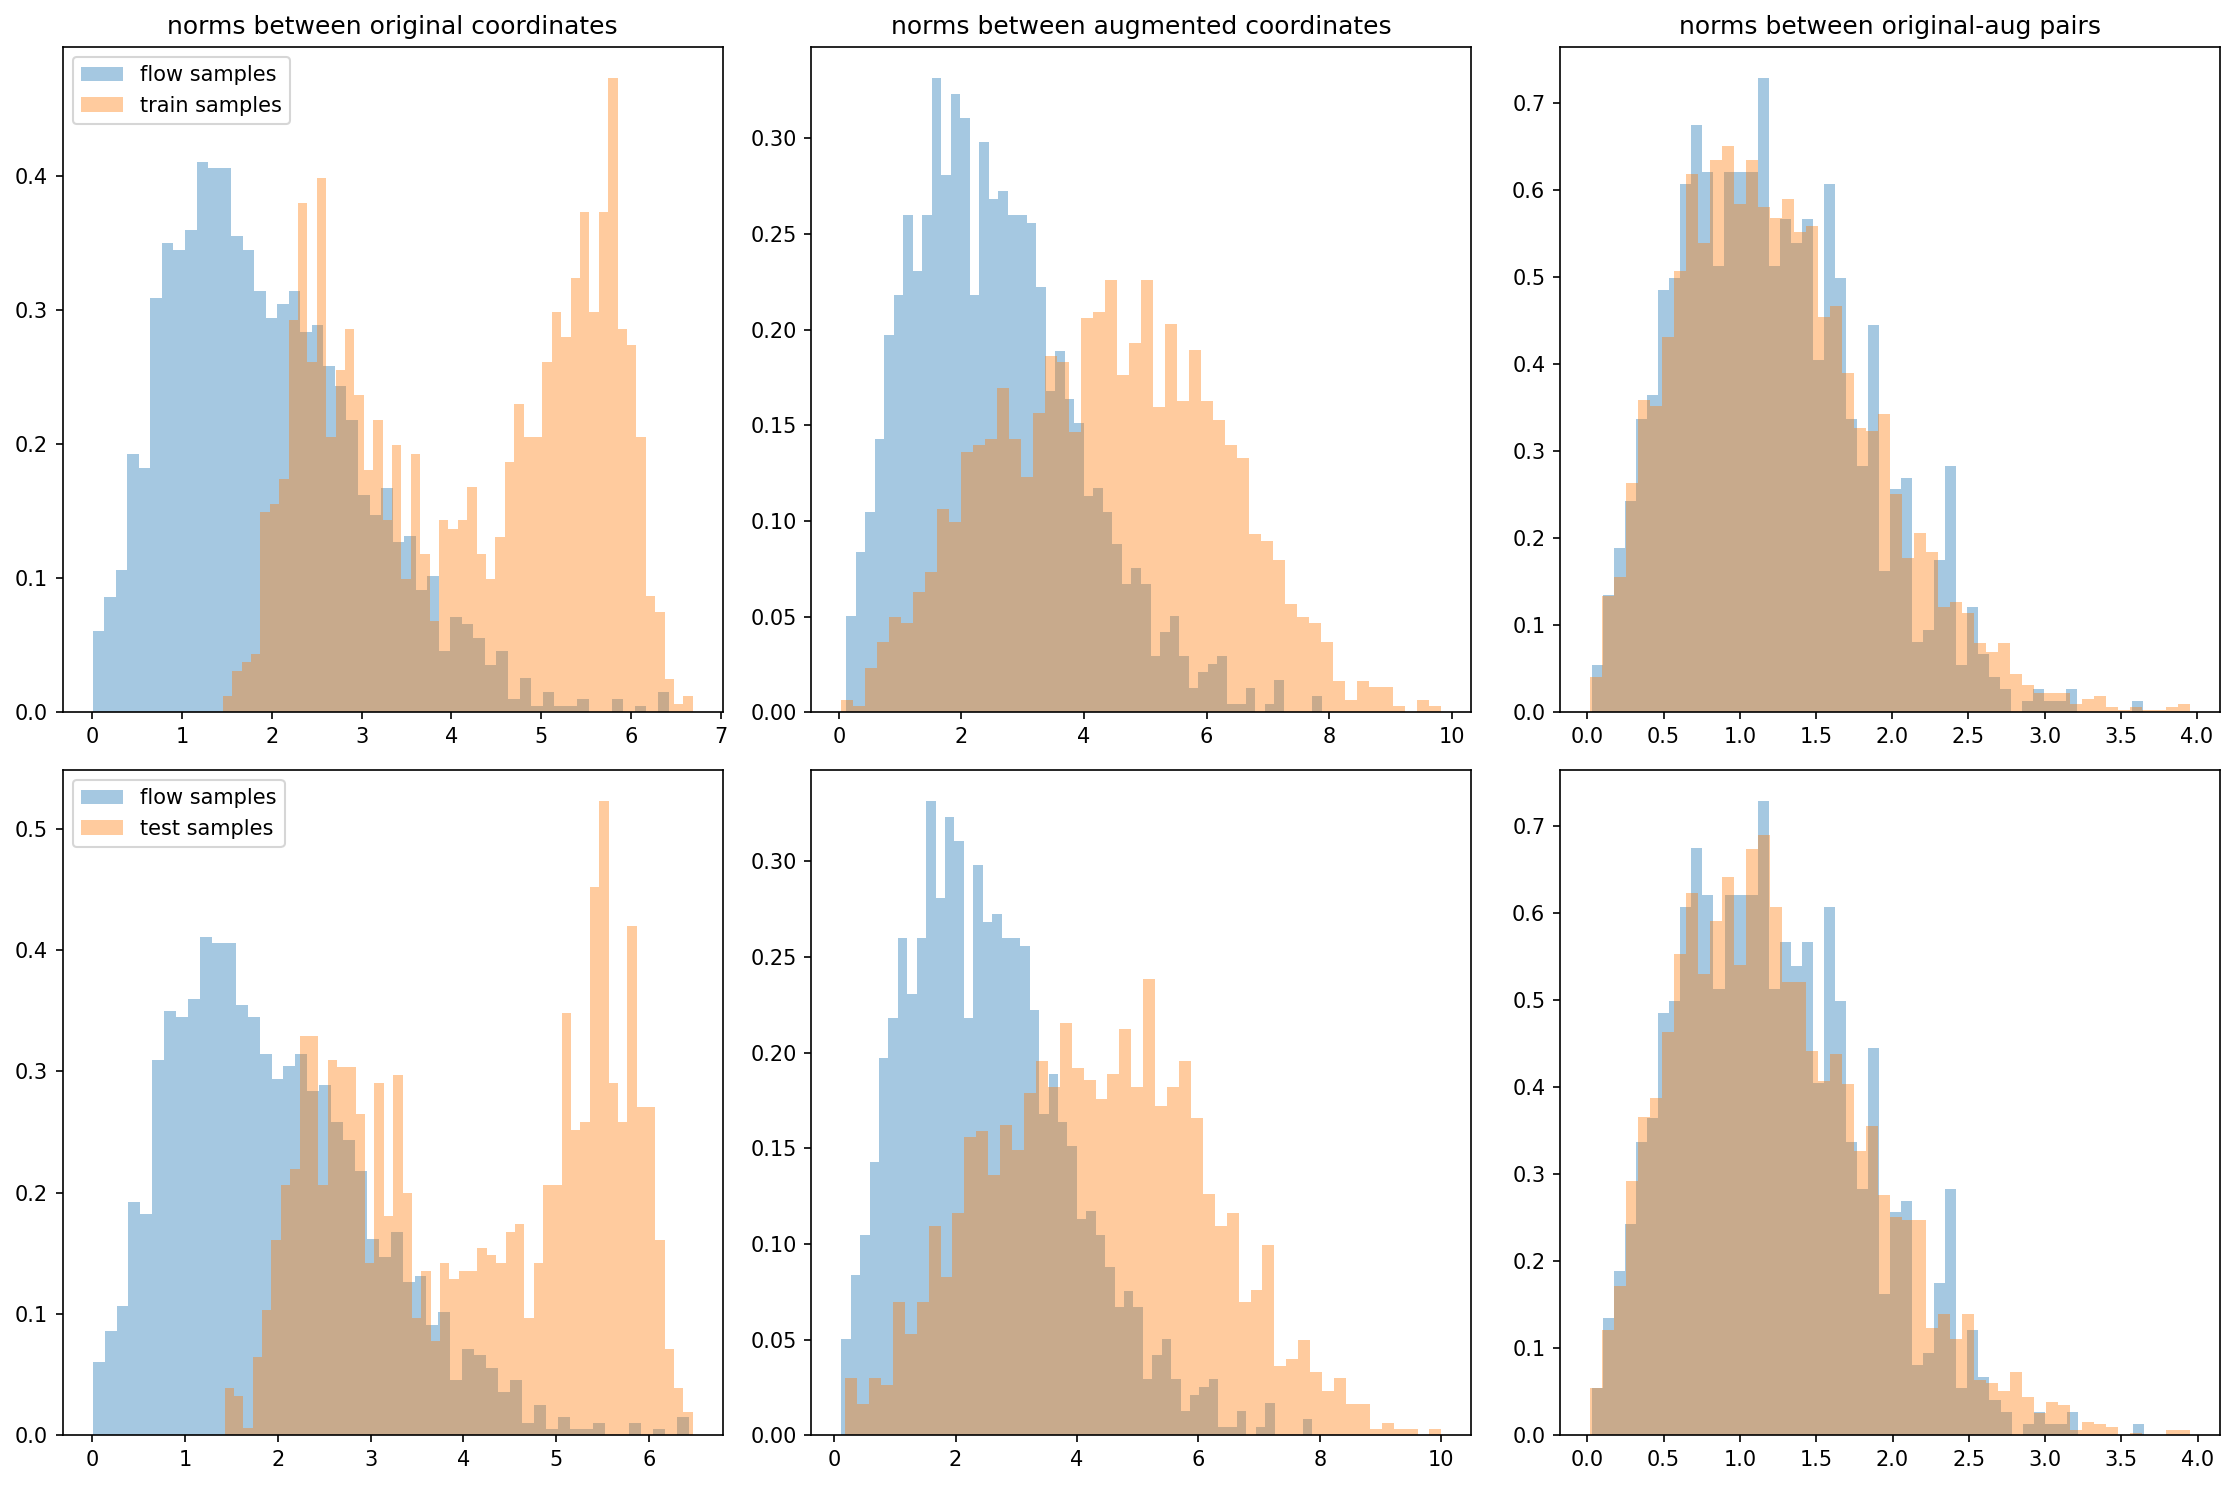

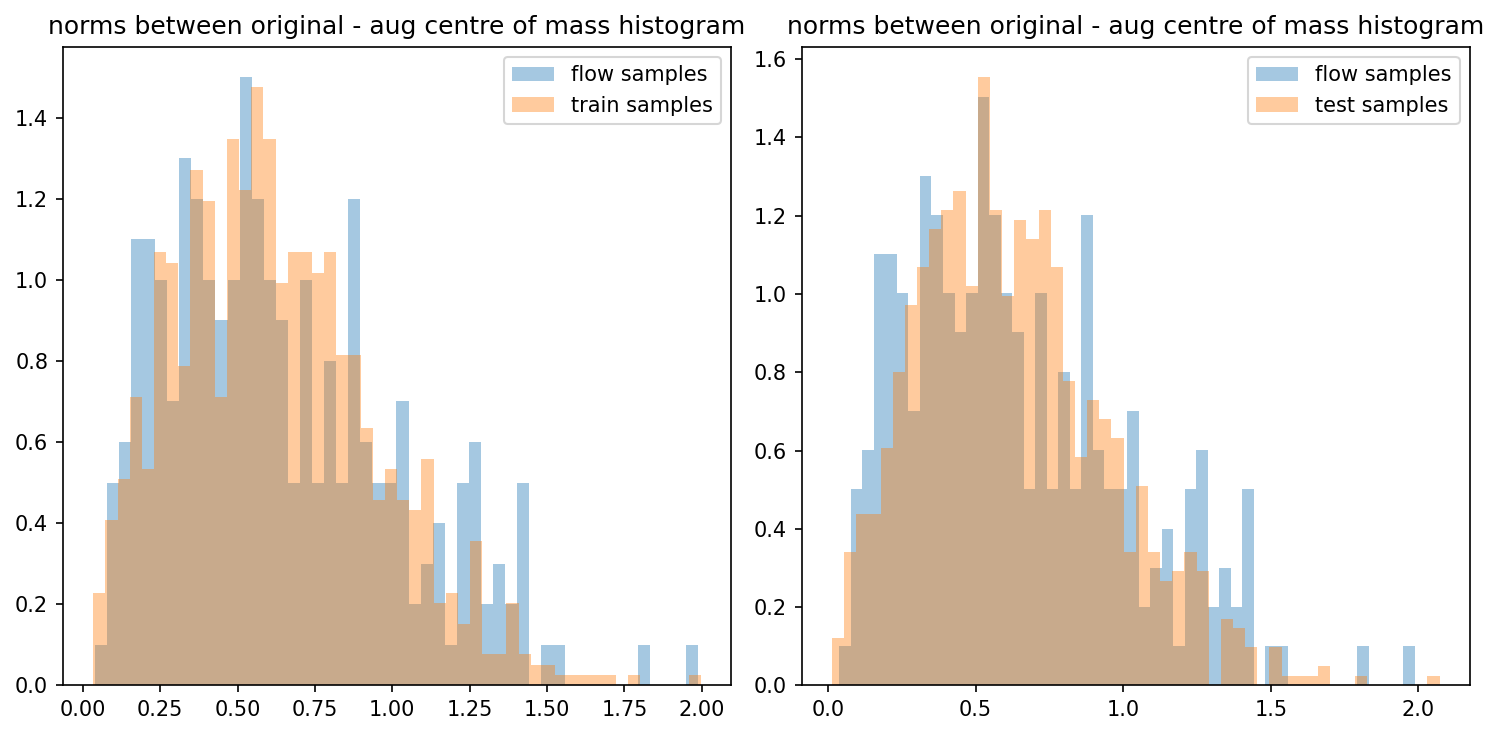

  0%|▏                                        | 2/600 [00:23<1:38:36,  9.89s/it]

{'eval_log_lik': Array(-28.0779, dtype=float32), 'eval_marginal_log_lik': Array(-14.386477, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00015488, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.487564e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.6378375, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.2787, dtype=float32)}


 11%|████▊                                     | 68/600 [00:32<01:15,  7.01it/s]

{'eval_log_lik': Array(-23.653797, dtype=float32), 'eval_marginal_log_lik': Array(-10.129145, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.000107, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.9691468e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.8191339, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.98458, dtype=float32)}


 20%|████████▏                                | 119/600 [00:39<01:02,  7.65it/s]

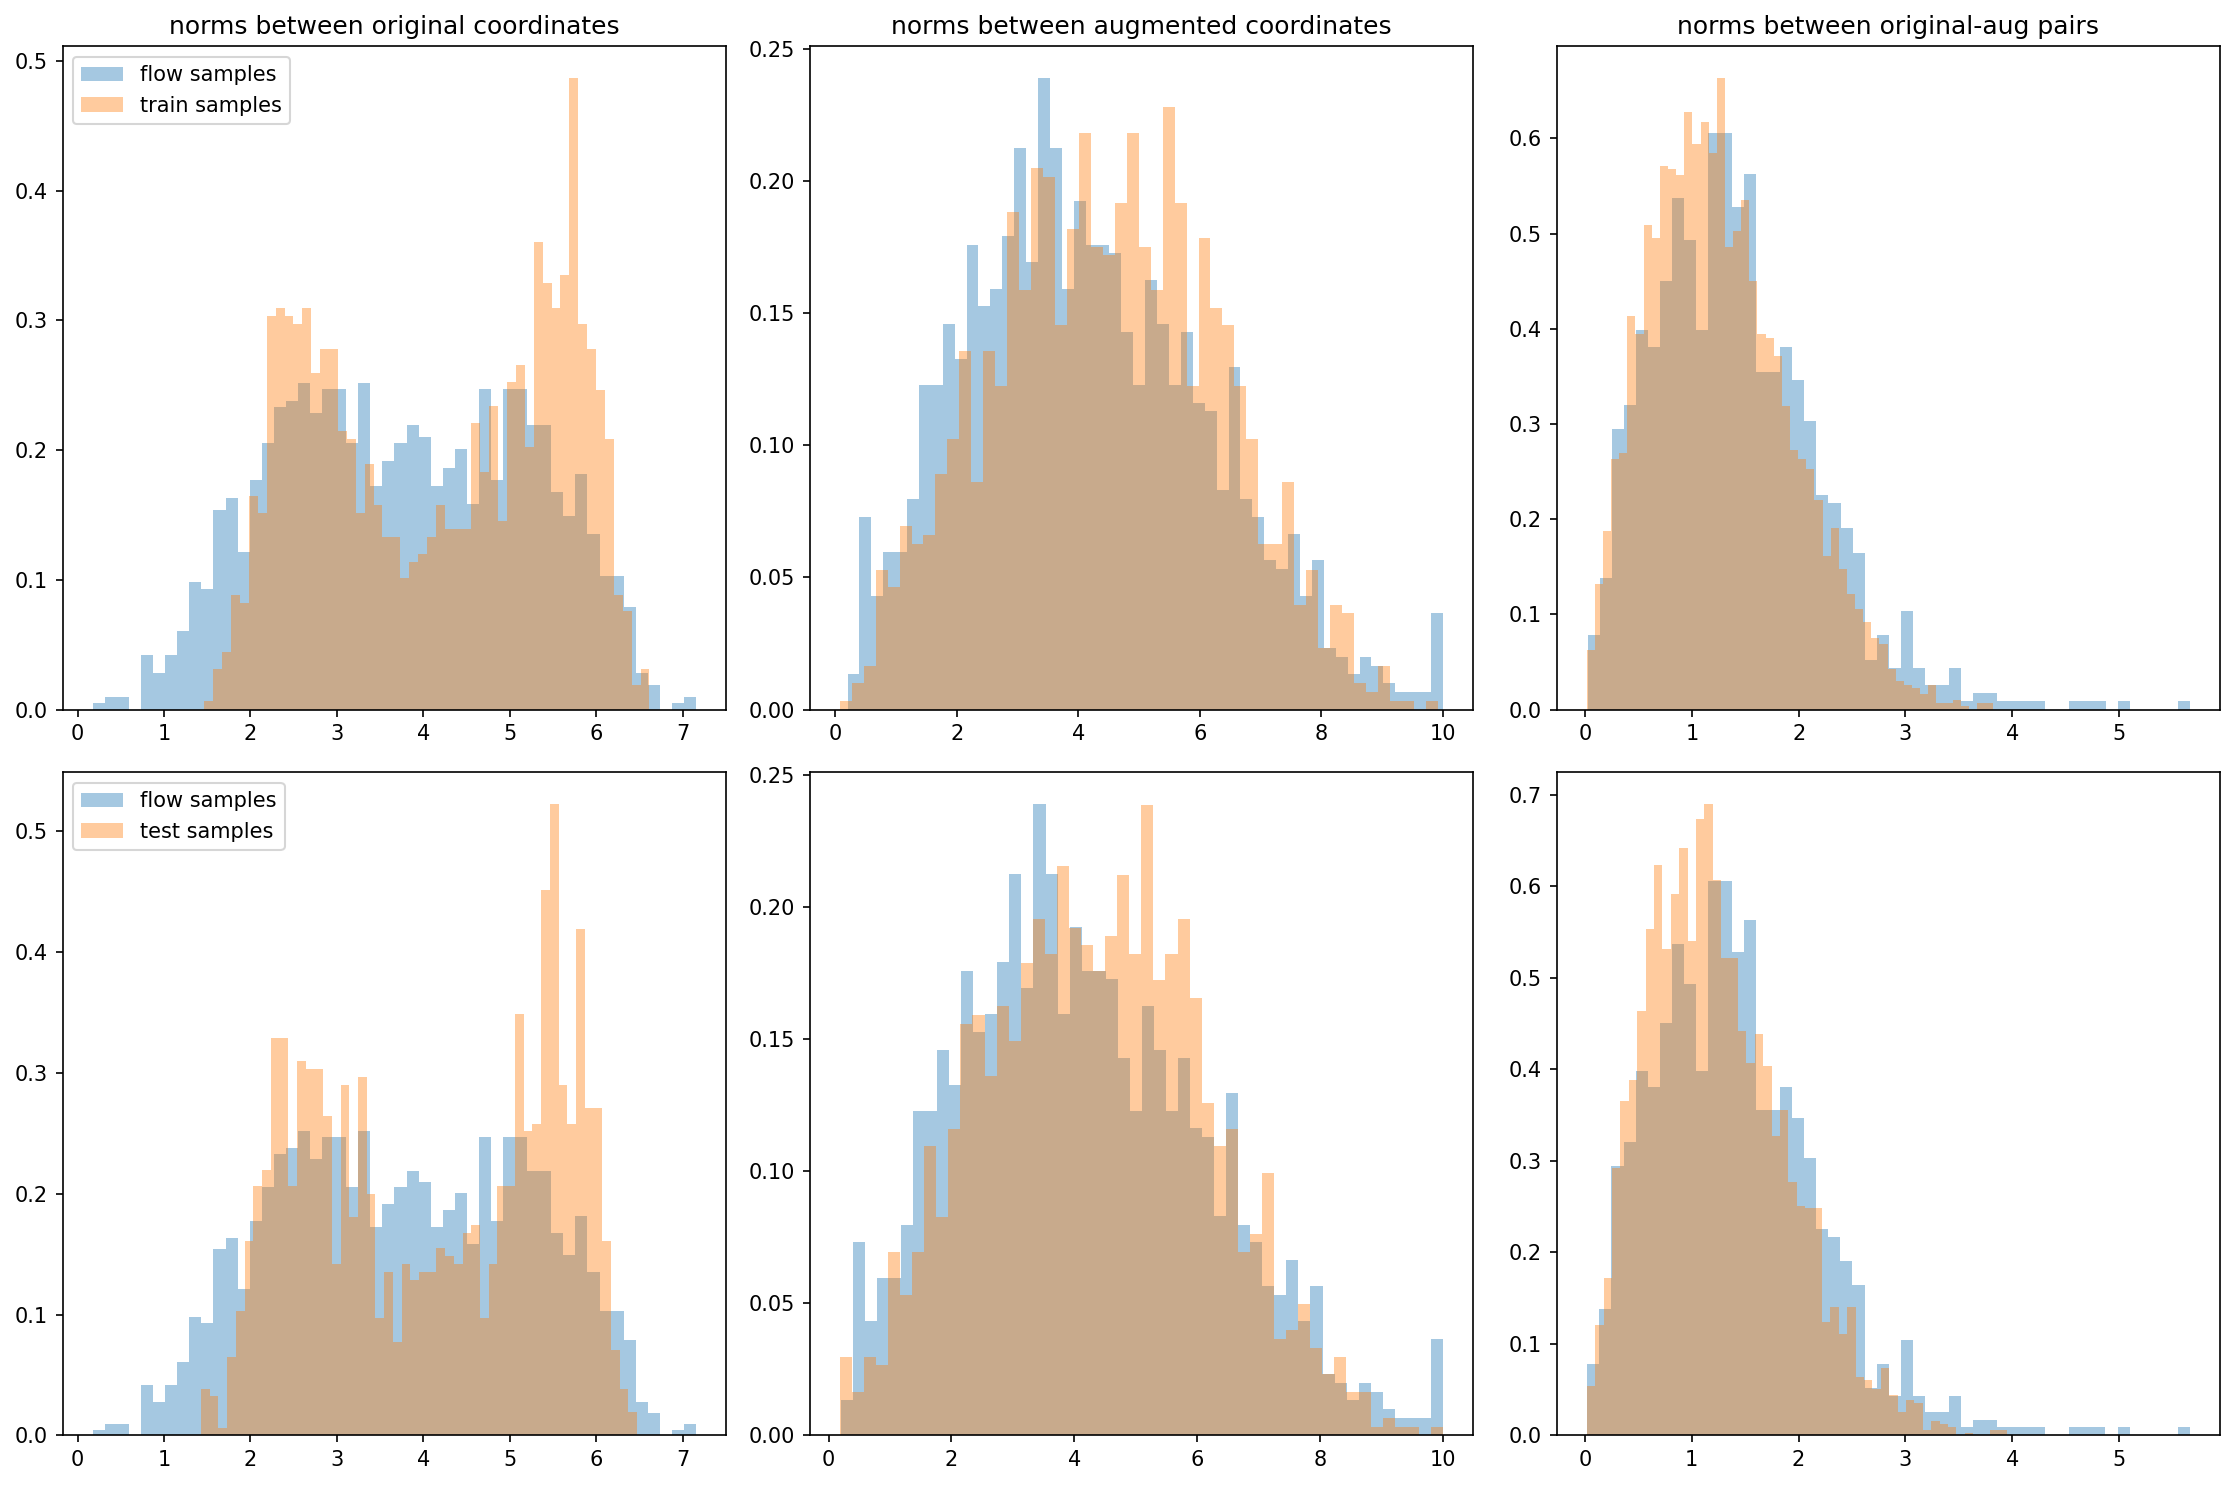

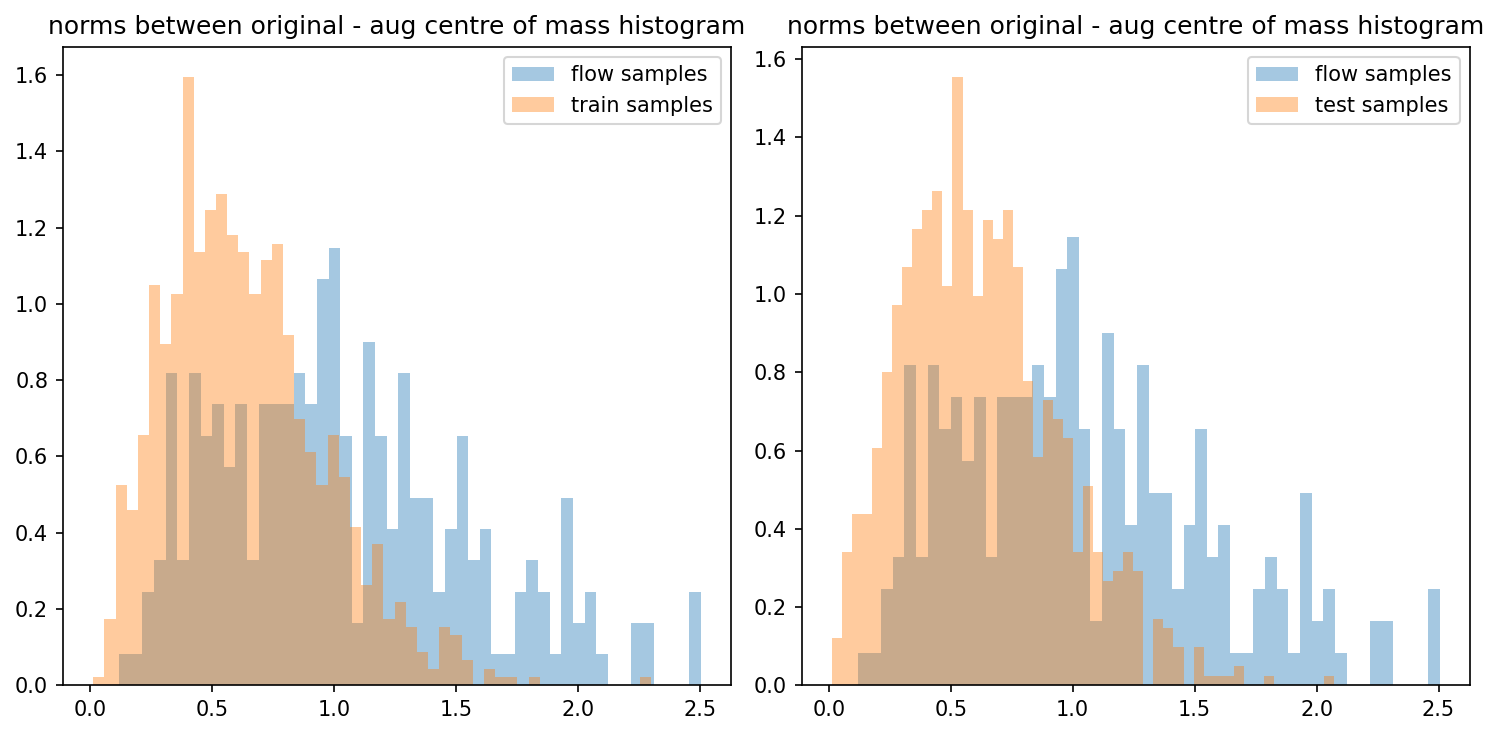

 22%|█████████▏                               | 135/600 [00:45<01:06,  7.00it/s]

{'eval_log_lik': Array(-23.222967, dtype=float32), 'eval_marginal_log_lik': Array(-9.6987295, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00013714, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.3090362e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.0624626, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.733246, dtype=float32)}


 34%|█████████████▋                           | 201/600 [00:54<00:55,  7.22it/s]

{'eval_log_lik': Array(-23.0214, dtype=float32), 'eval_marginal_log_lik': Array(-9.437427, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00013866, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.4858473e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.2435385, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.342731, dtype=float32)}


 40%|████████████████▎                        | 239/600 [00:58<00:45,  7.87it/s]

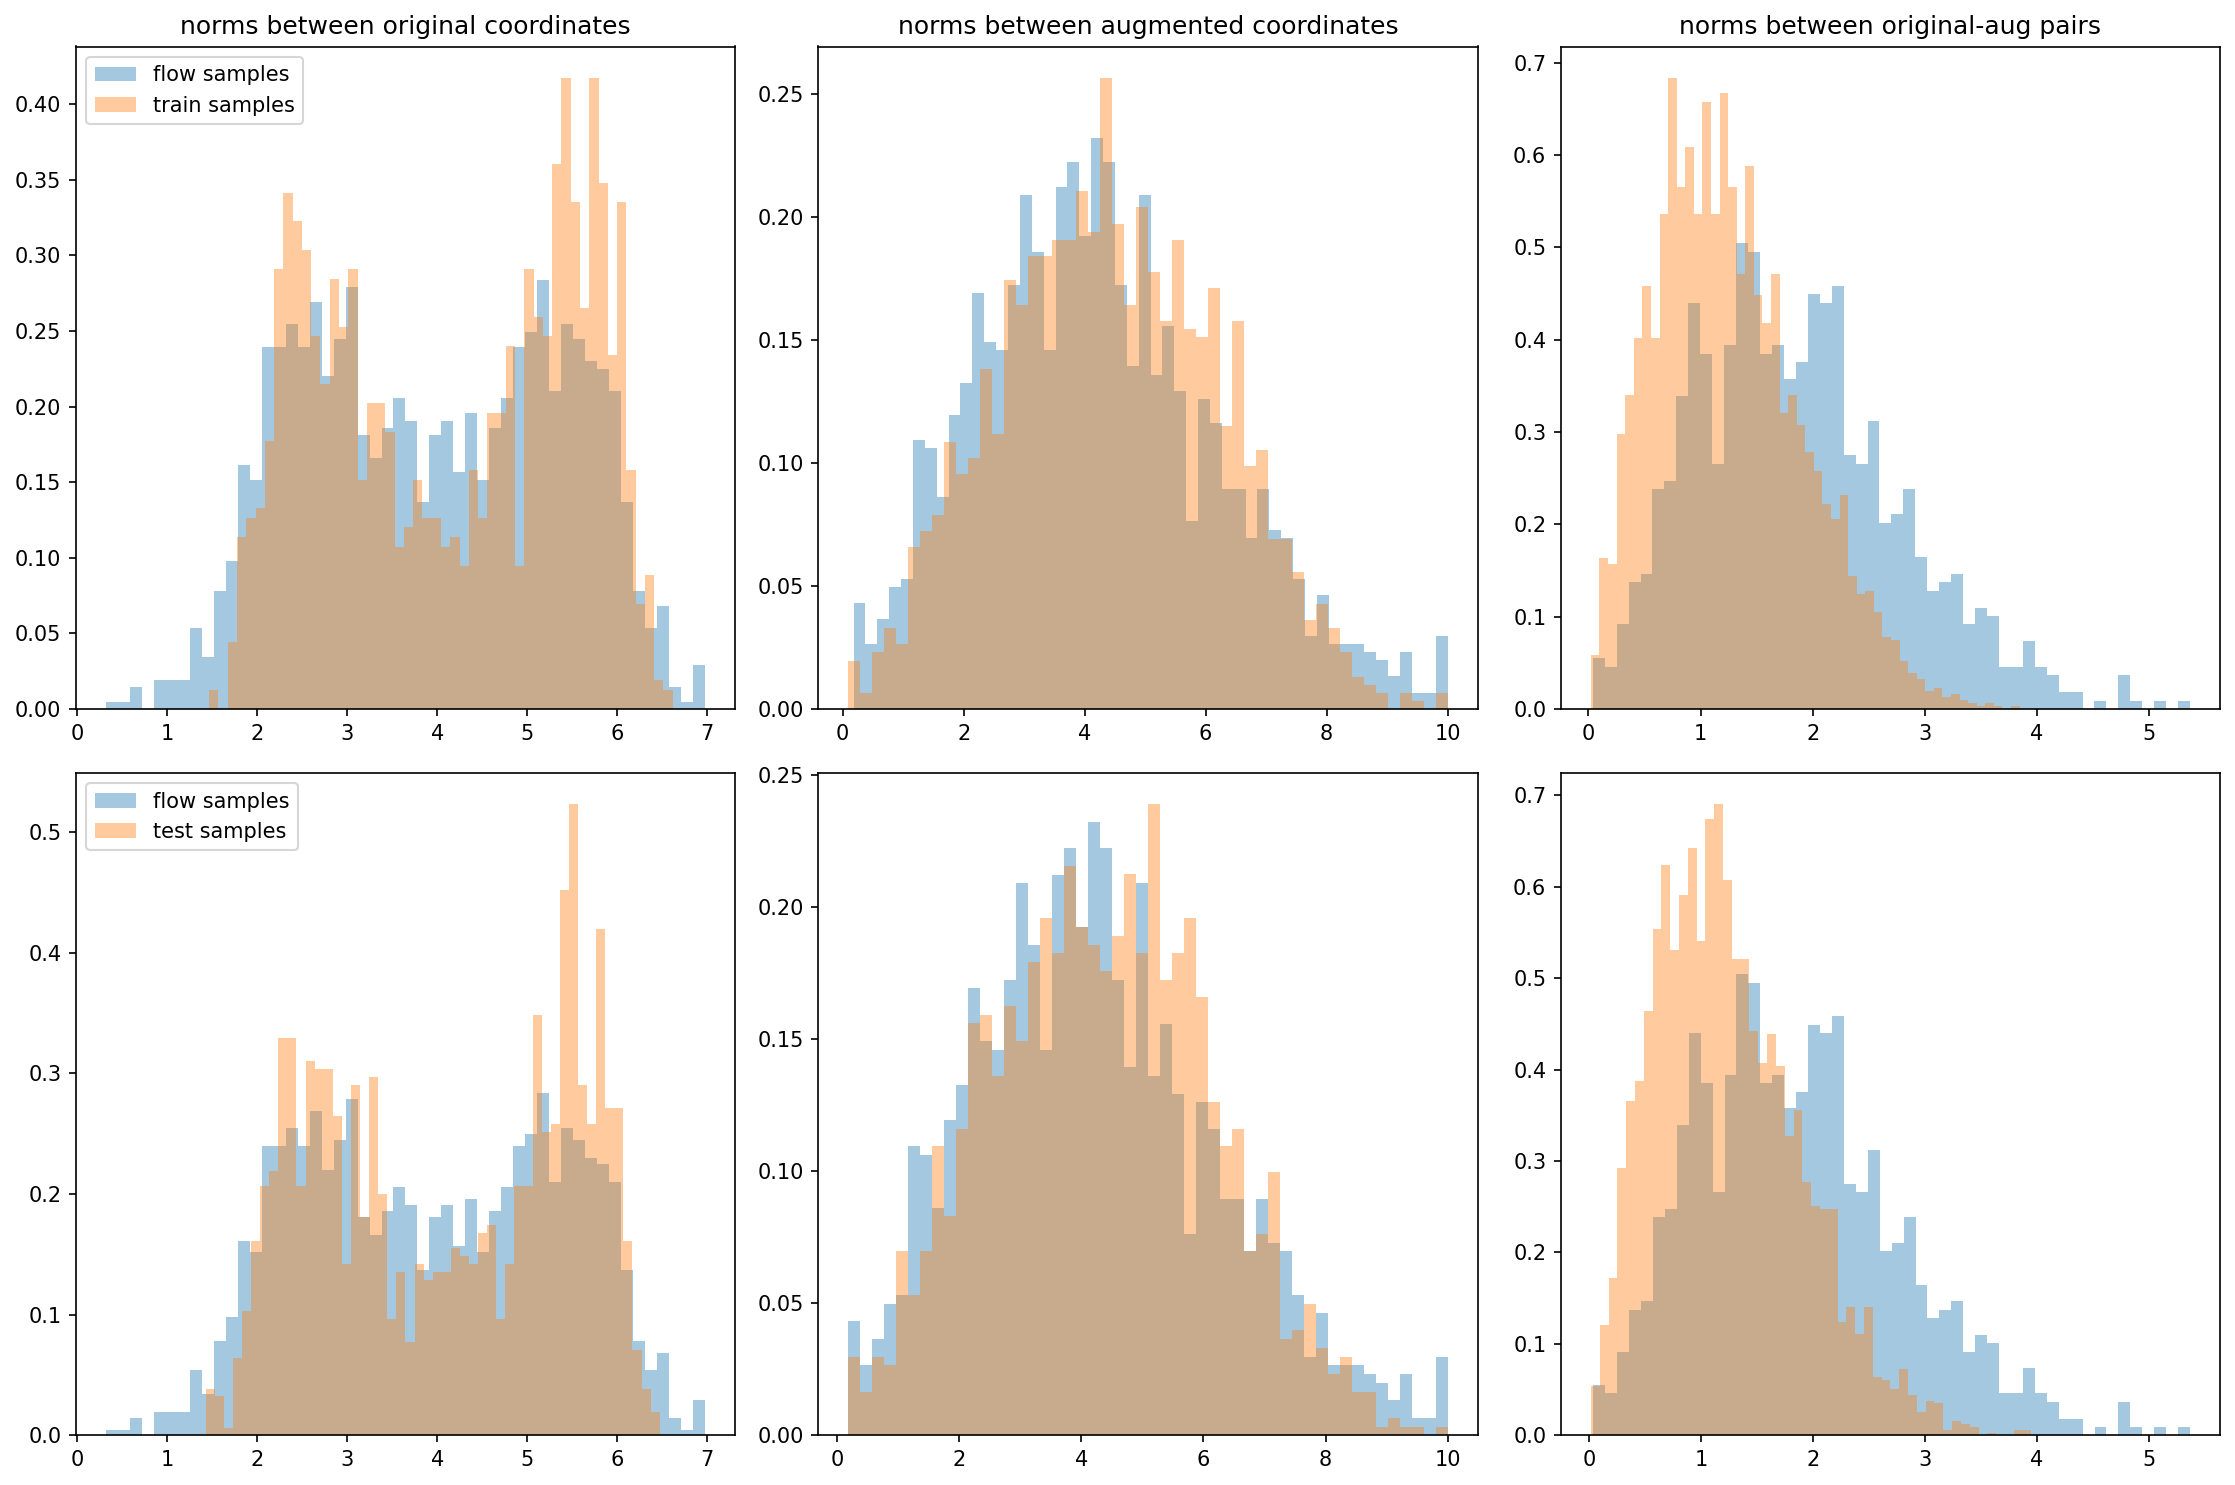

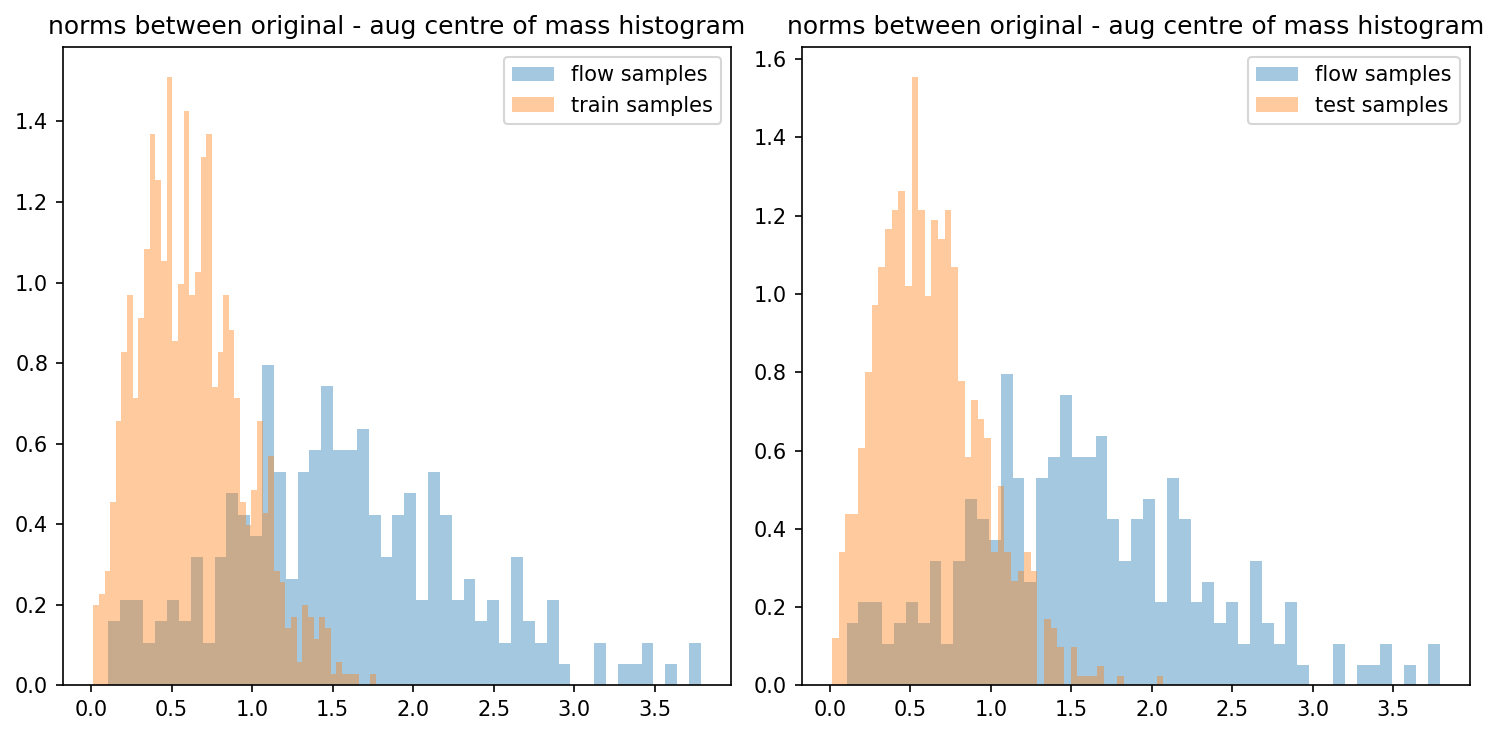

 45%|██████████████████▎                      | 268/600 [01:06<00:46,  7.11it/s]

{'eval_log_lik': Array(-22.842659, dtype=float32), 'eval_marginal_log_lik': Array(-9.223079, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00013943, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.3939134e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.6377264, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.910028, dtype=float32)}


 56%|██████████████████████▊                  | 334/600 [01:15<00:35,  7.44it/s]

{'eval_log_lik': Array(-22.741598, dtype=float32), 'eval_marginal_log_lik': Array(-9.181166, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00013447, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.5802612e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.8061486, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.937271, dtype=float32)}


 60%|████████████████████████▌                | 359/600 [01:18<00:31,  7.64it/s]

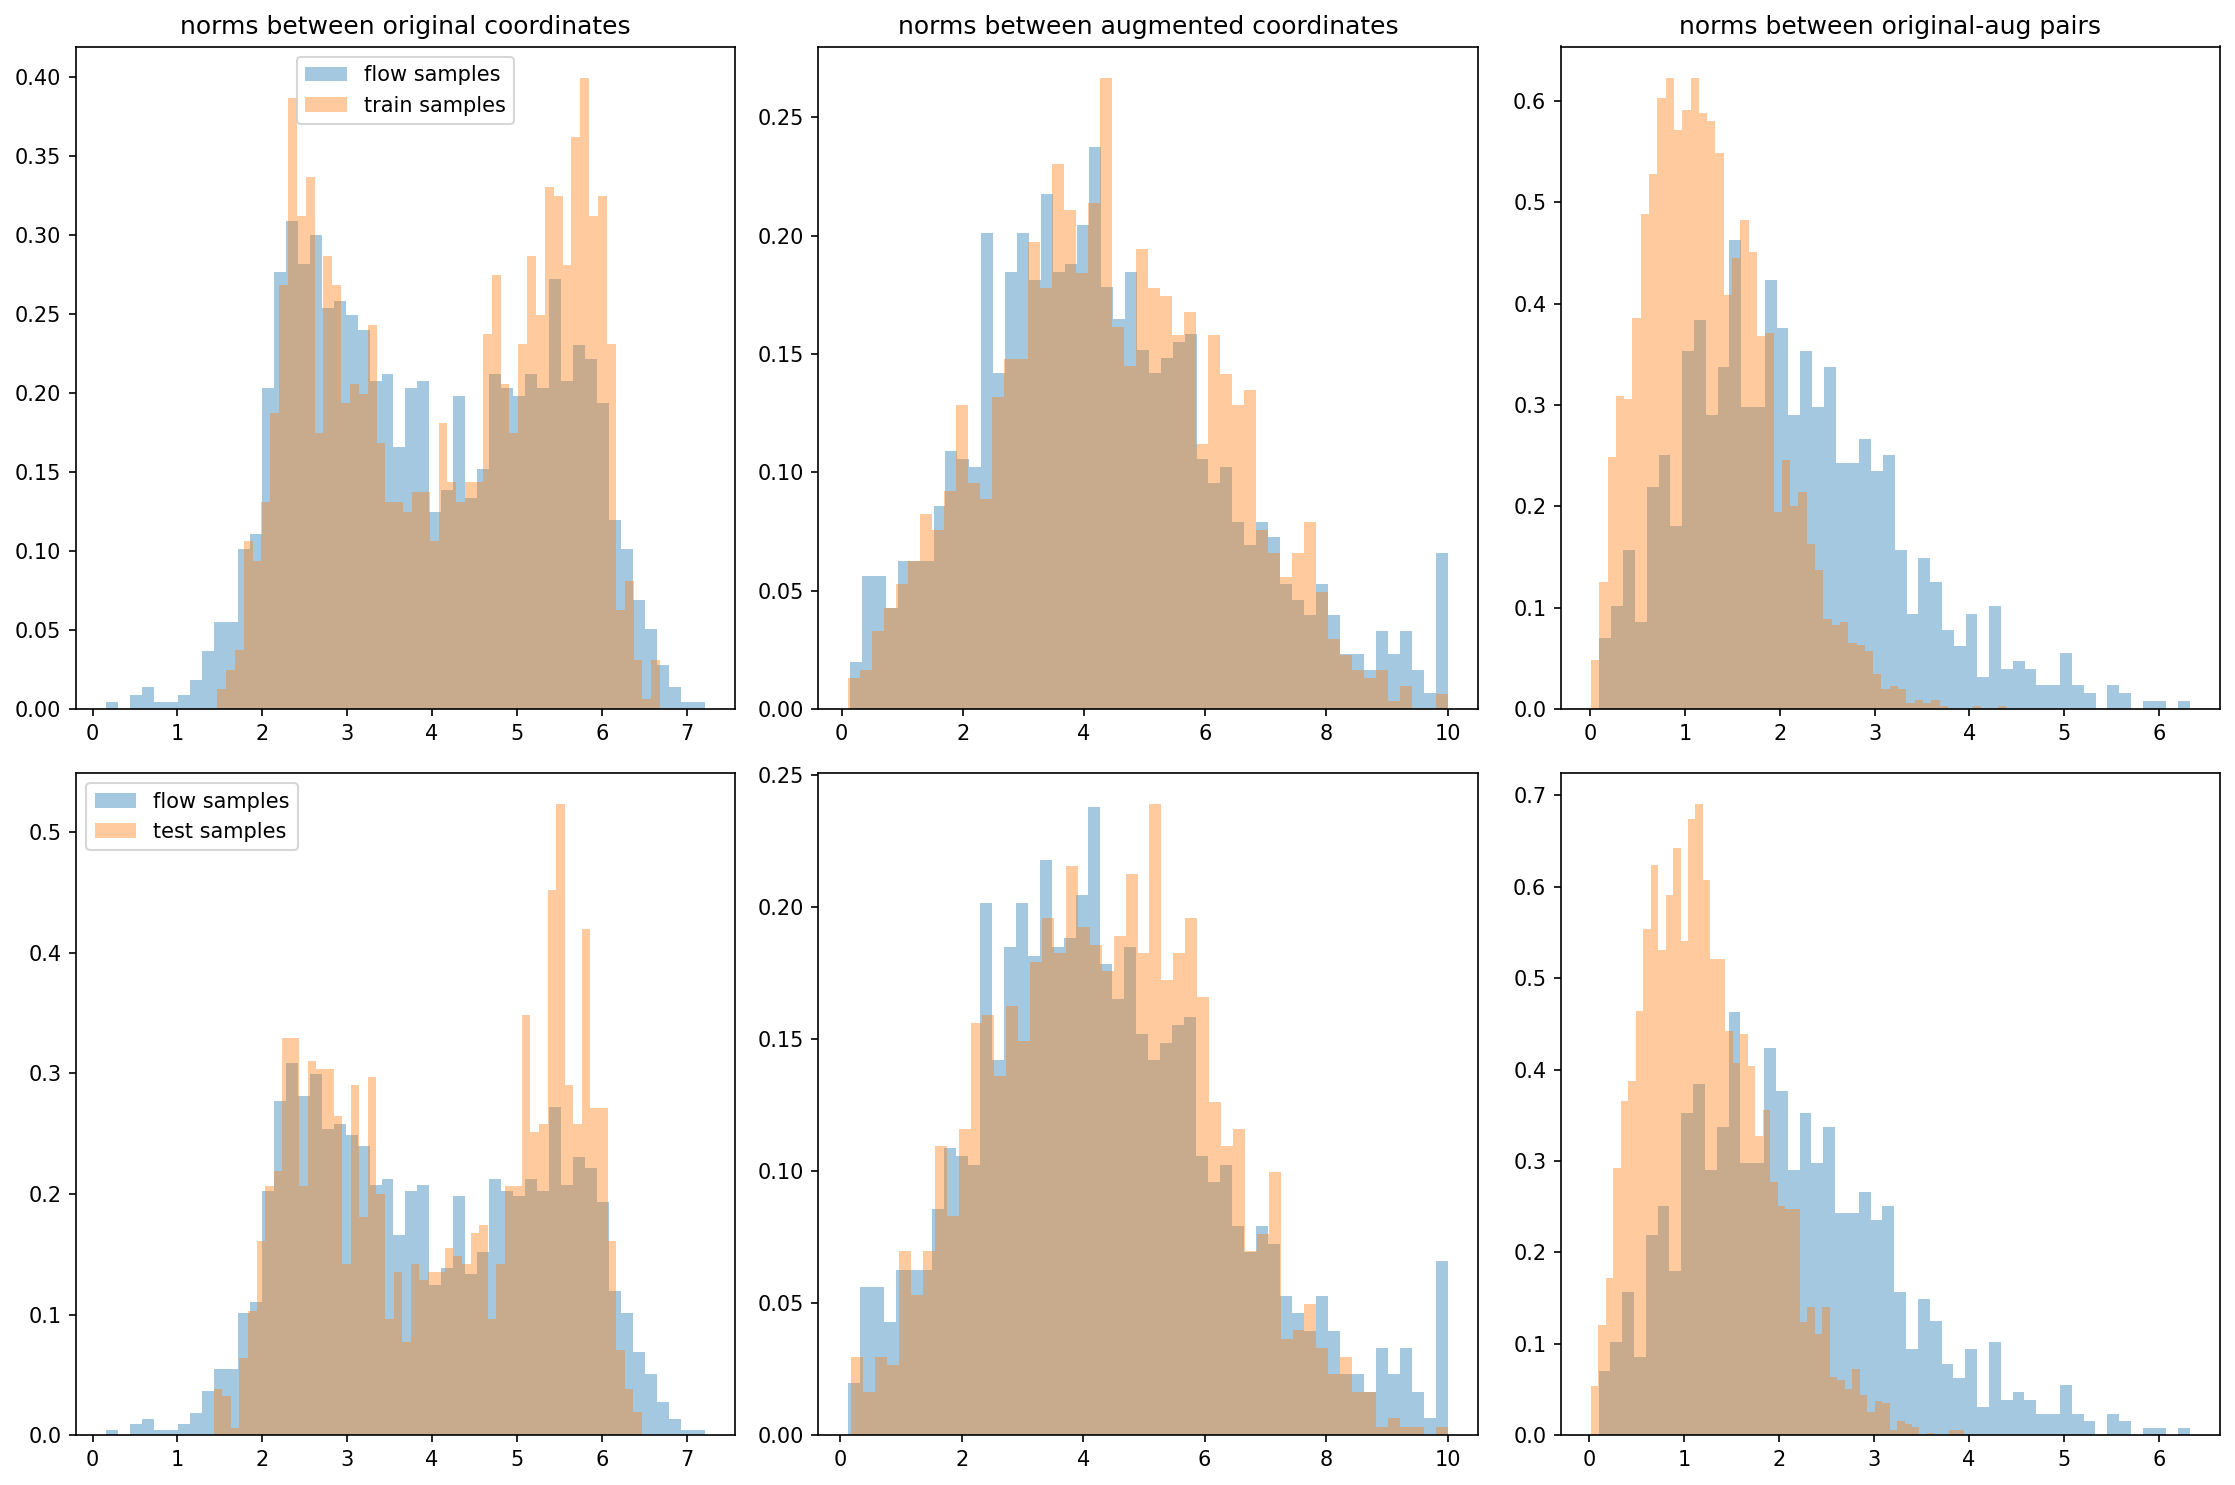

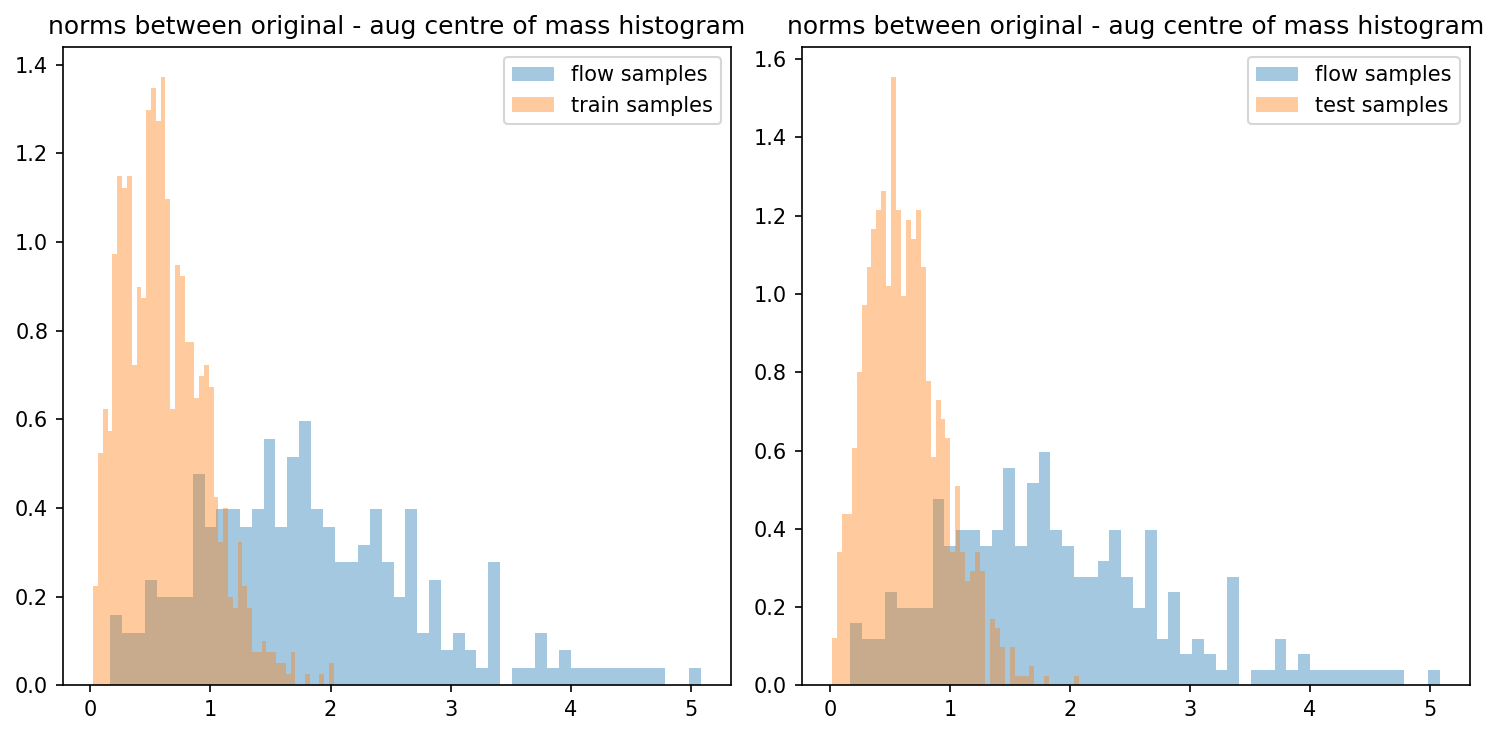

 67%|███████████████████████████▍             | 401/600 [01:27<00:28,  7.09it/s]

{'eval_log_lik': Array(-22.672962, dtype=float32), 'eval_marginal_log_lik': Array(-8.970165, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.0001358, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.4608611e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.8217932, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.294386, dtype=float32)}


 78%|███████████████████████████████▉         | 467/600 [01:36<00:17,  7.49it/s]

{'eval_log_lik': Array(-22.634096, dtype=float32), 'eval_marginal_log_lik': Array(-9.086925, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00015373, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.615547e-05, dtype=float32), 'mean_aug_orig_norm': Array(2.2060764, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.48827, dtype=float32)}


 80%|████████████████████████████████▋        | 479/600 [01:37<00:15,  7.97it/s]

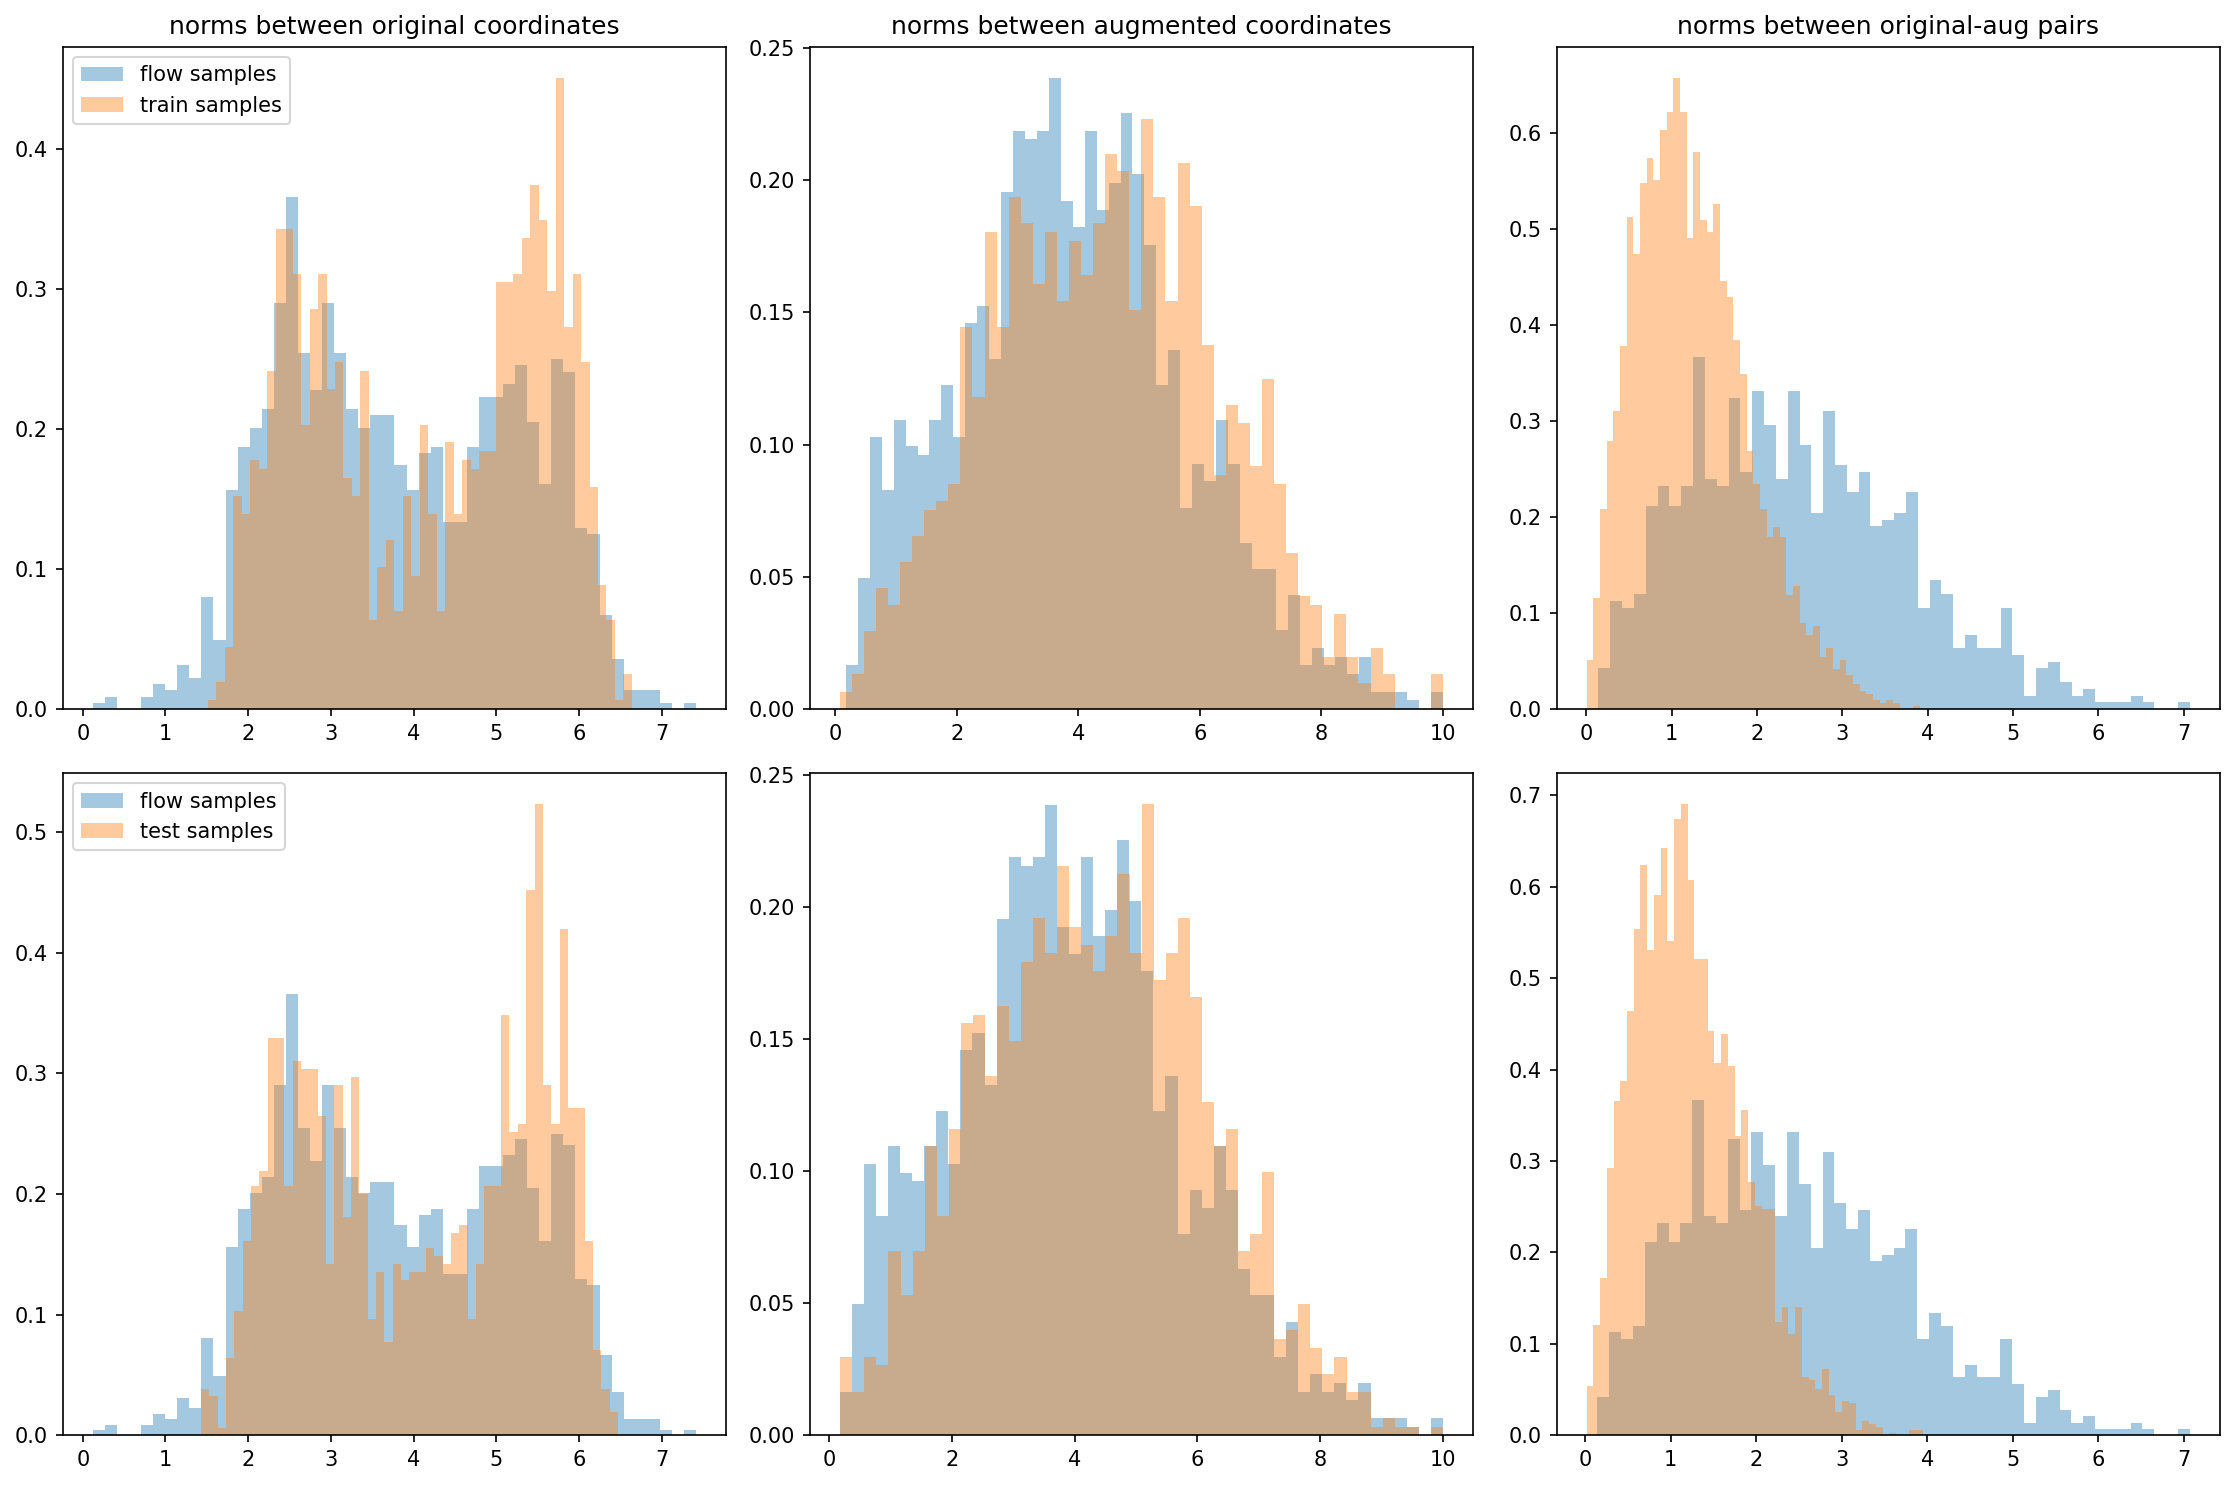

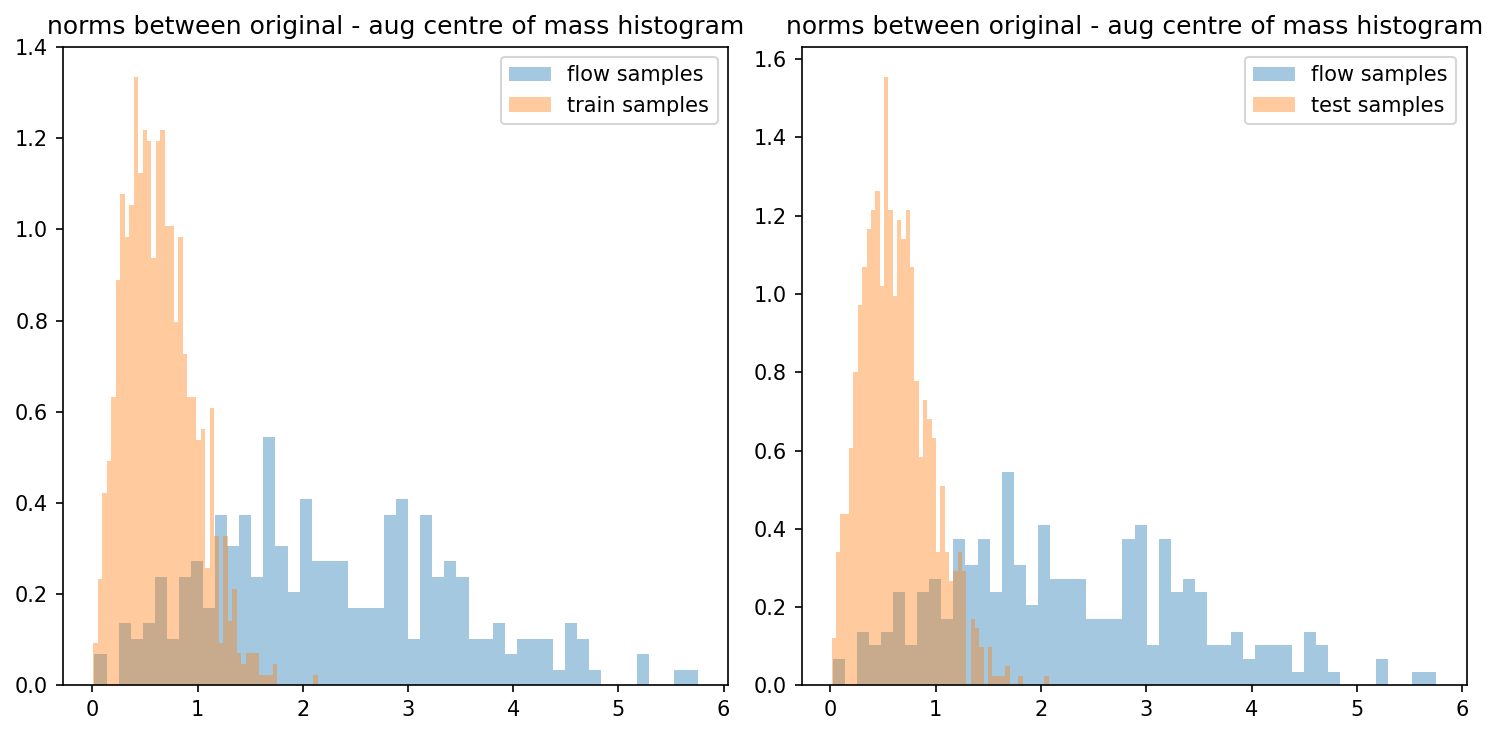

 89%|████████████████████████████████████▍    | 534/600 [01:48<00:09,  7.19it/s]

{'eval_log_lik': Array(-22.664572, dtype=float32), 'eval_marginal_log_lik': Array(-9.026443, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00014648, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.7857783e-05, dtype=float32), 'mean_aug_orig_norm': Array(2.4417062, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.944304, dtype=float32)}


100%|████████████████████████████████████████▉| 599/600 [01:56<00:00,  7.96it/s]

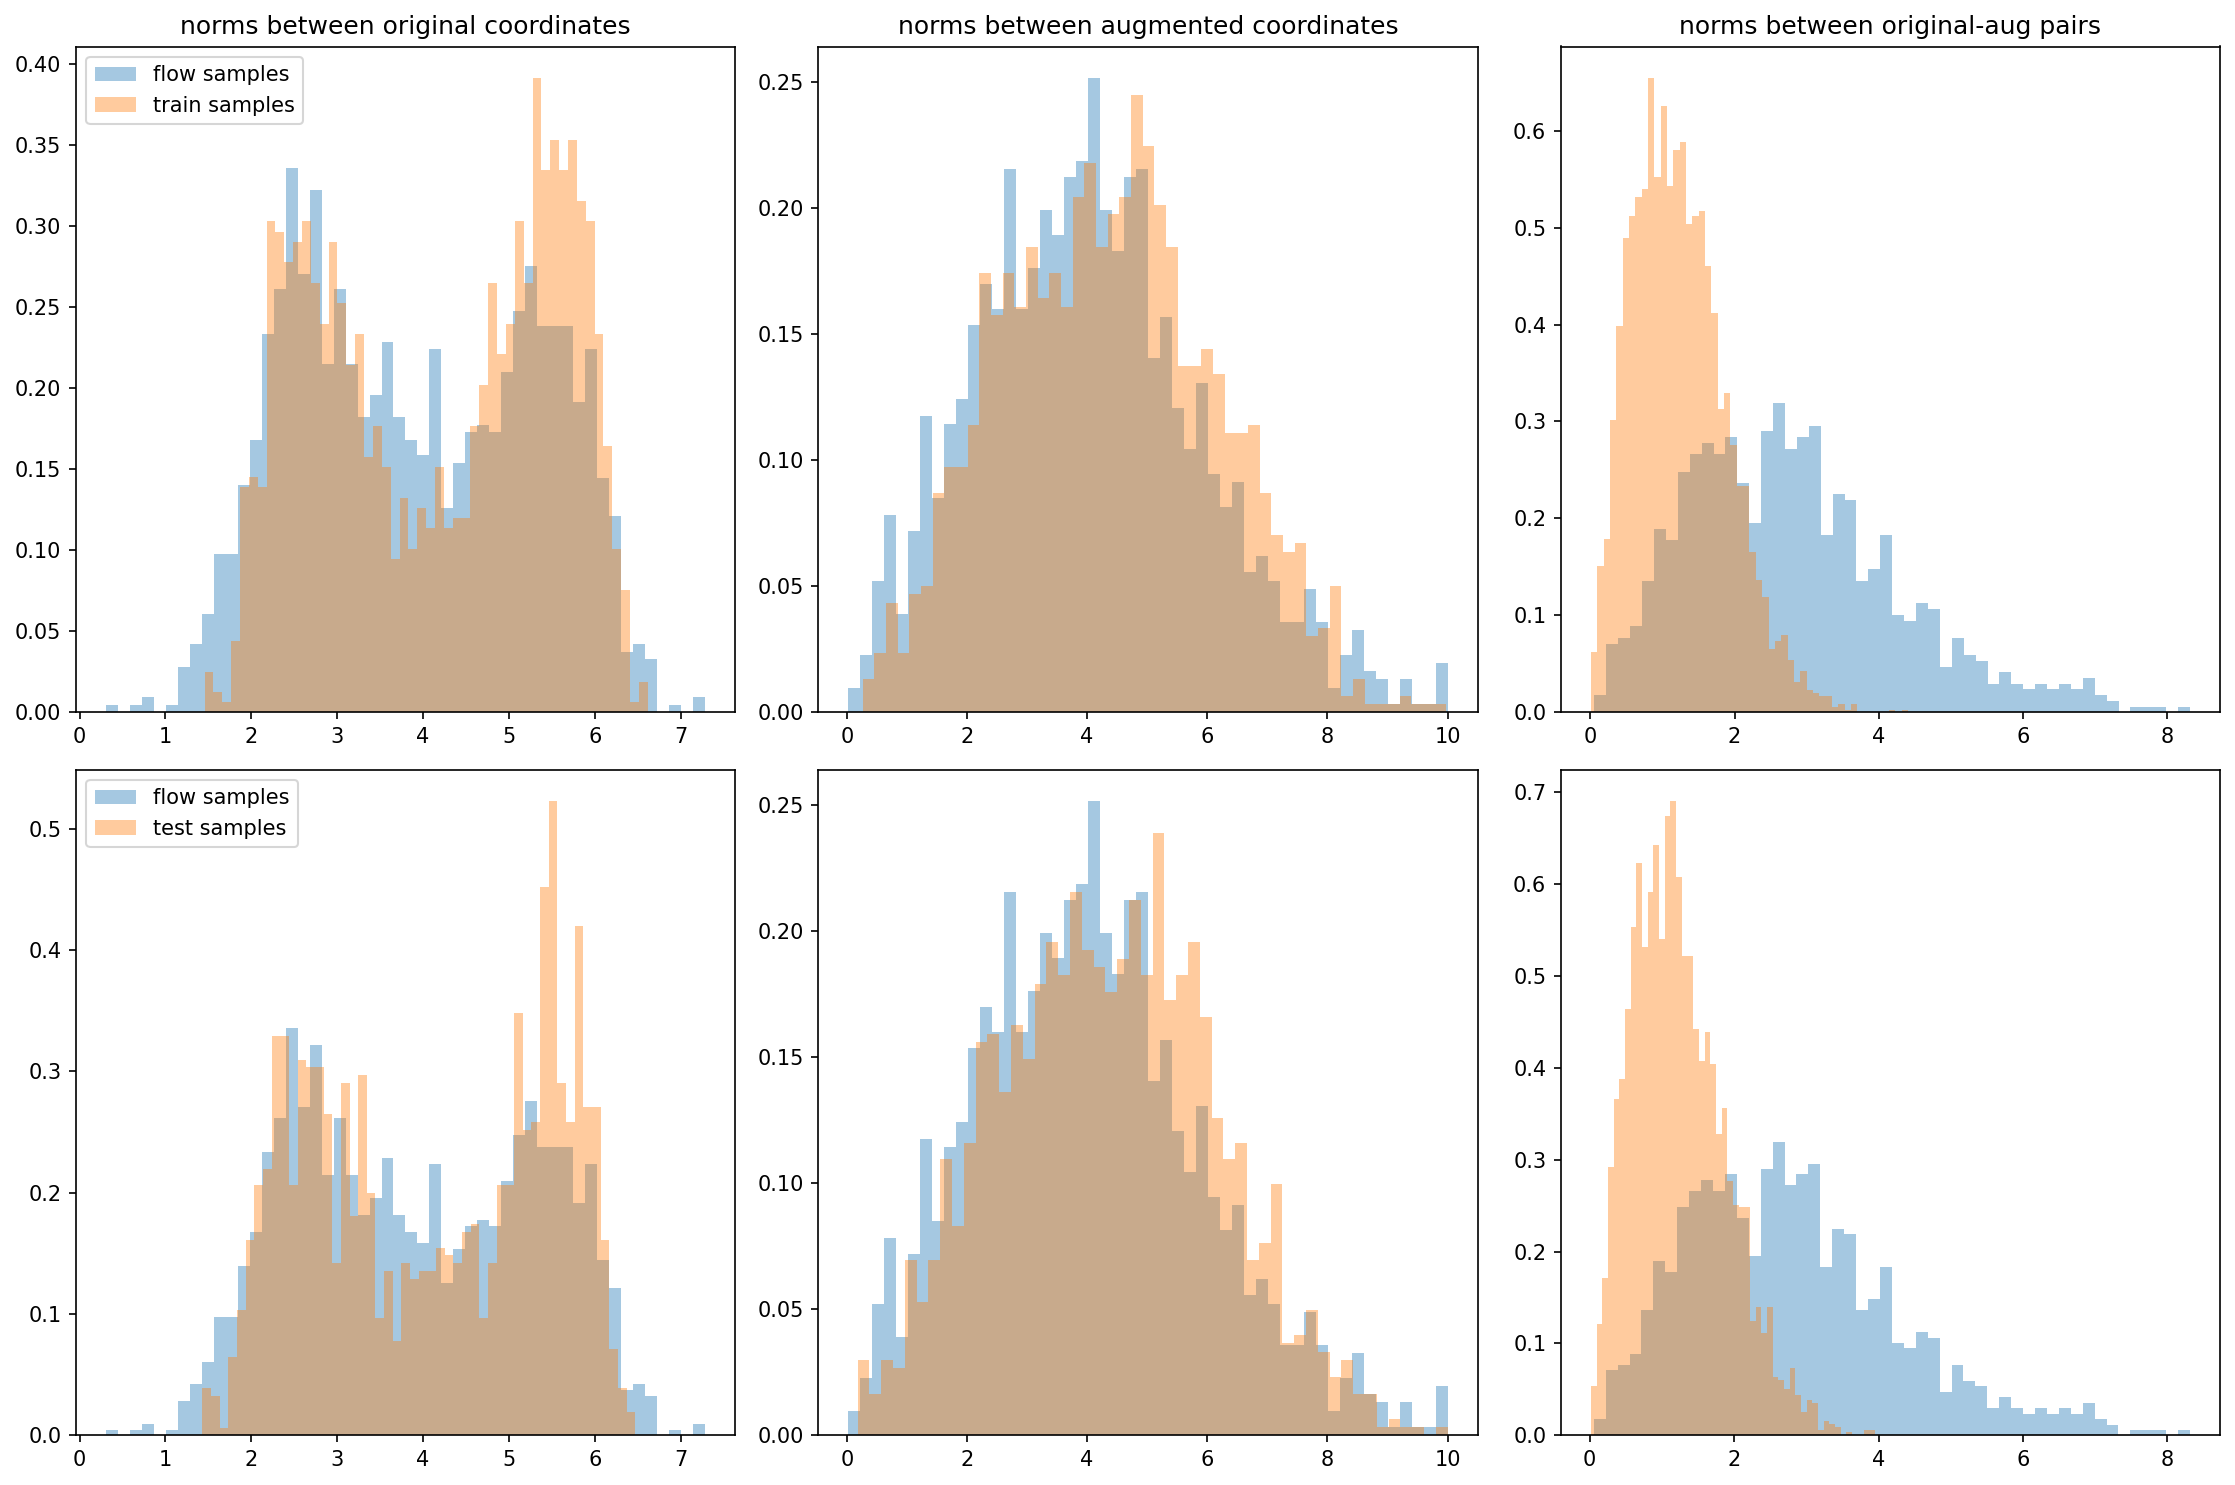

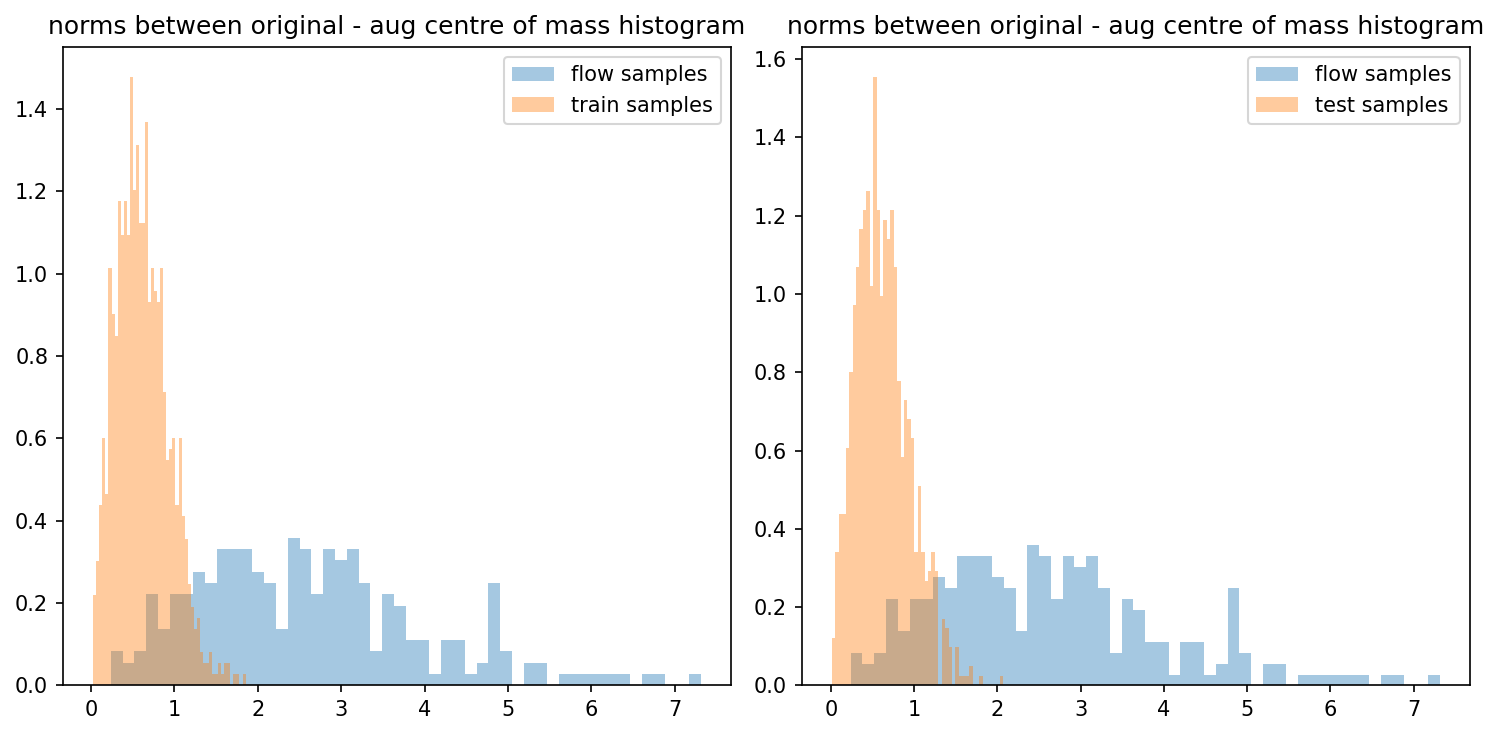

100%|█████████████████████████████████████████| 600/600 [02:01<00:00,  4.96it/s]


{'eval_log_lik': Array(-22.6347, dtype=float32), 'eval_marginal_log_lik': Array(-9.08741, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.0001482, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.7511598e-05, dtype=float32), 'mean_aug_orig_norm': Array(2.6679, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.522577, dtype=float32)}


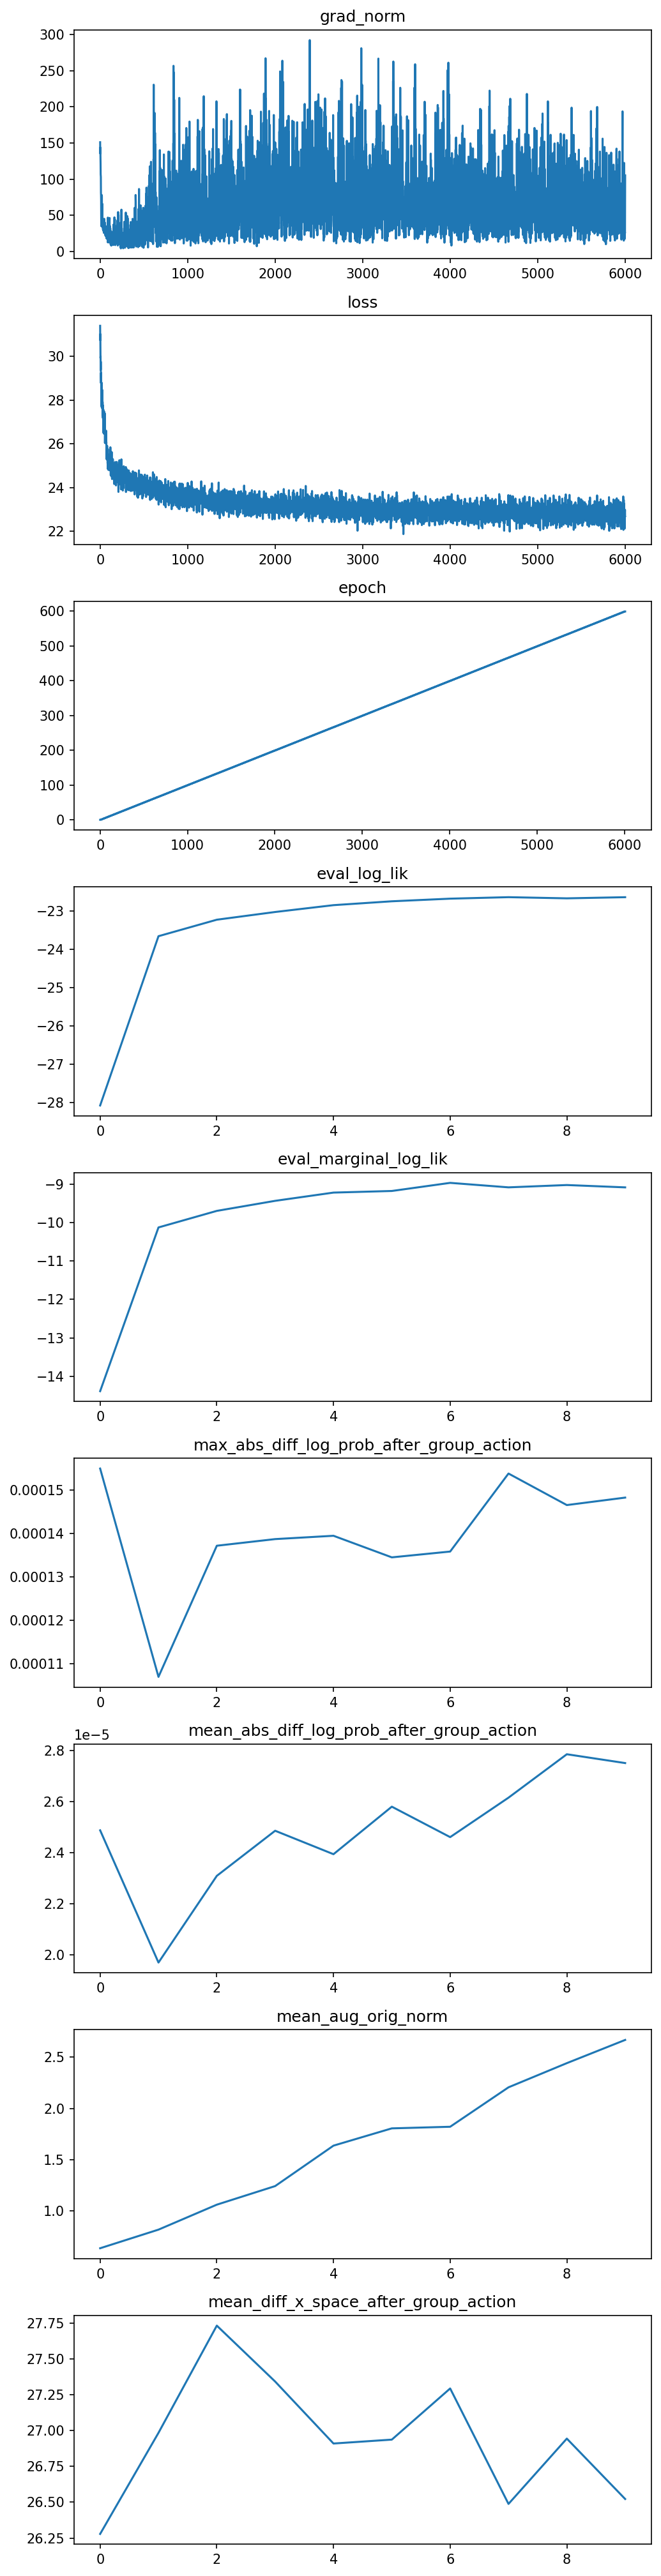

In [14]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)
logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

[<Figure size 2250x1500 with 6 Axes>, <Figure size 1500x750 with 2 Axes>]

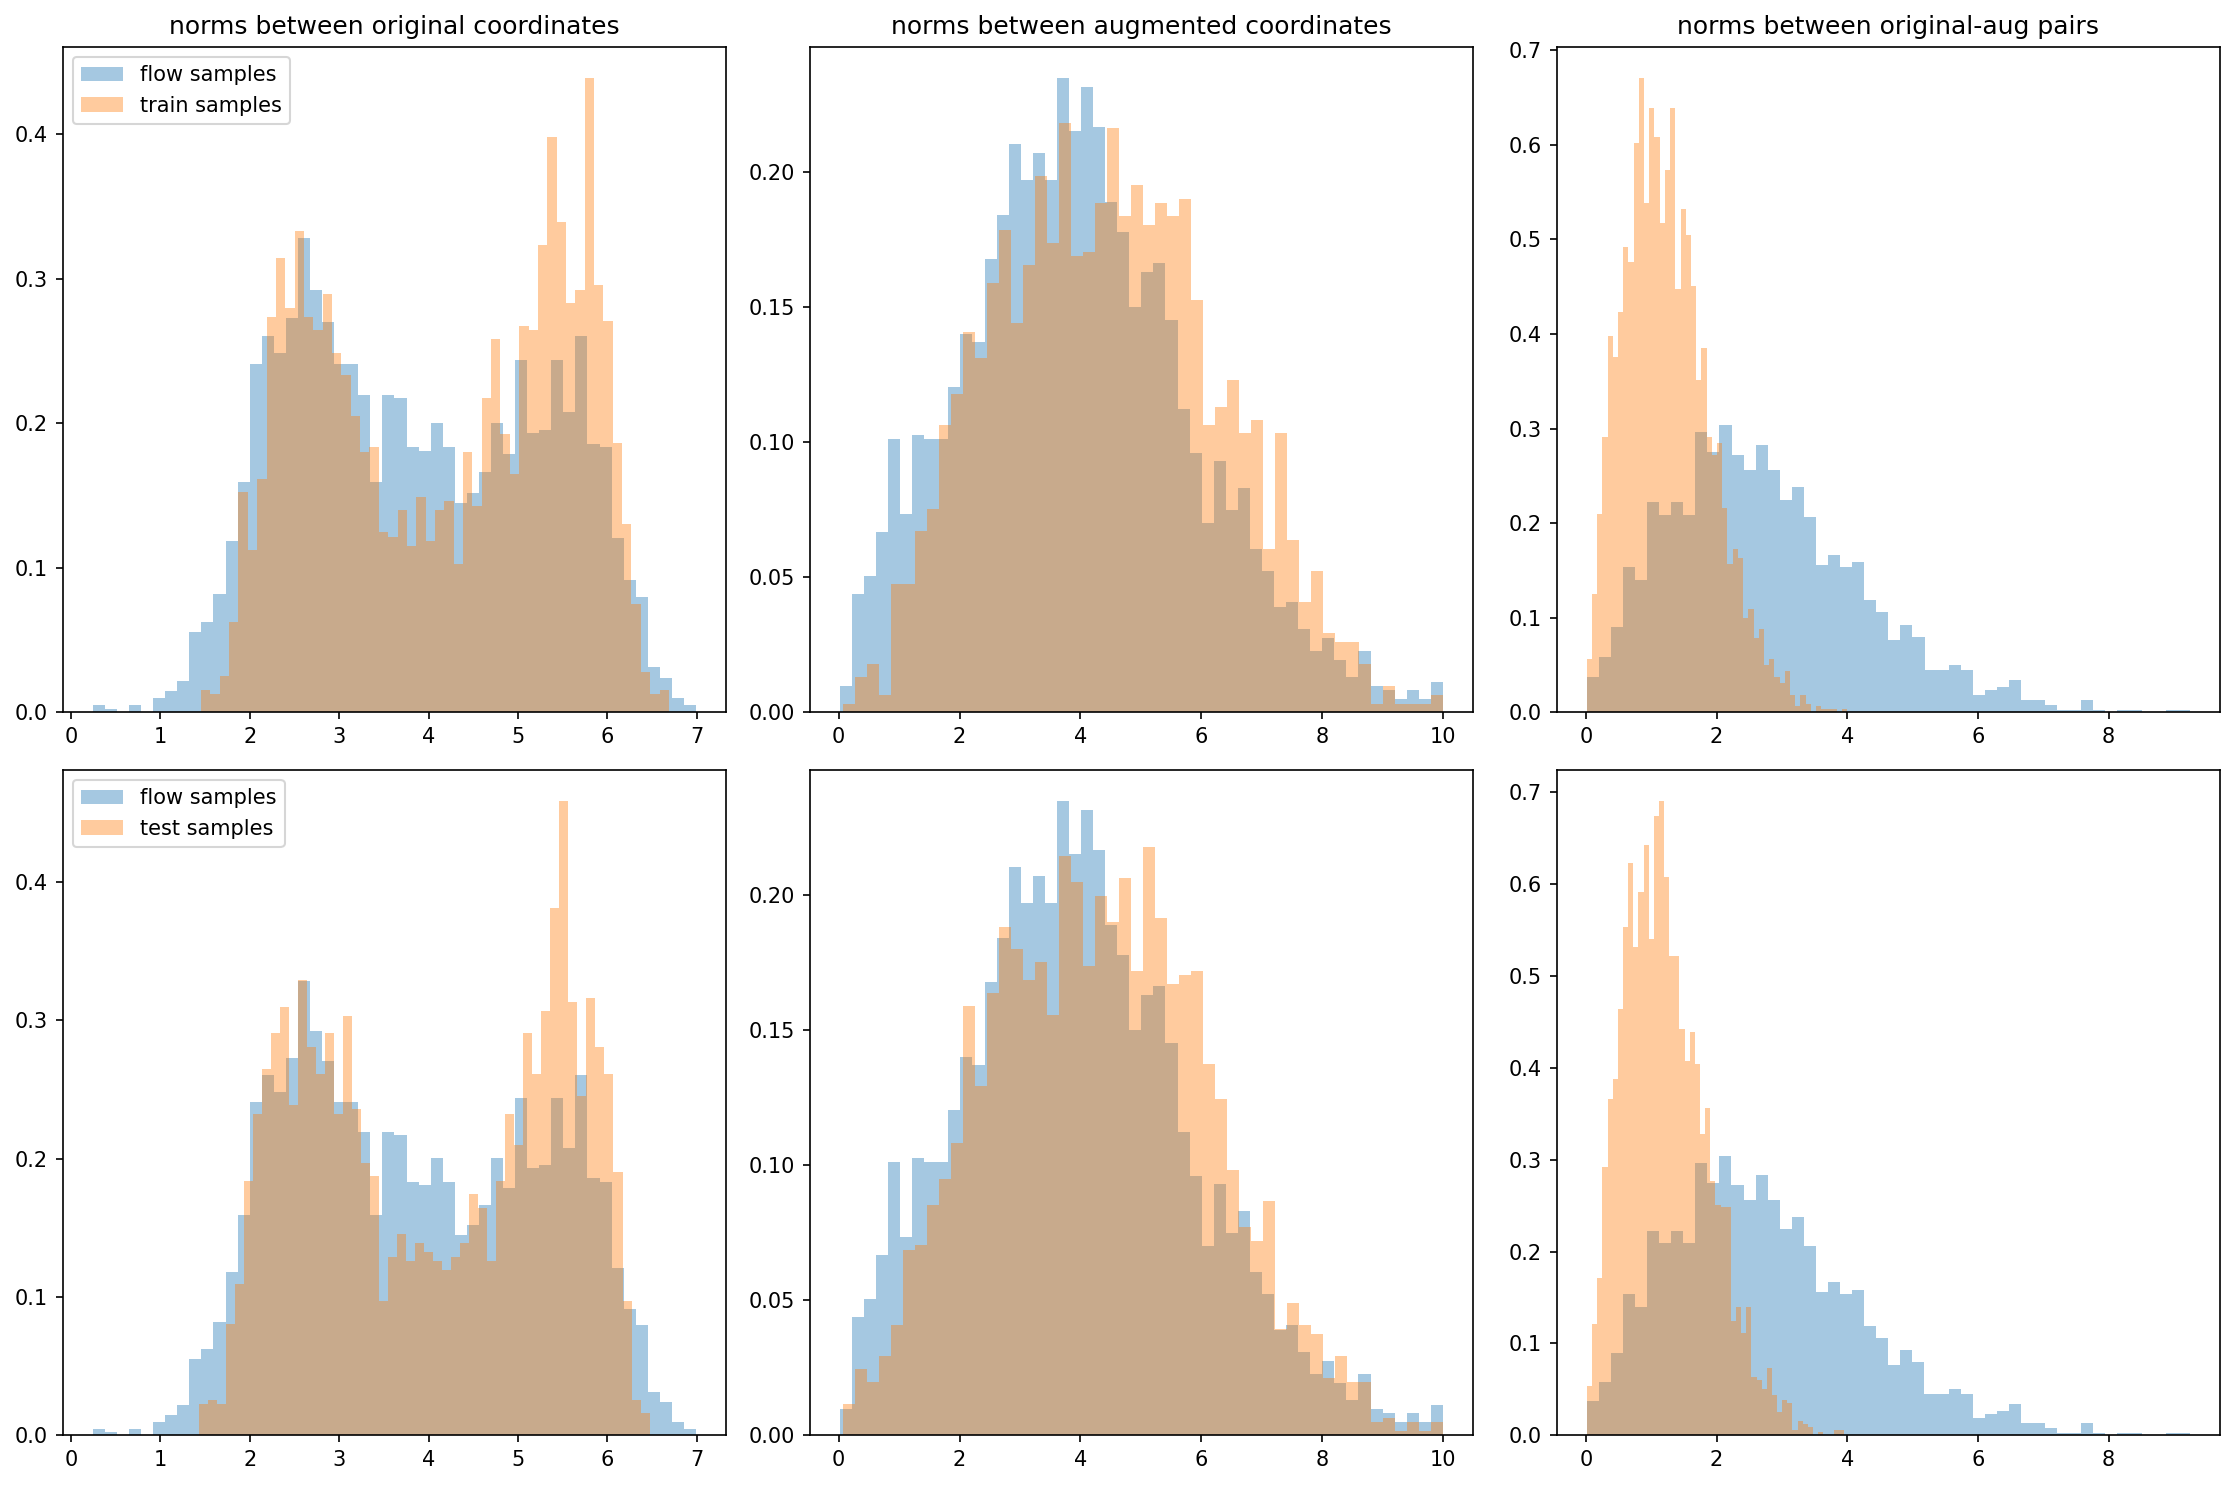

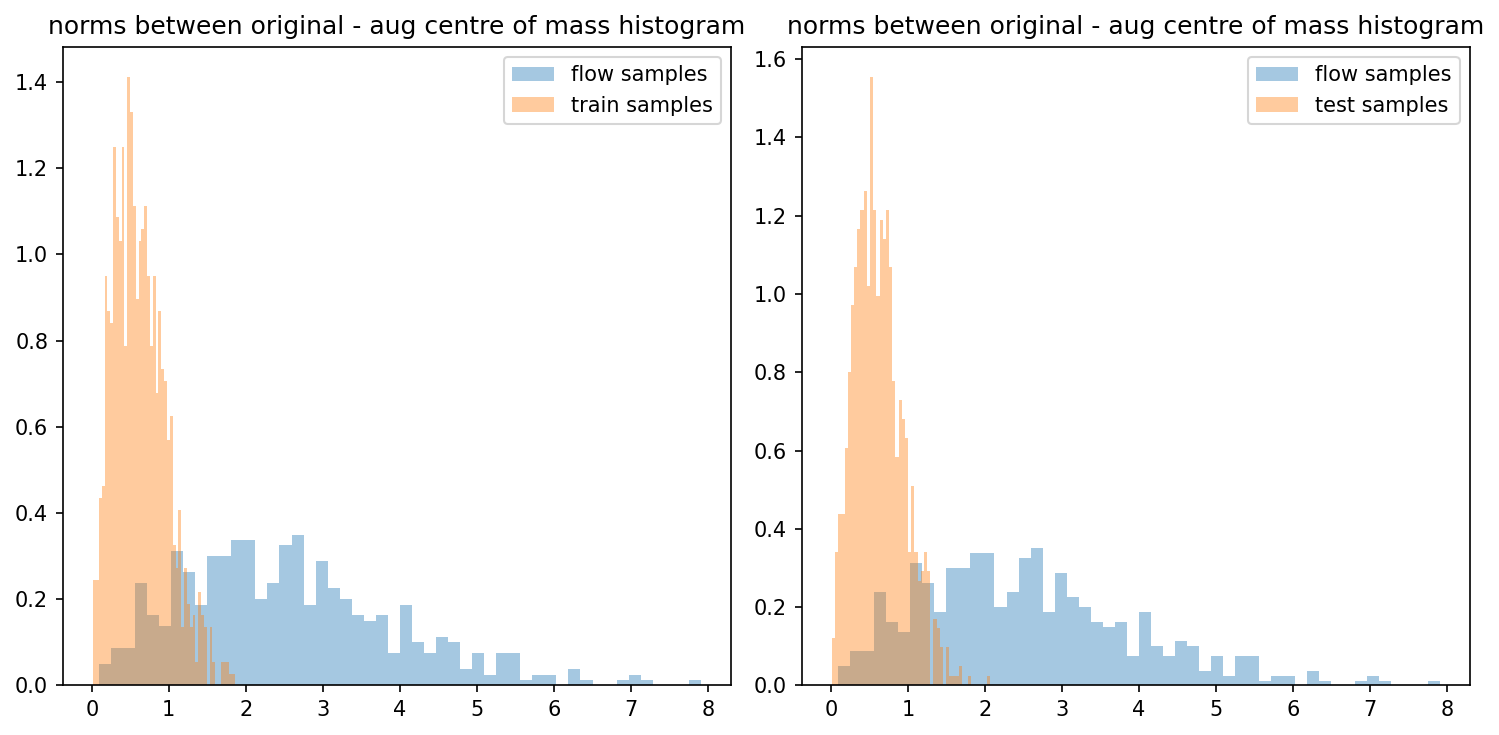

In [15]:
plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [16]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

{'ess': Array(0.01306099, dtype=float32),
 'eval_kl': Array(-996.50934, dtype=float32),
 'eval_log_lik': Array(-22.6347, dtype=float32),
 'eval_marginal_log_lik': Array(-8.543016, dtype=float32),
 'max_abs_diff_log_prob_after_group_action': Array(0.00015354, dtype=float32),
 'mean_abs_diff_log_prob_after_group_action': Array(2.8261185e-05, dtype=float32),
 'mean_aug_orig_norm': Array(2.6350775, dtype=float32),
 'mean_diff_x_space_after_group_action': Array(26.574081, dtype=float32)}

# Proj flow

In [9]:
cfg.flow.type= "proj"
cfg.flow.act_norm = False

creating flow of type proj
training data shape of (1000, 4, 2)


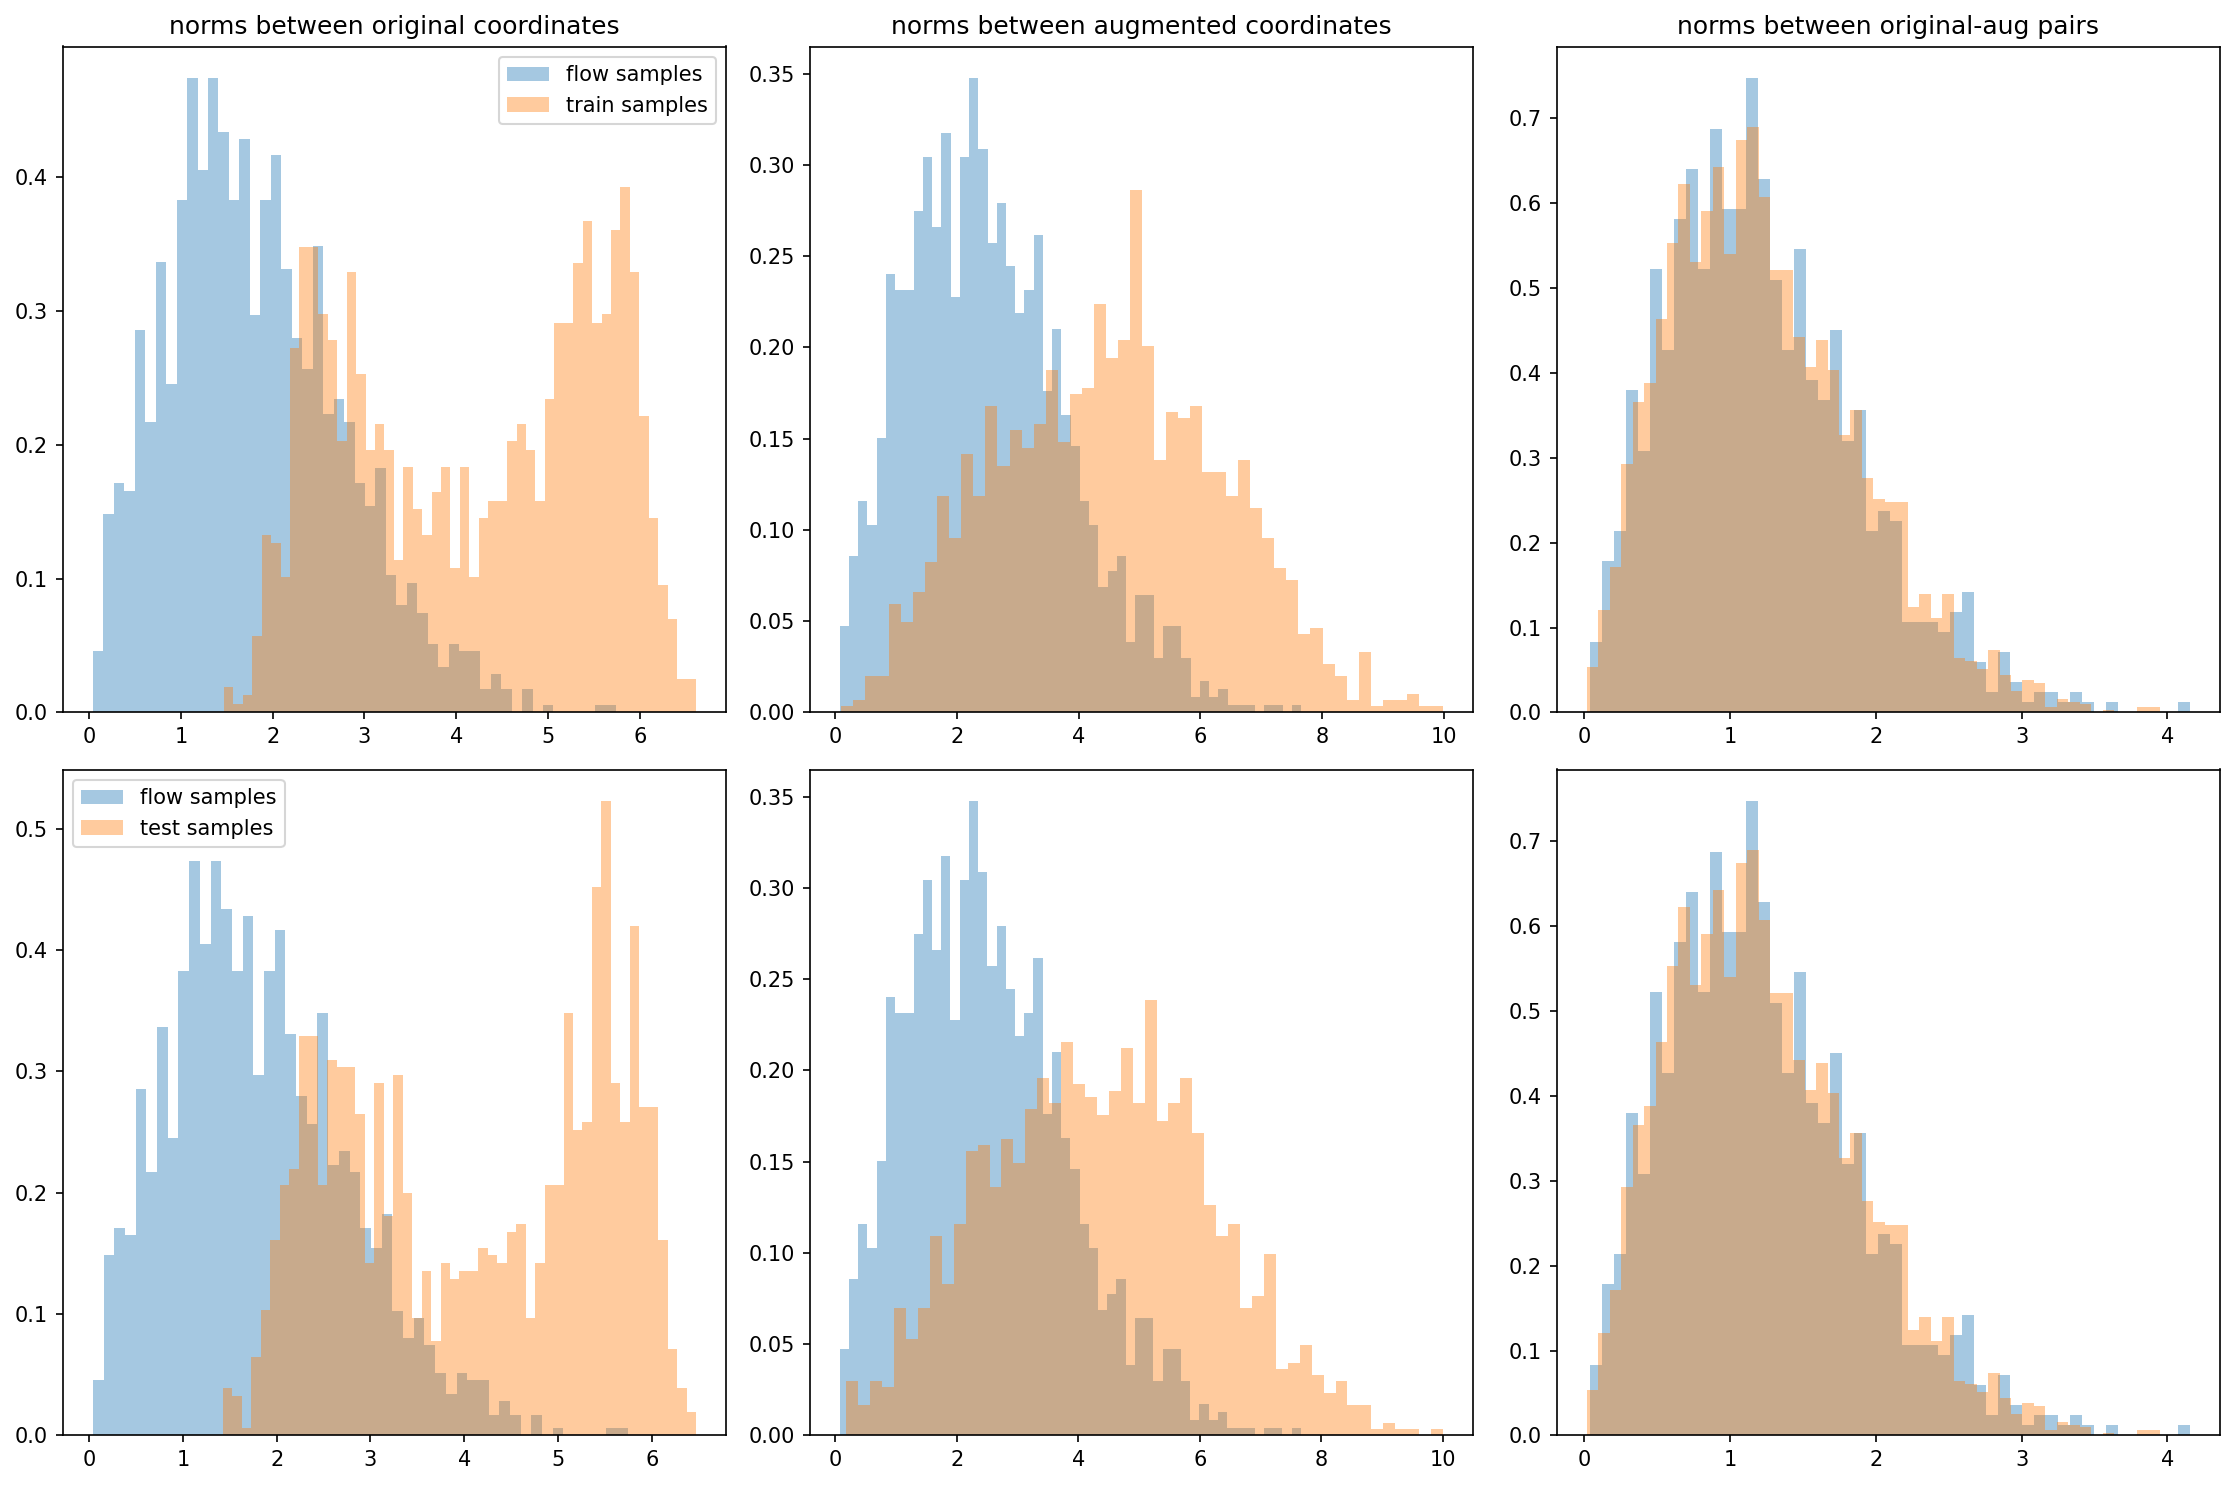

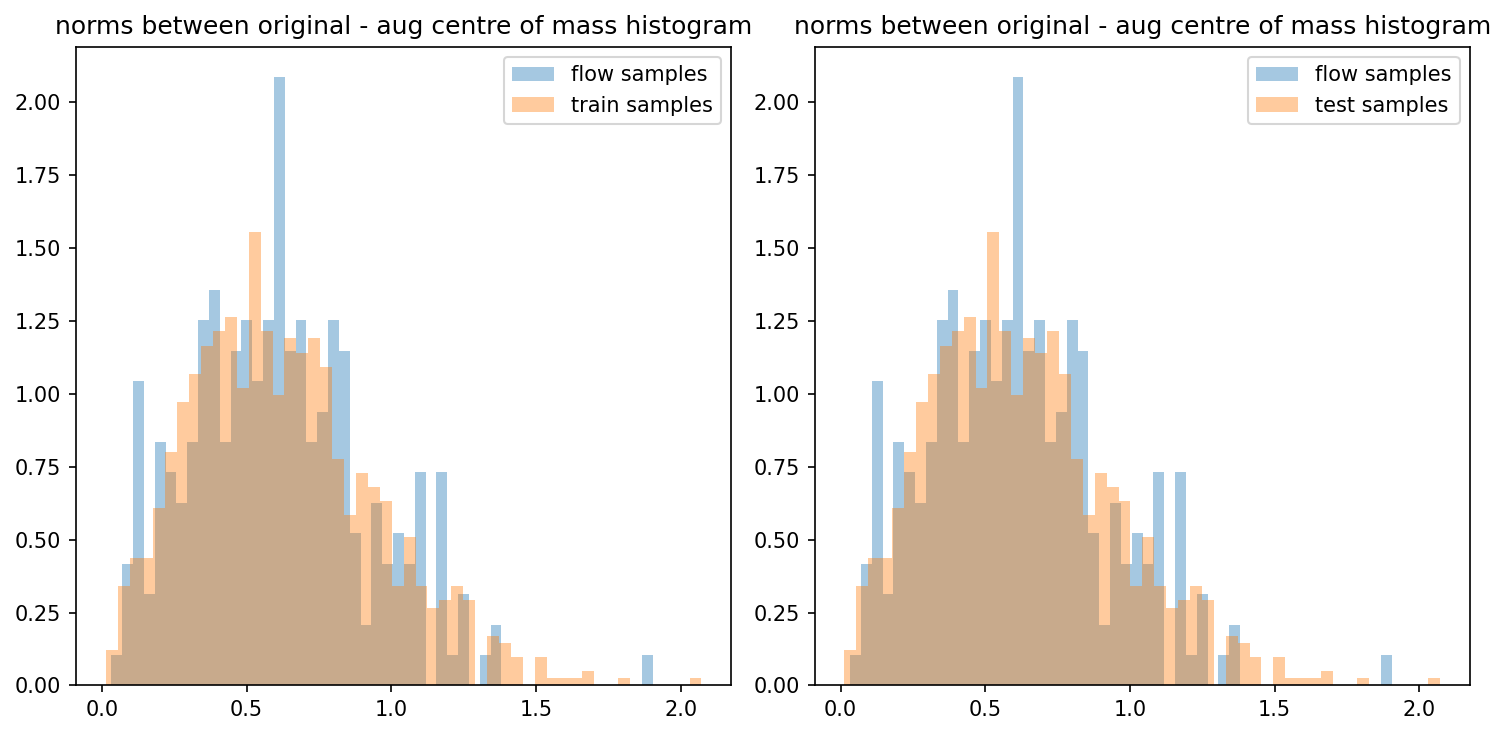

  0%|                                                   | 0/100 [00:00<?, ?it/s]

non numeric history values being saved


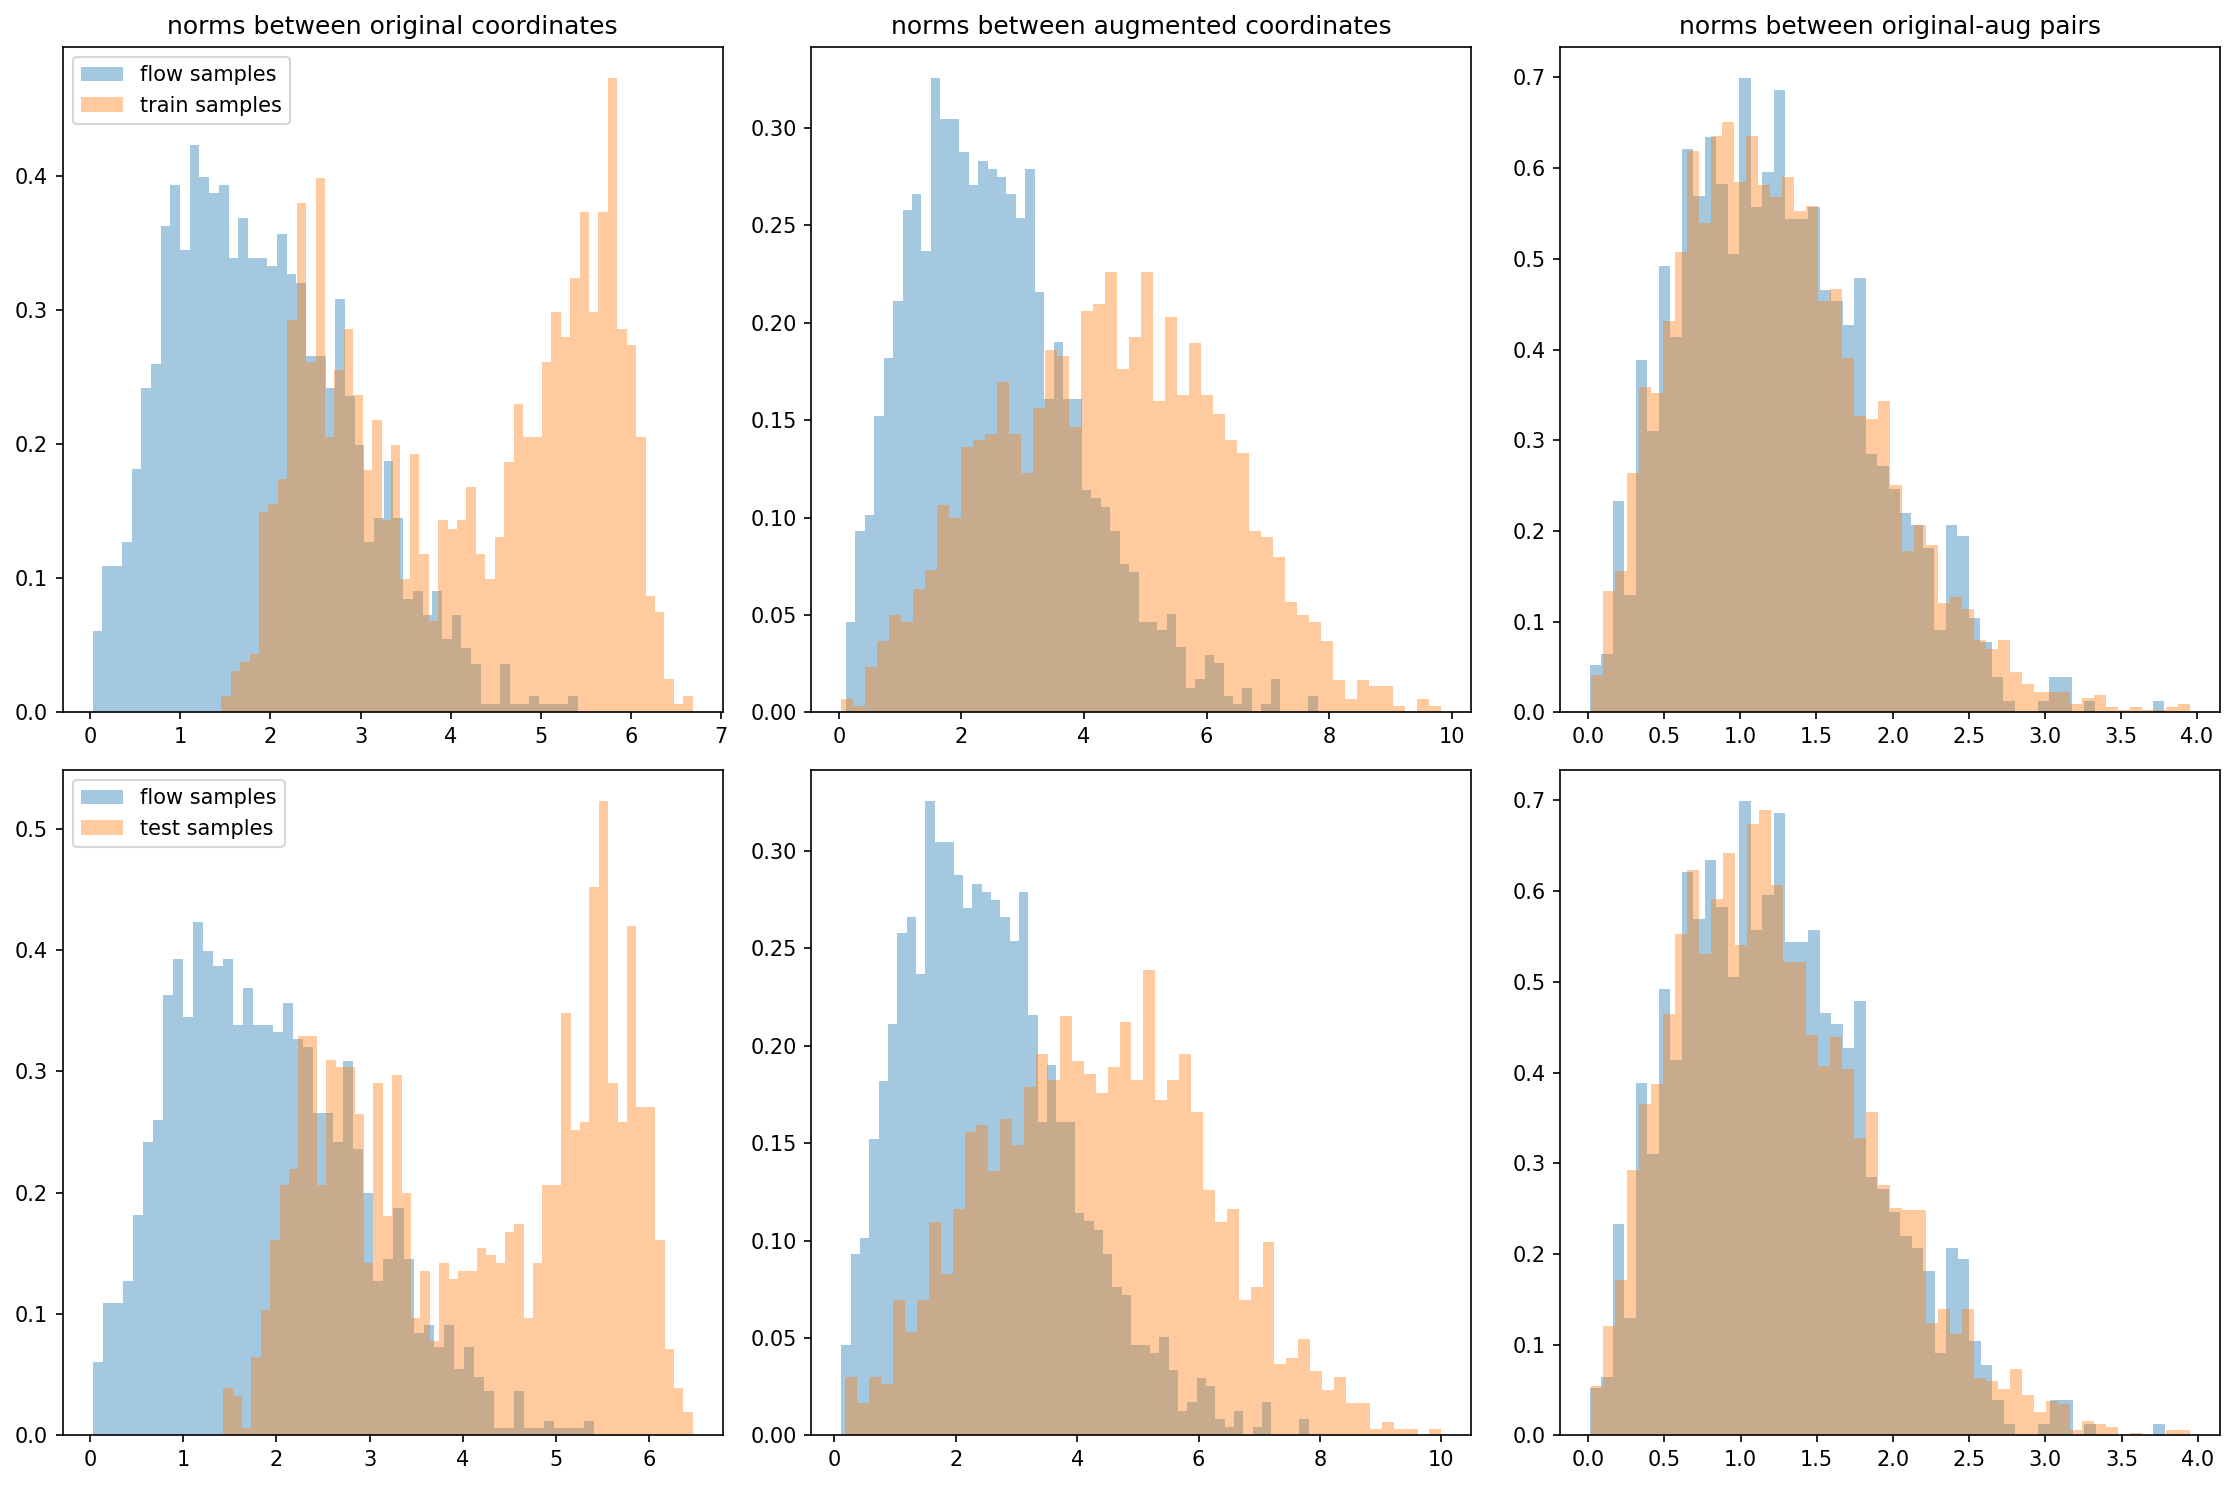

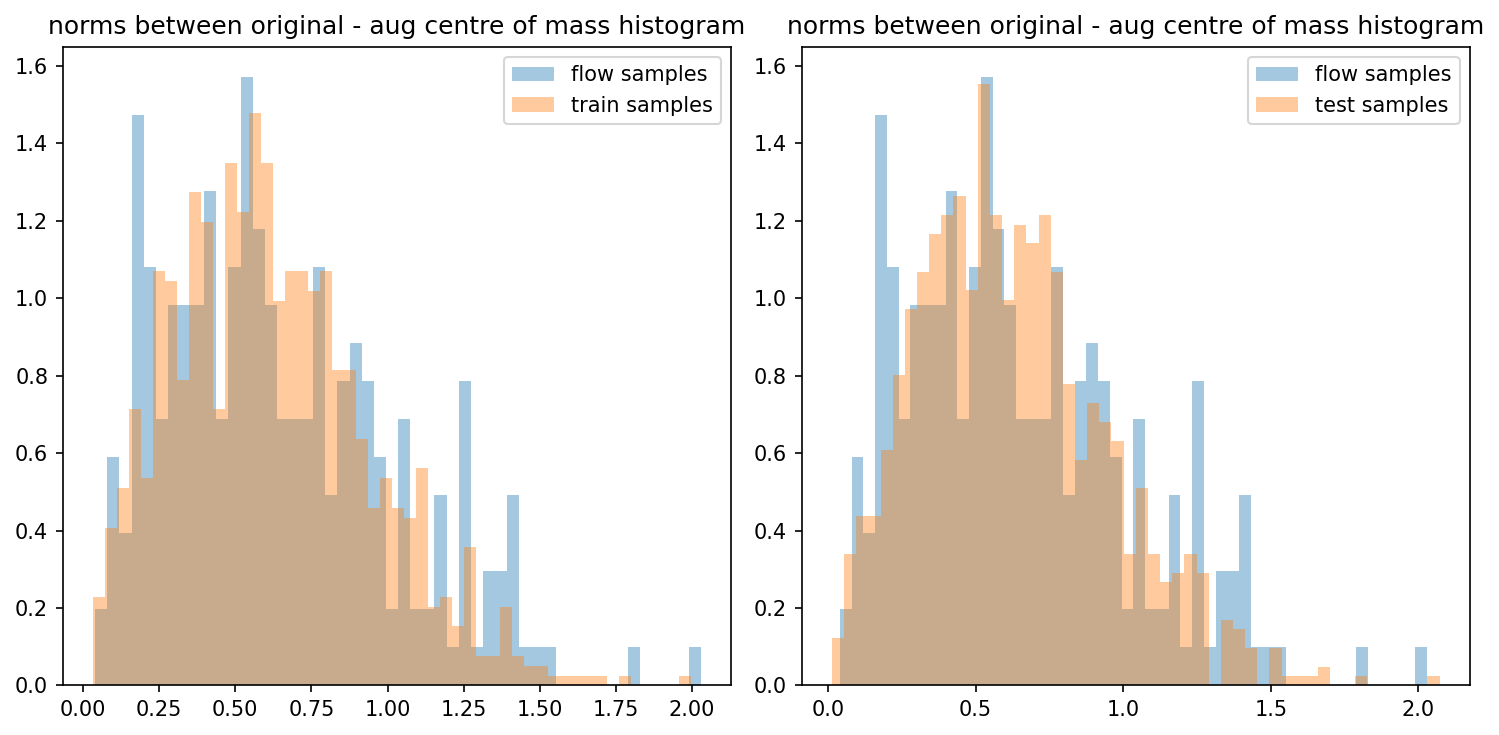

  1%|▍                                          | 1/100 [00:36<59:30, 36.06s/it]

{'eval_log_lik': Array(-29.61037, dtype=float32), 'eval_marginal_log_lik': Array(-15.918948, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00068741, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.4374005e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.6376844, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.2787, dtype=float32)}


 13%|█████▍                                    | 13/100 [00:38<00:31,  2.73it/s]

{'eval_log_lik': Array(-23.956375, dtype=float32), 'eval_marginal_log_lik': Array(-10.360106, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00143604, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00010728, dtype=float32), 'mean_aug_orig_norm': Array(1.1680202, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.626104, dtype=float32)}


 19%|███████▉                                  | 19/100 [00:39<00:17,  4.59it/s]

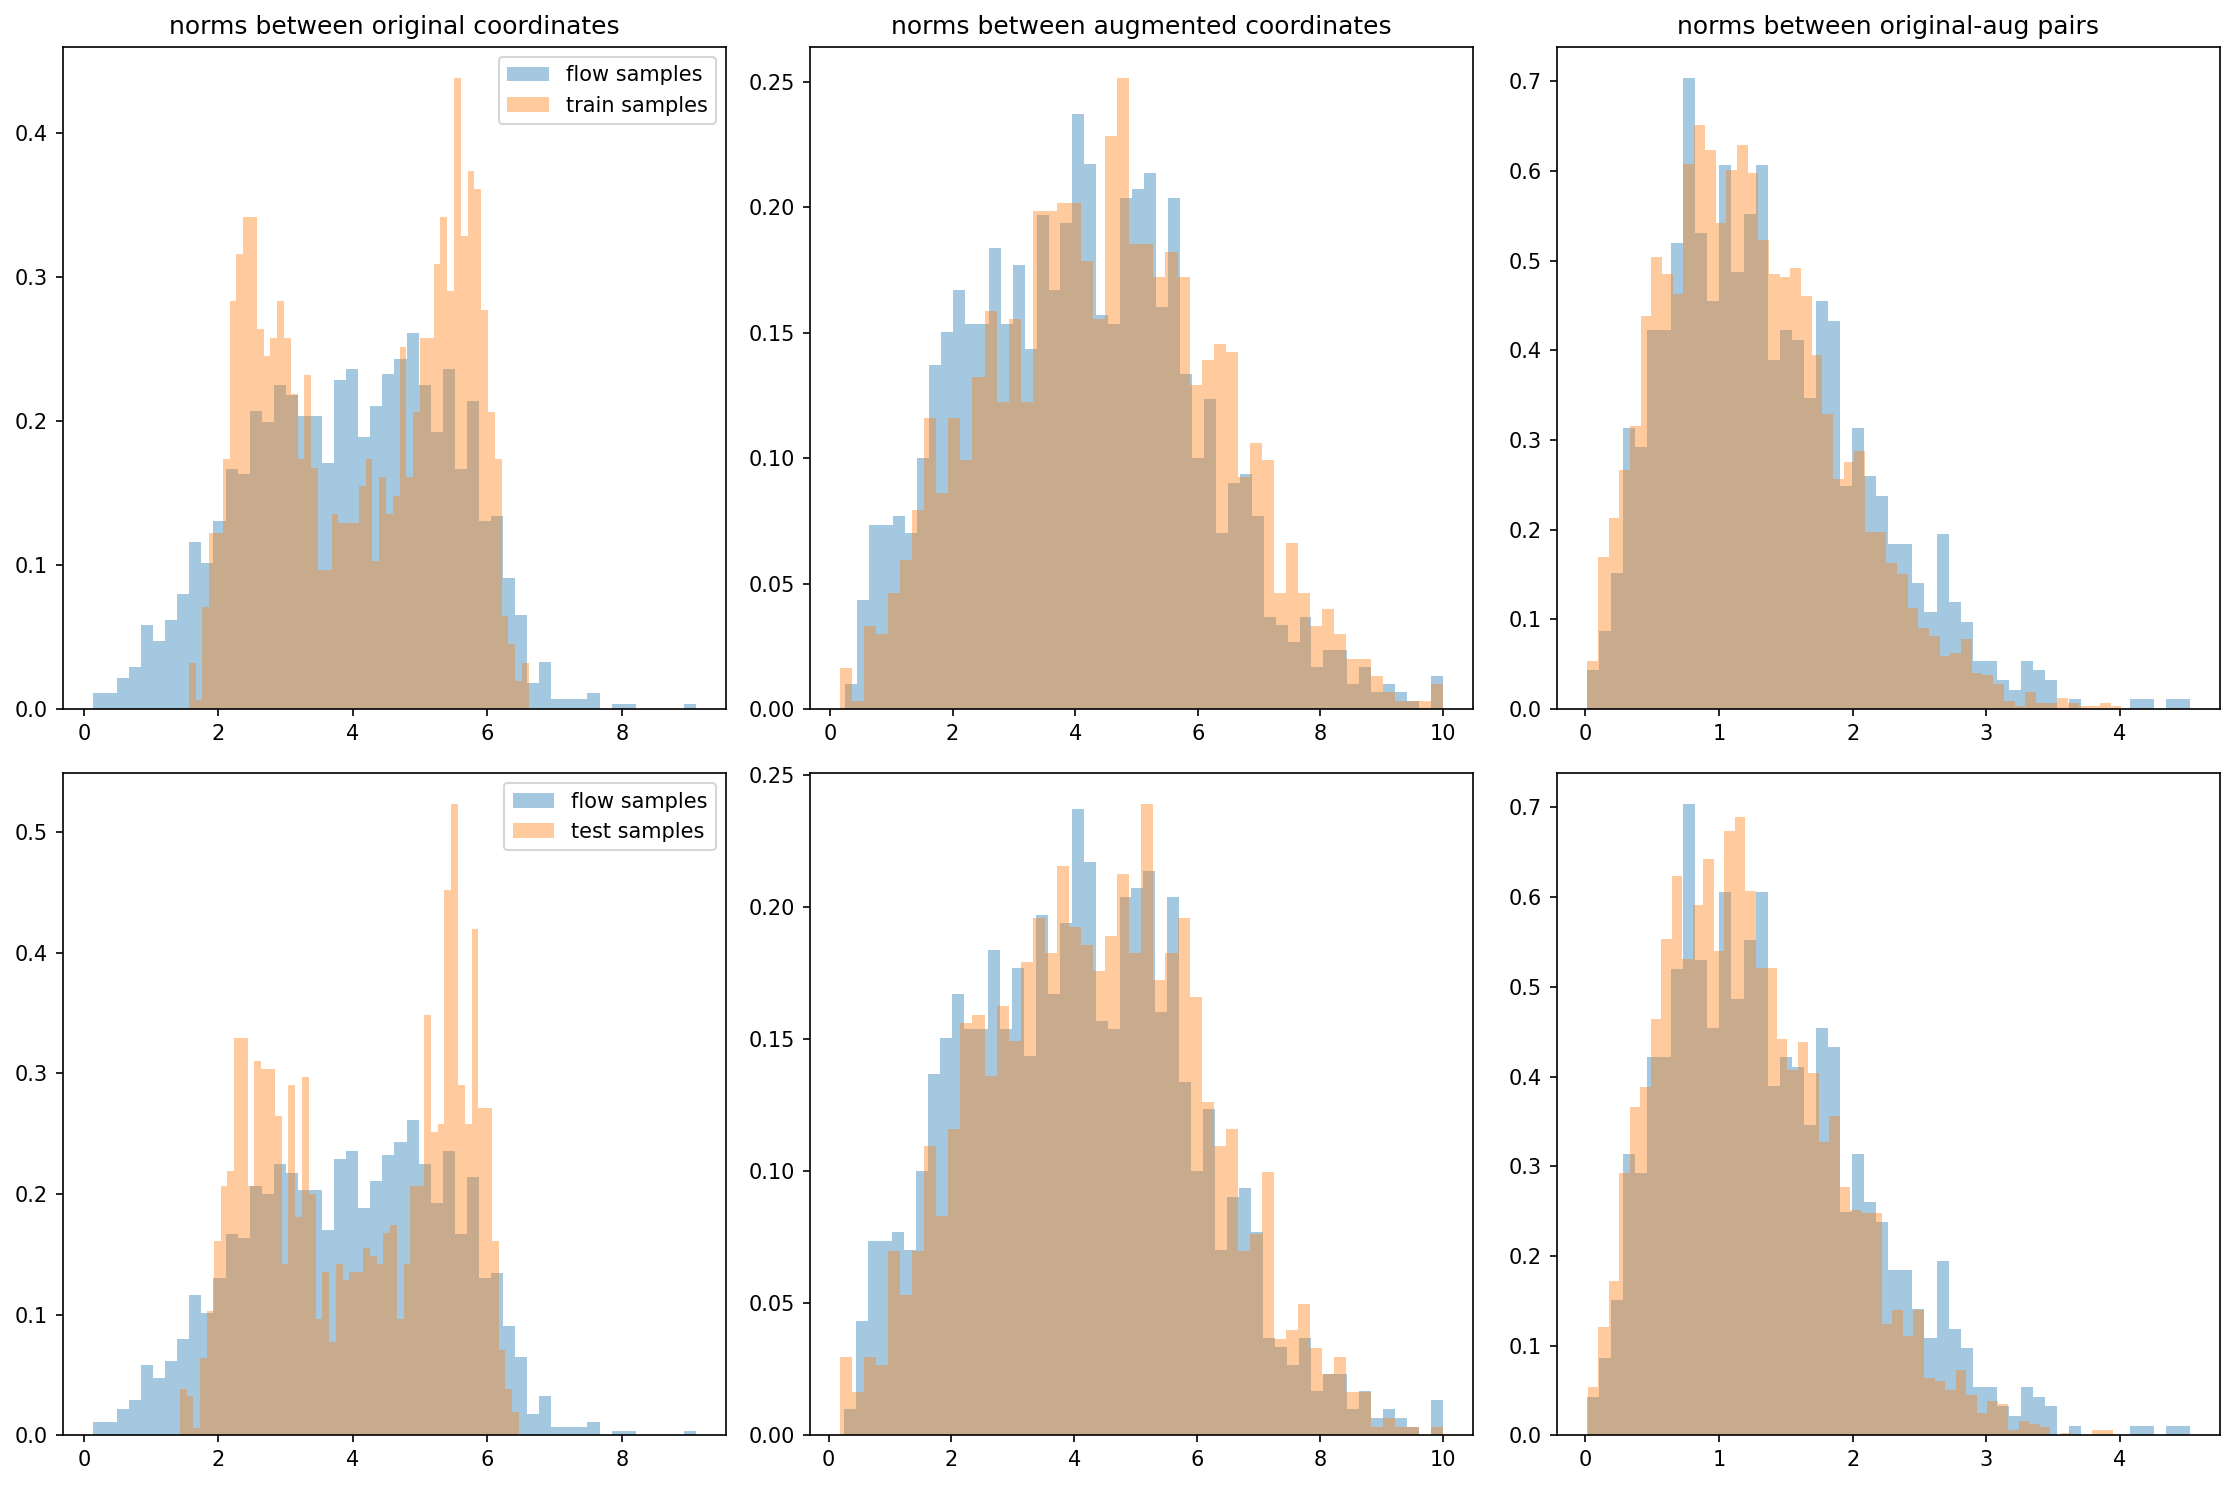

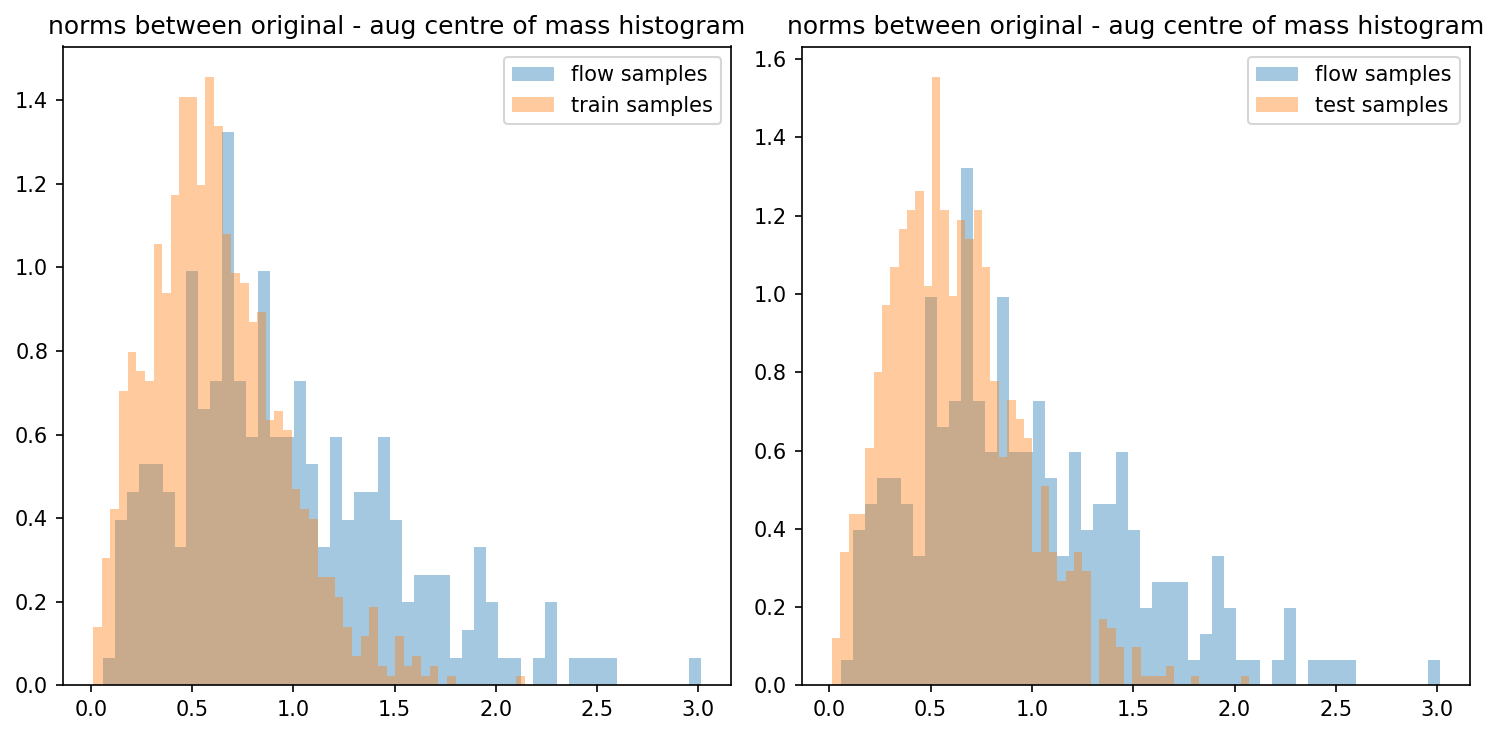

 24%|██████████                                | 24/100 [00:44<00:36,  2.07it/s]

{'eval_log_lik': Array(-23.616808, dtype=float32), 'eval_marginal_log_lik': Array(-10.042968, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00177746, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00012539, dtype=float32), 'mean_aug_orig_norm': Array(1.0200305, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.112717, dtype=float32)}


 35%|██████████████▋                           | 35/100 [00:46<00:14,  4.64it/s]

{'eval_log_lik': Array(-23.339455, dtype=float32), 'eval_marginal_log_lik': Array(-9.702255, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00137672, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00010346, dtype=float32), 'mean_aug_orig_norm': Array(1.0738544, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.818815, dtype=float32)}


 39%|████████████████▍                         | 39/100 [00:47<00:12,  4.98it/s]

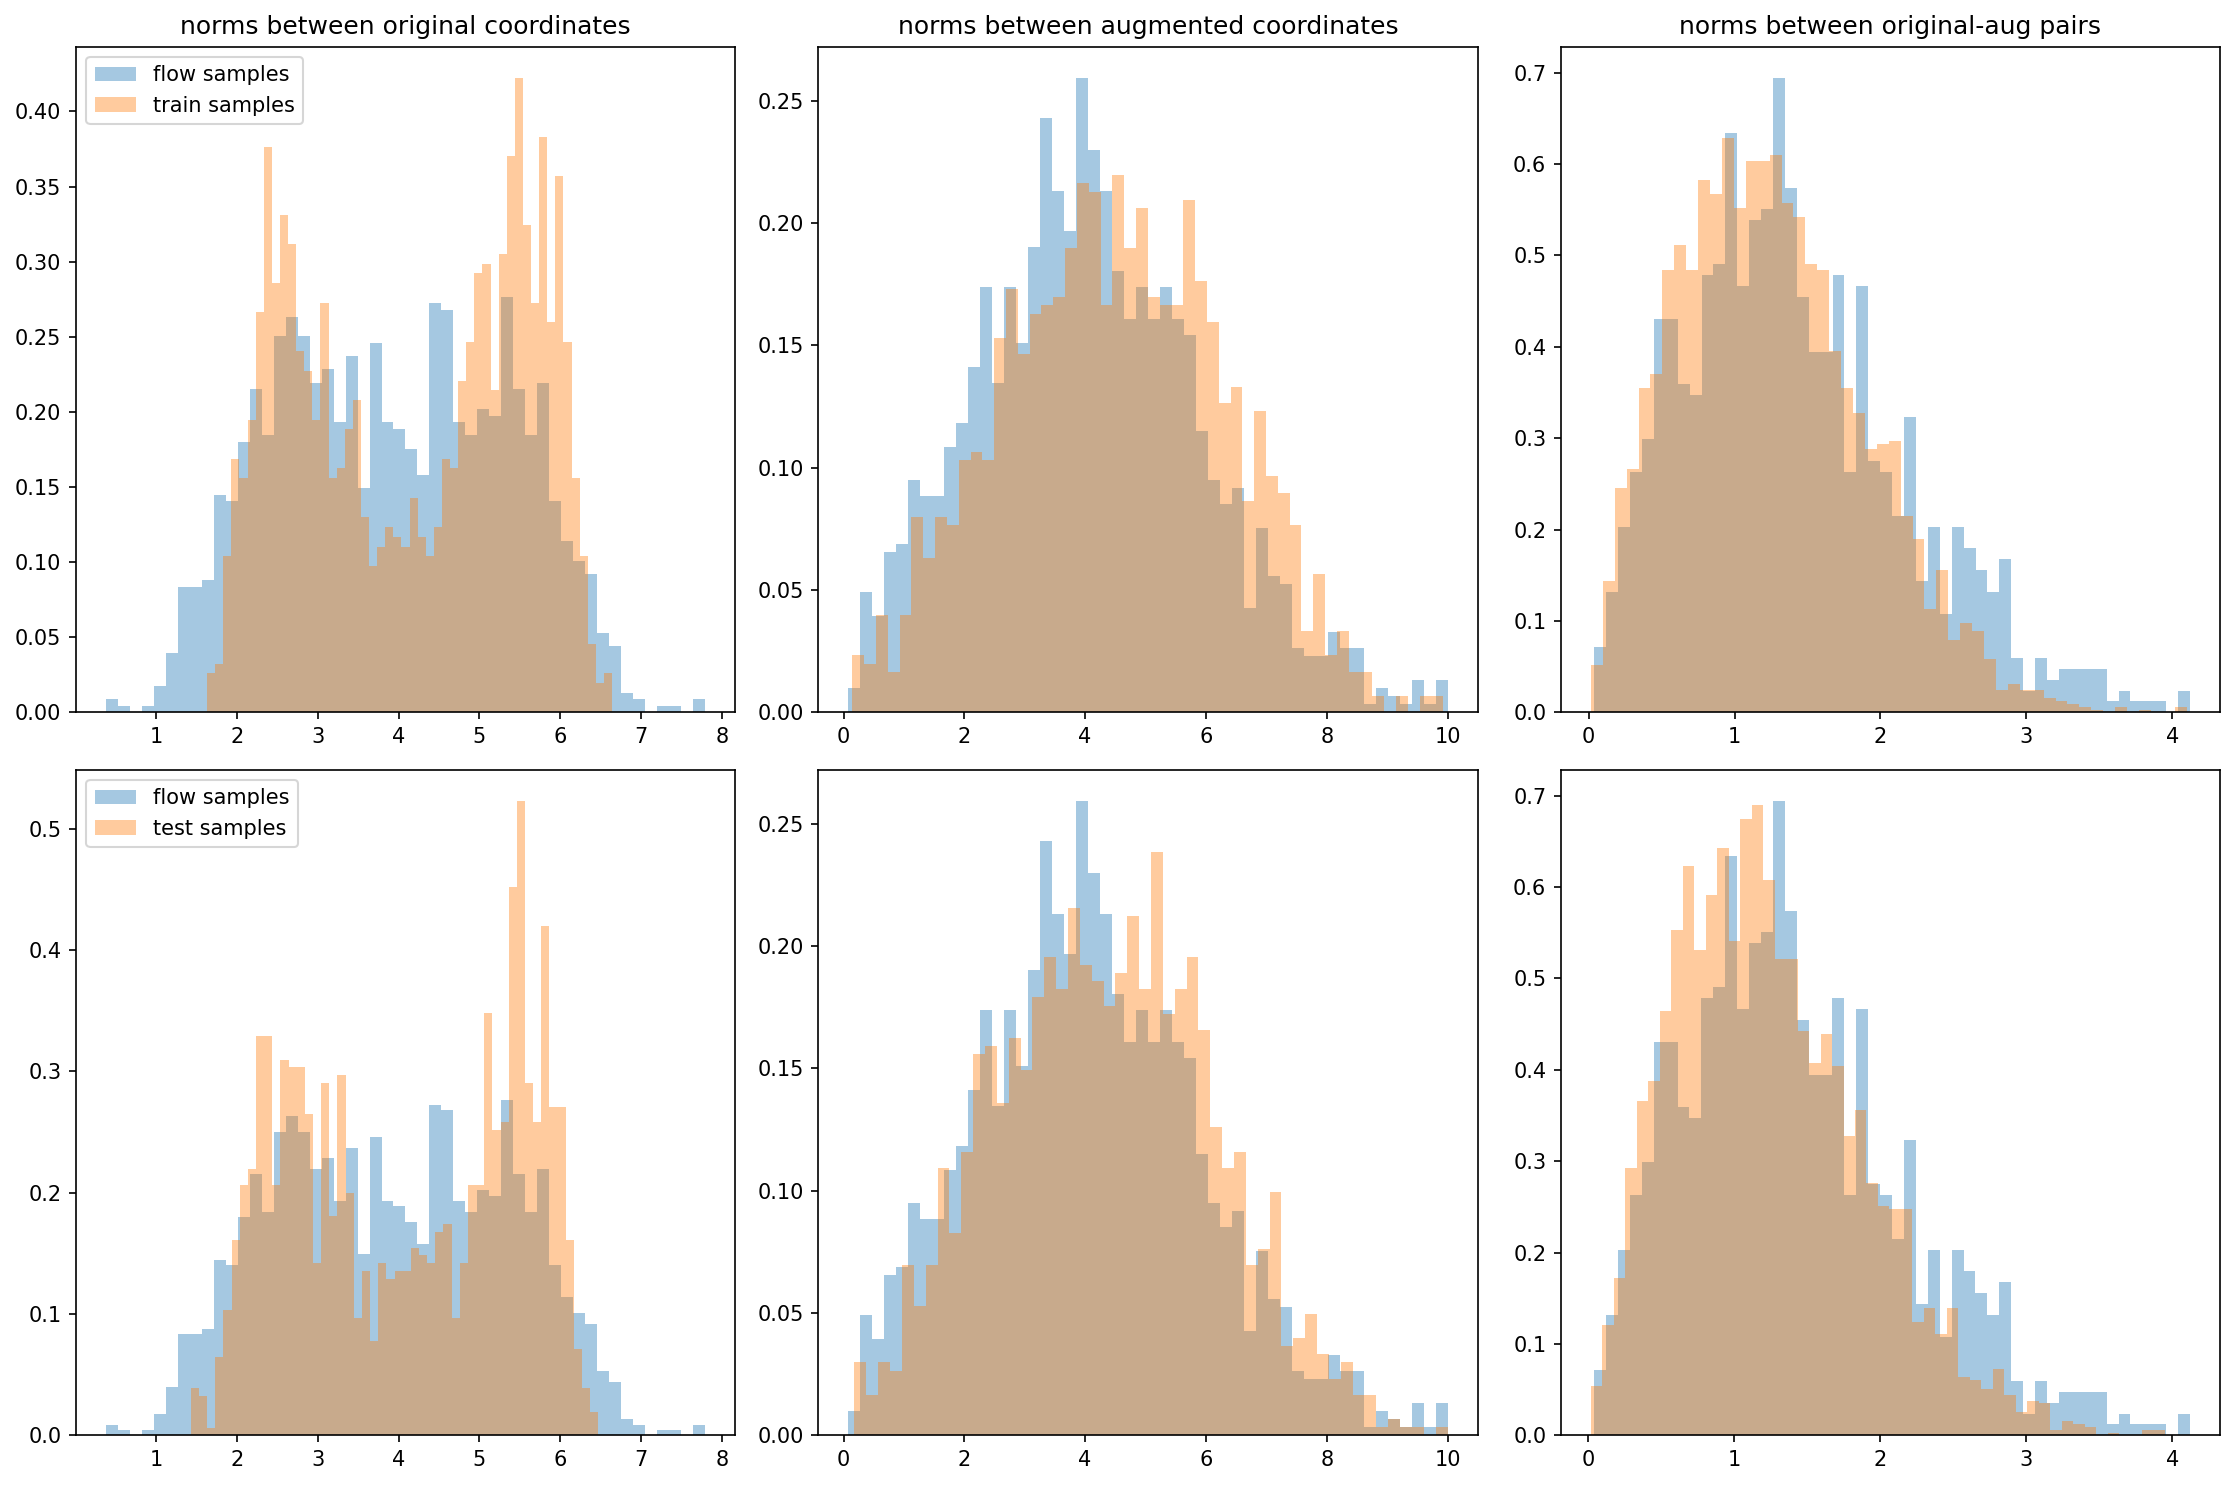

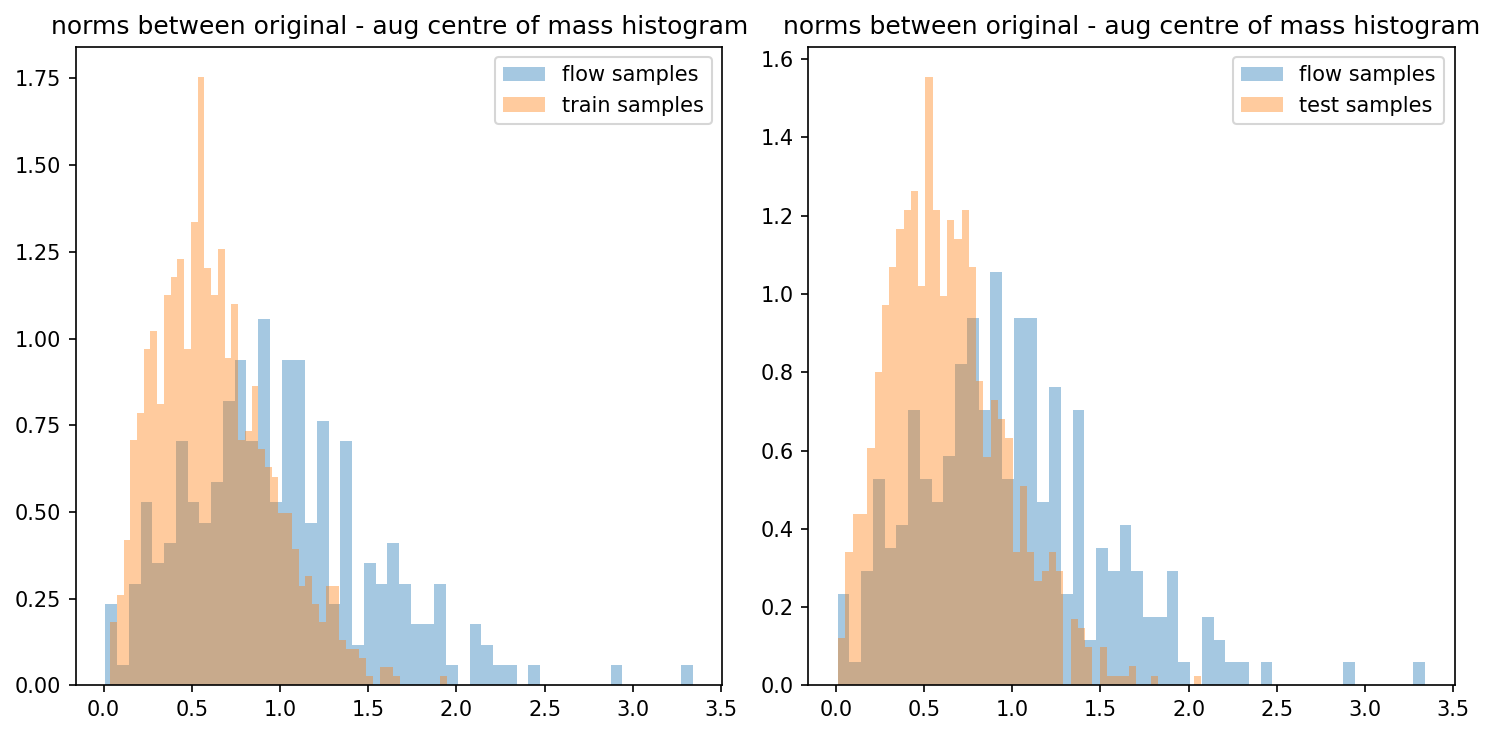

 45%|██████████████████▉                       | 45/100 [00:52<00:23,  2.36it/s]

{'eval_log_lik': Array(-23.963095, dtype=float32), 'eval_marginal_log_lik': Array(-10.283069, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00065117, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(6.357956e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.2125669, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.48973, dtype=float32)}


 57%|███████████████████████▉                  | 57/100 [00:55<00:09,  4.72it/s]

{'eval_log_lik': Array(-23.2541, dtype=float32), 'eval_marginal_log_lik': Array(-9.777464, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.0004549, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(6.195259e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.0669552, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.374754, dtype=float32)}


 59%|████████████████████████▊                 | 59/100 [00:55<00:08,  4.90it/s]

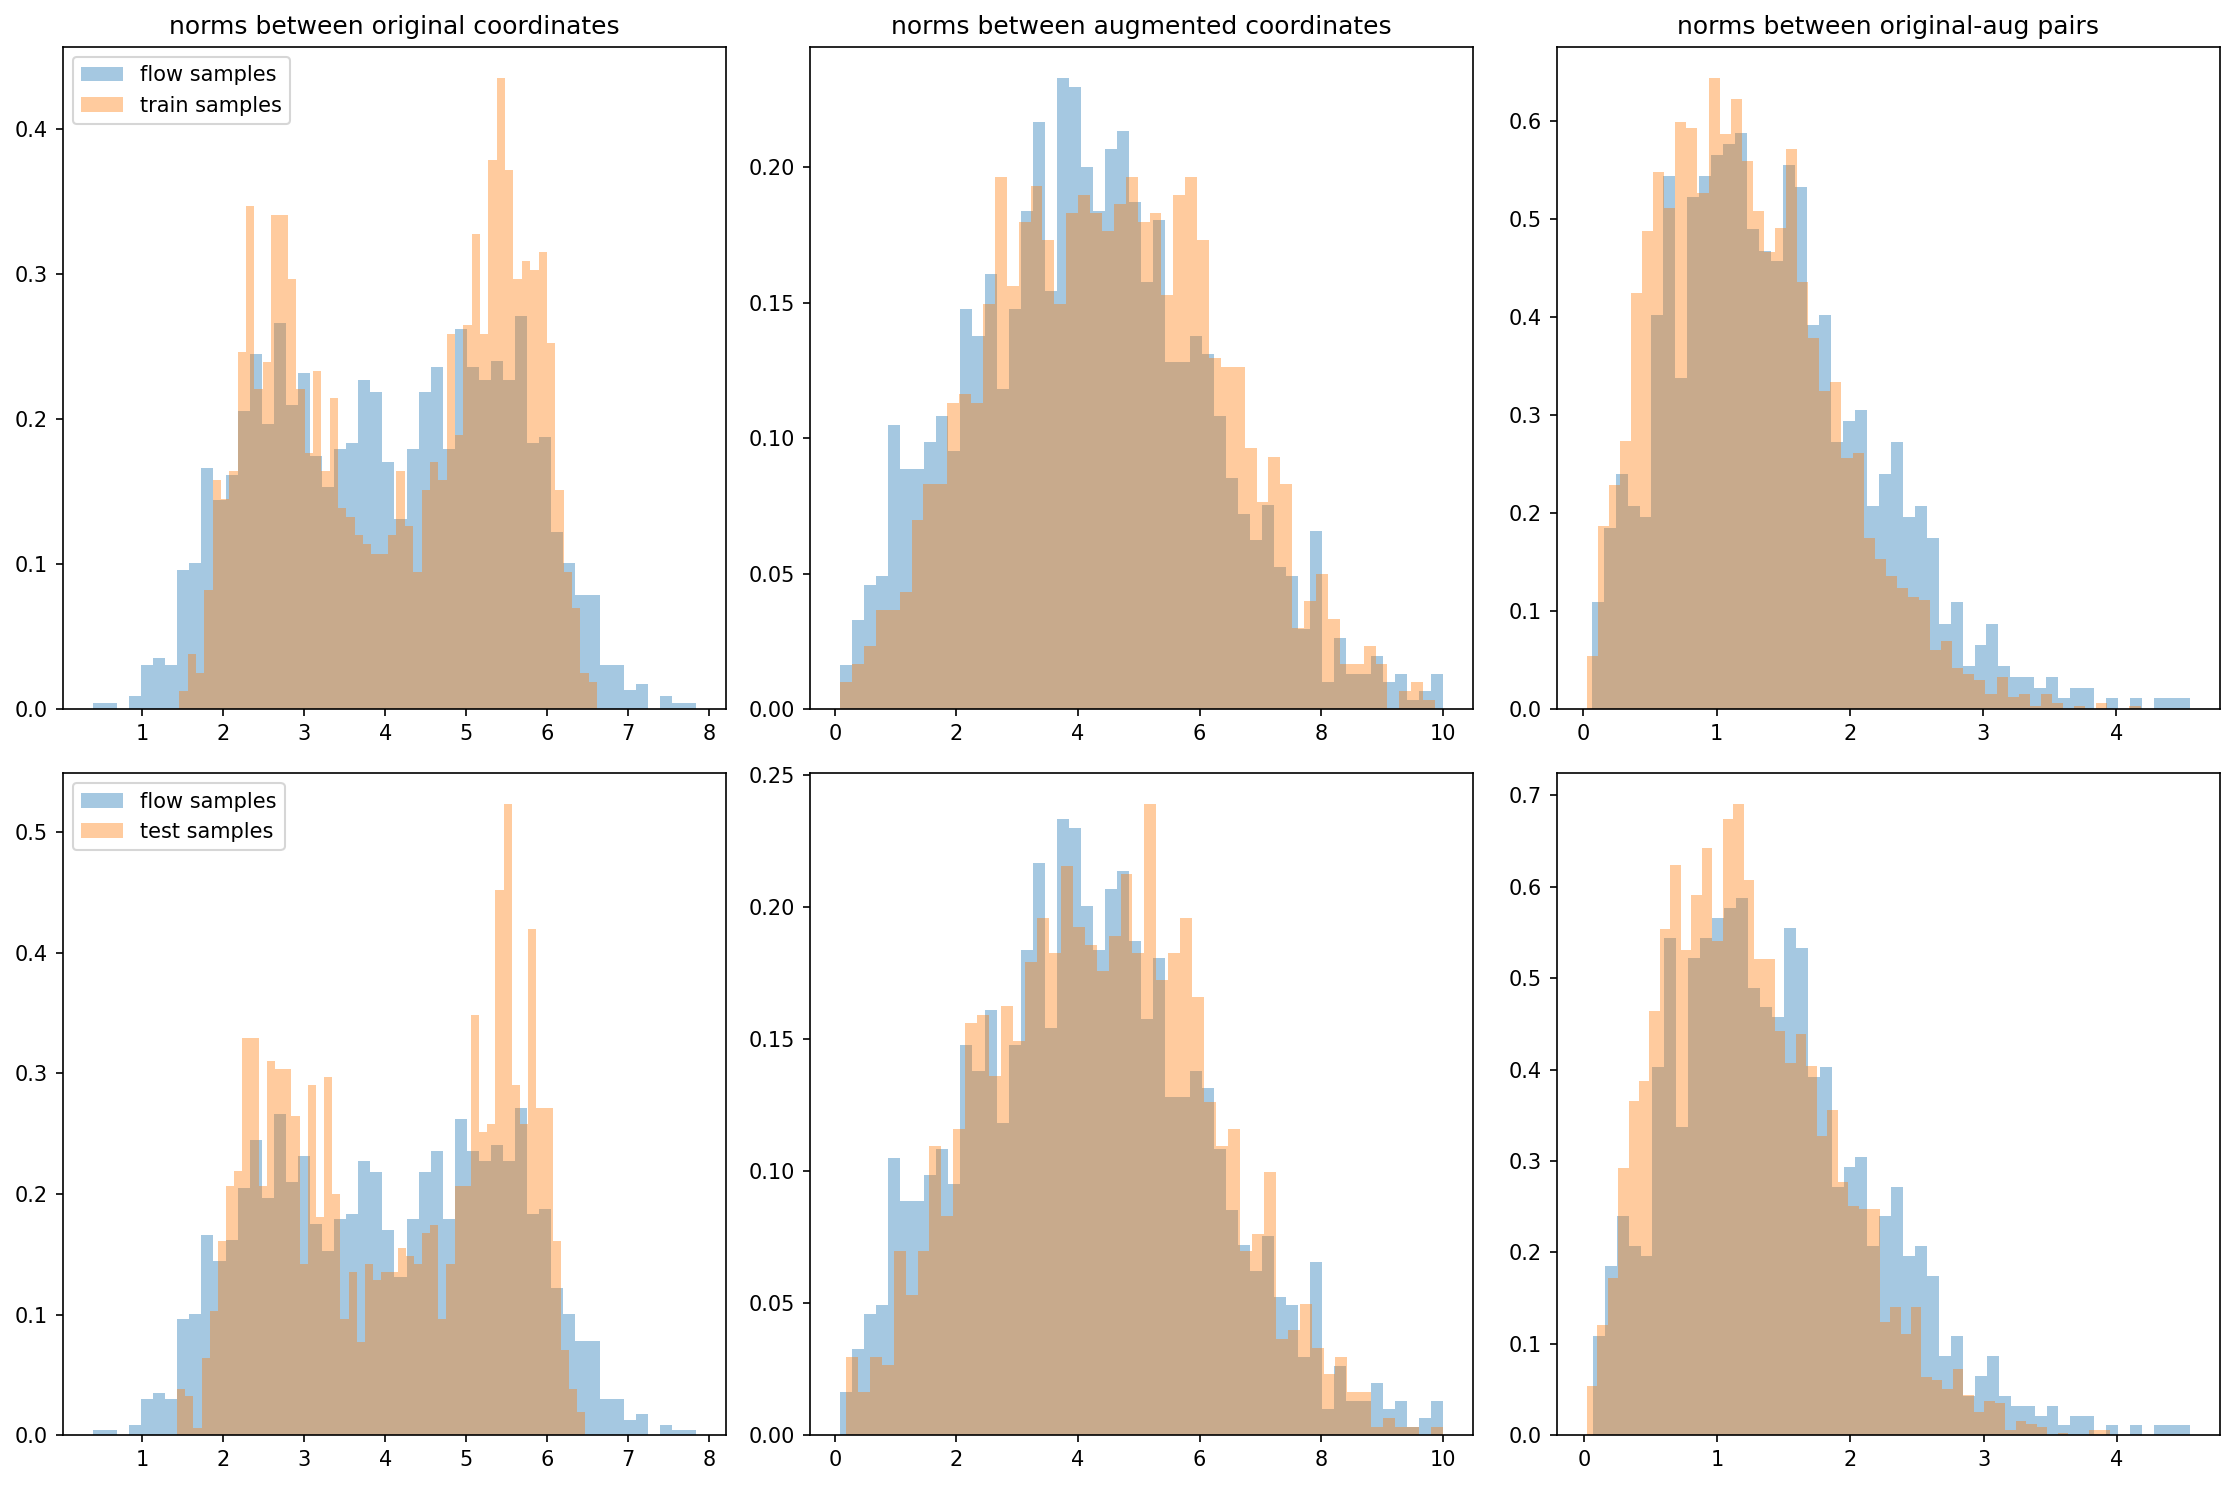

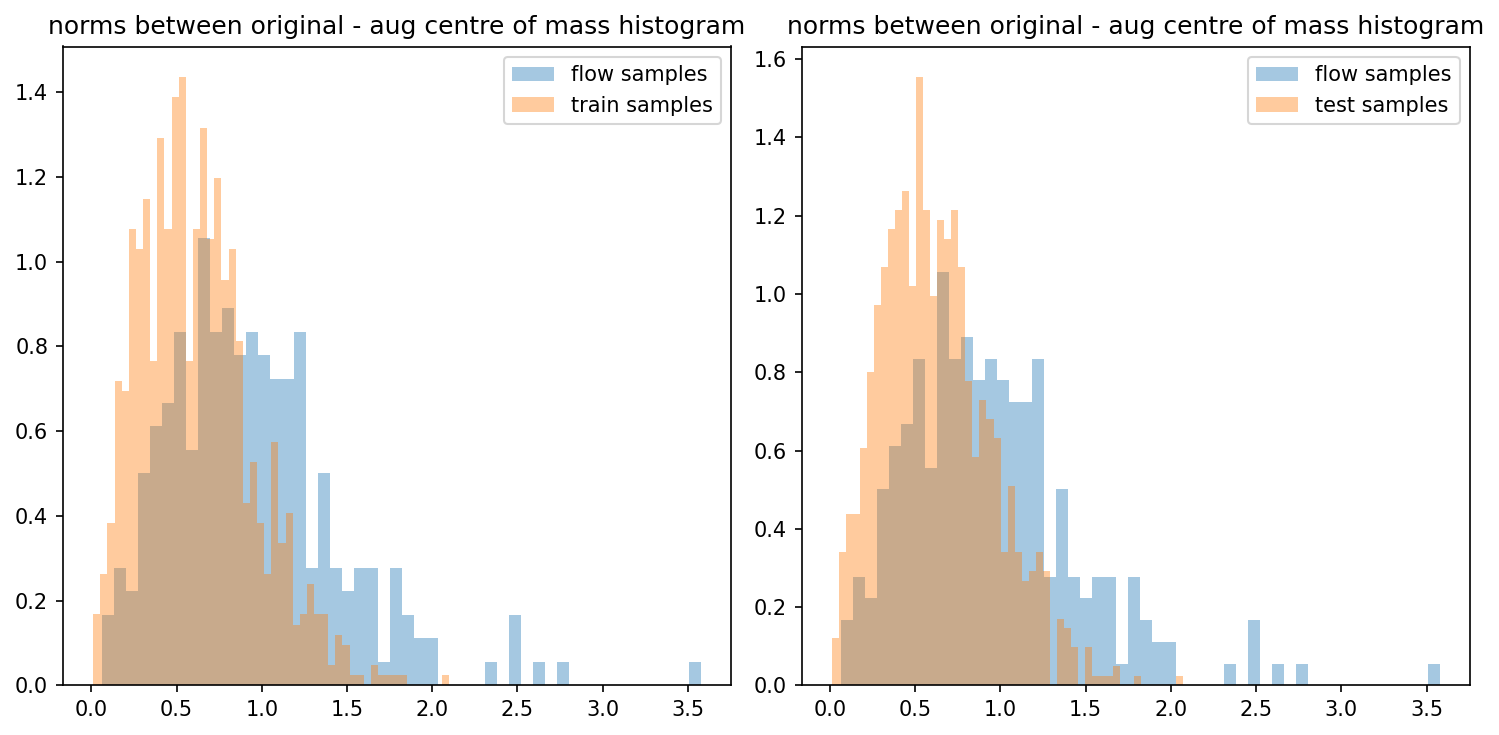

 67%|████████████████████████████▏             | 67/100 [01:01<00:10,  3.25it/s]

{'eval_log_lik': Array(-23.11825, dtype=float32), 'eval_marginal_log_lik': Array(-9.575194, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.000634, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(5.9171678e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.9996197, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.041306, dtype=float32)}


 79%|█████████████████████████████████▏        | 79/100 [01:03<00:04,  4.74it/s]

{'eval_log_lik': Array(-23.160444, dtype=float32), 'eval_marginal_log_lik': Array(-9.64799, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00053806, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(6.564141e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.89796513, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.182577, dtype=float32)}


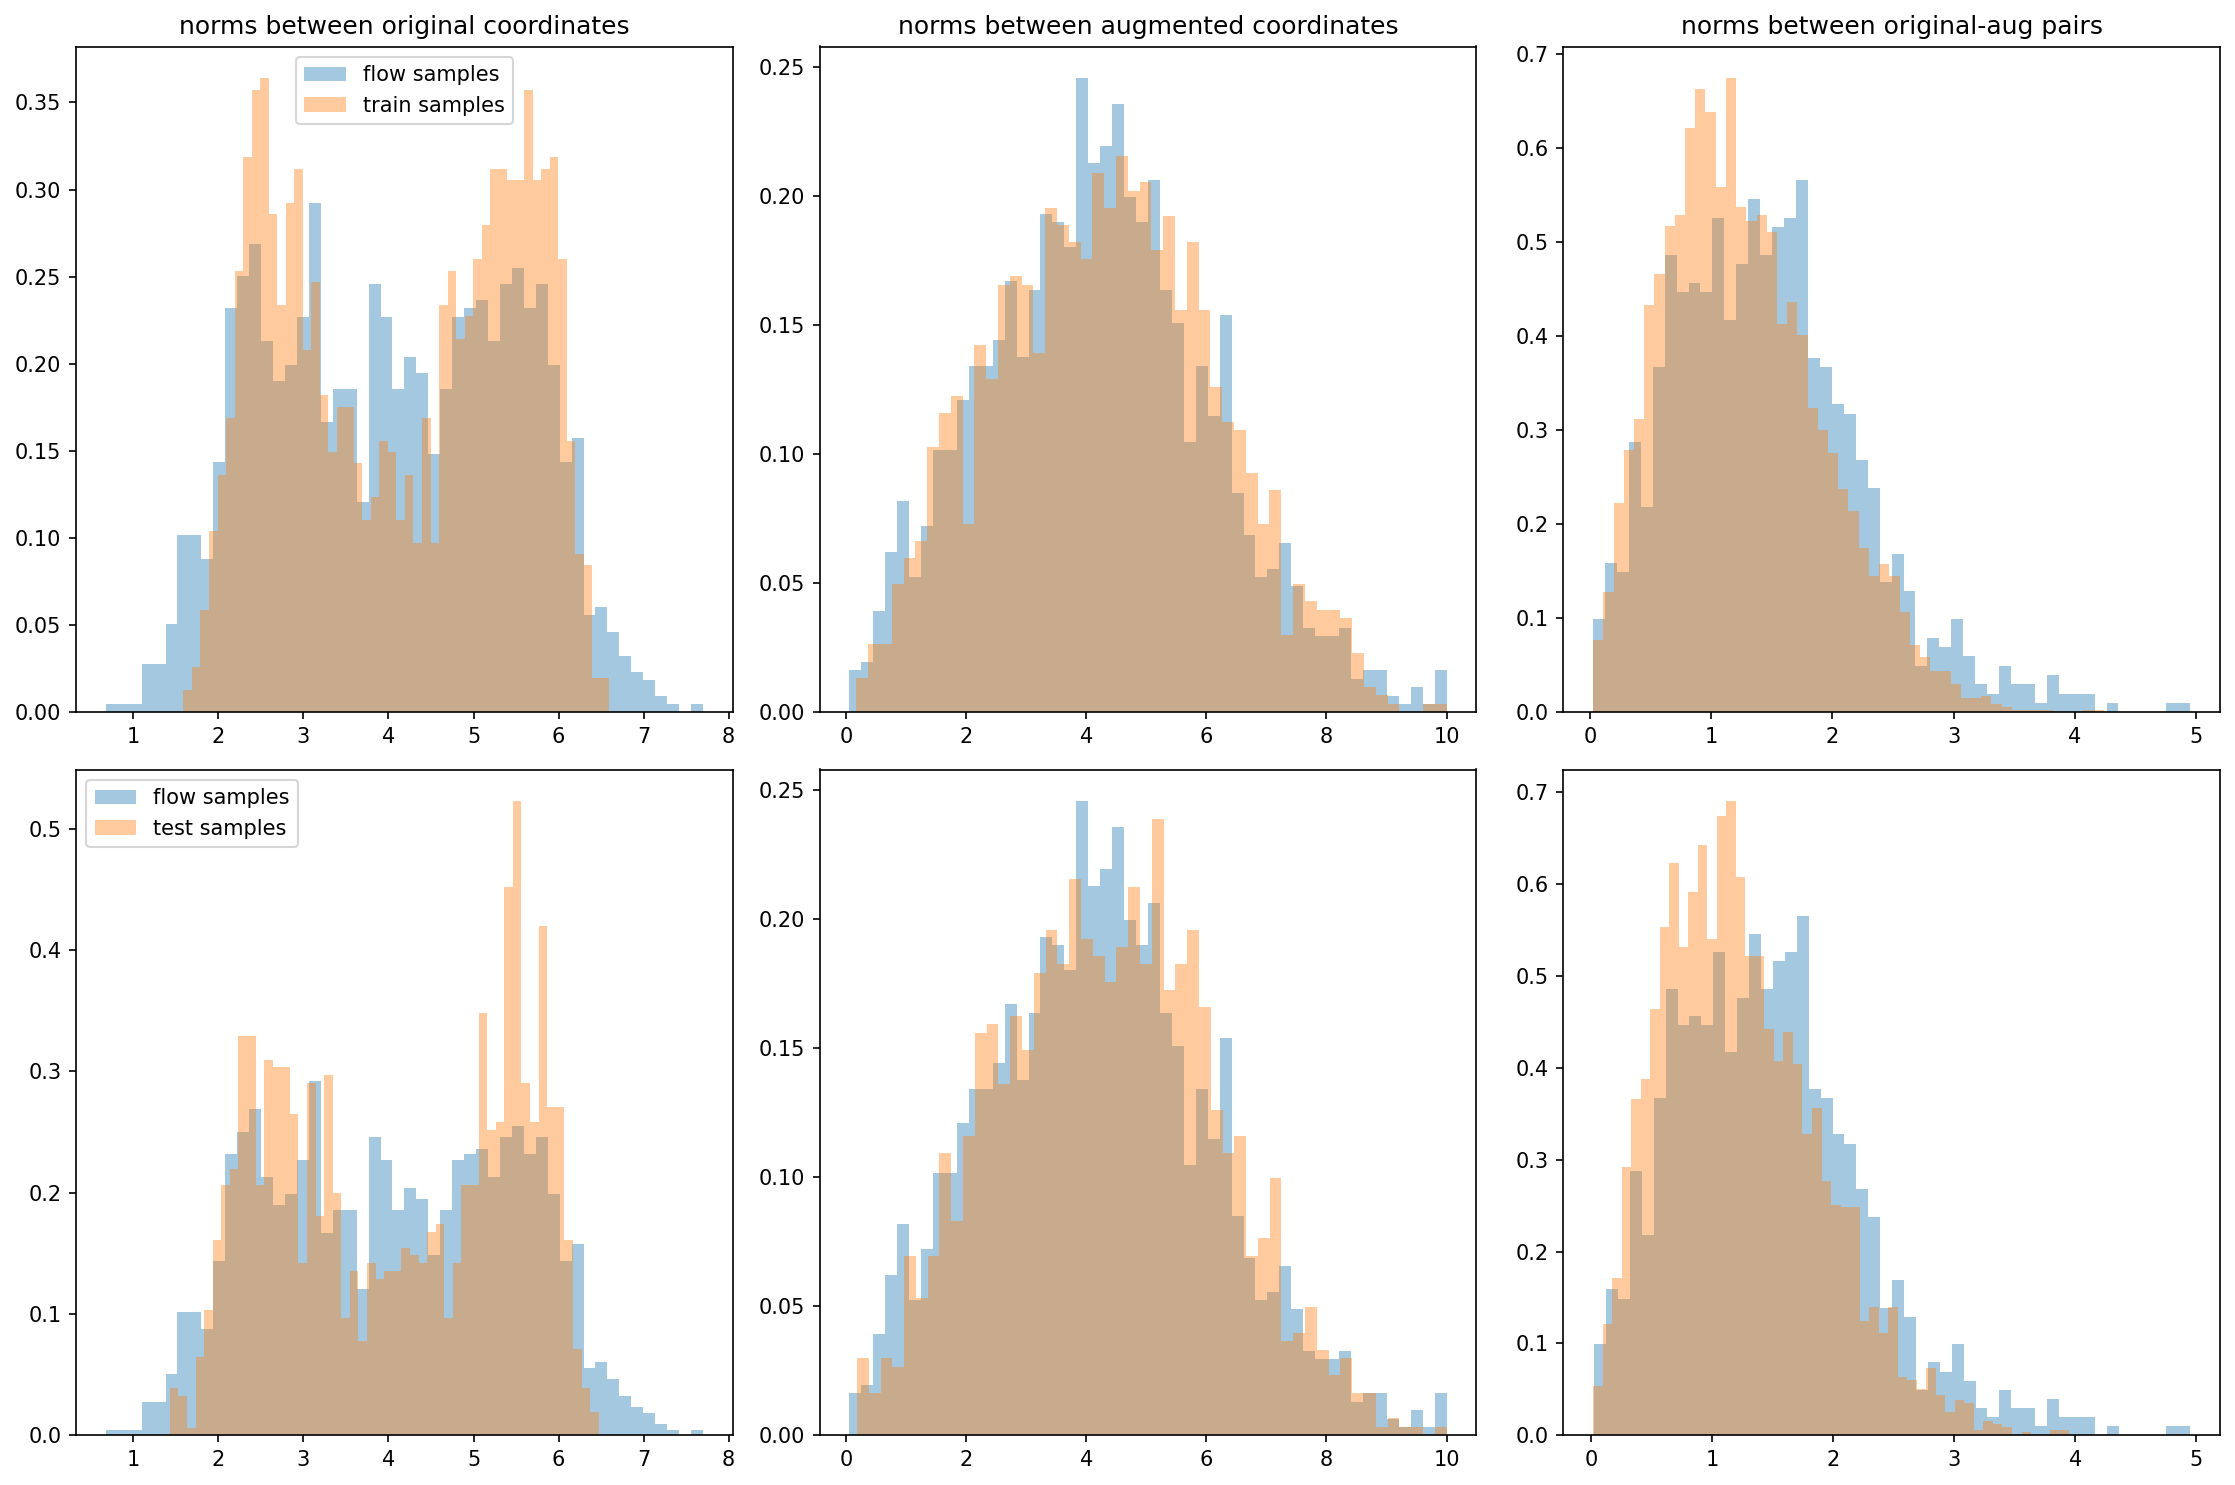

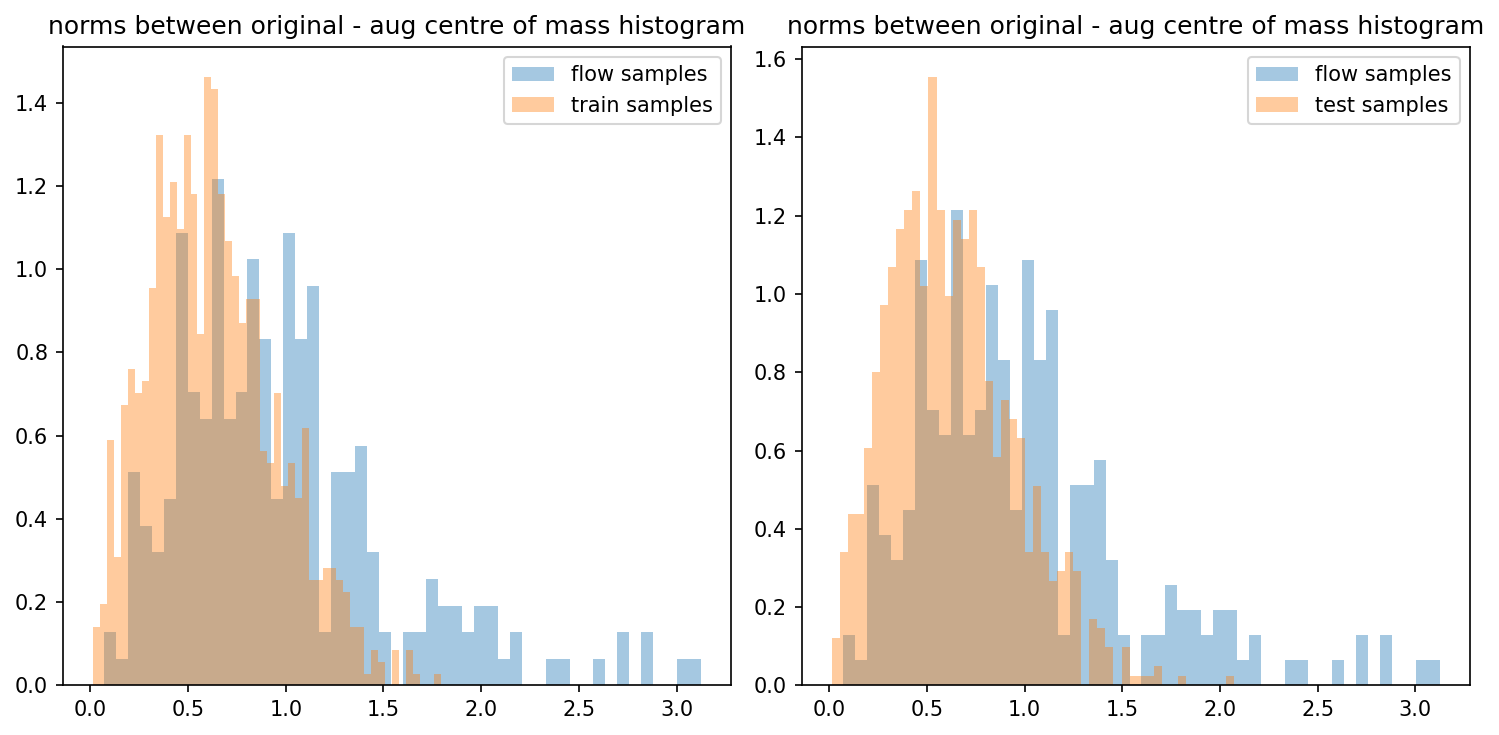

 89%|█████████████████████████████████████▍    | 89/100 [01:09<00:02,  3.71it/s]

{'eval_log_lik': Array(-22.99591, dtype=float32), 'eval_marginal_log_lik': Array(-9.463943, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.0006506, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(5.9694292e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.8802779, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.978424, dtype=float32)}


 99%|█████████████████████████████████████████▌| 99/100 [01:11<00:00,  4.97it/s]

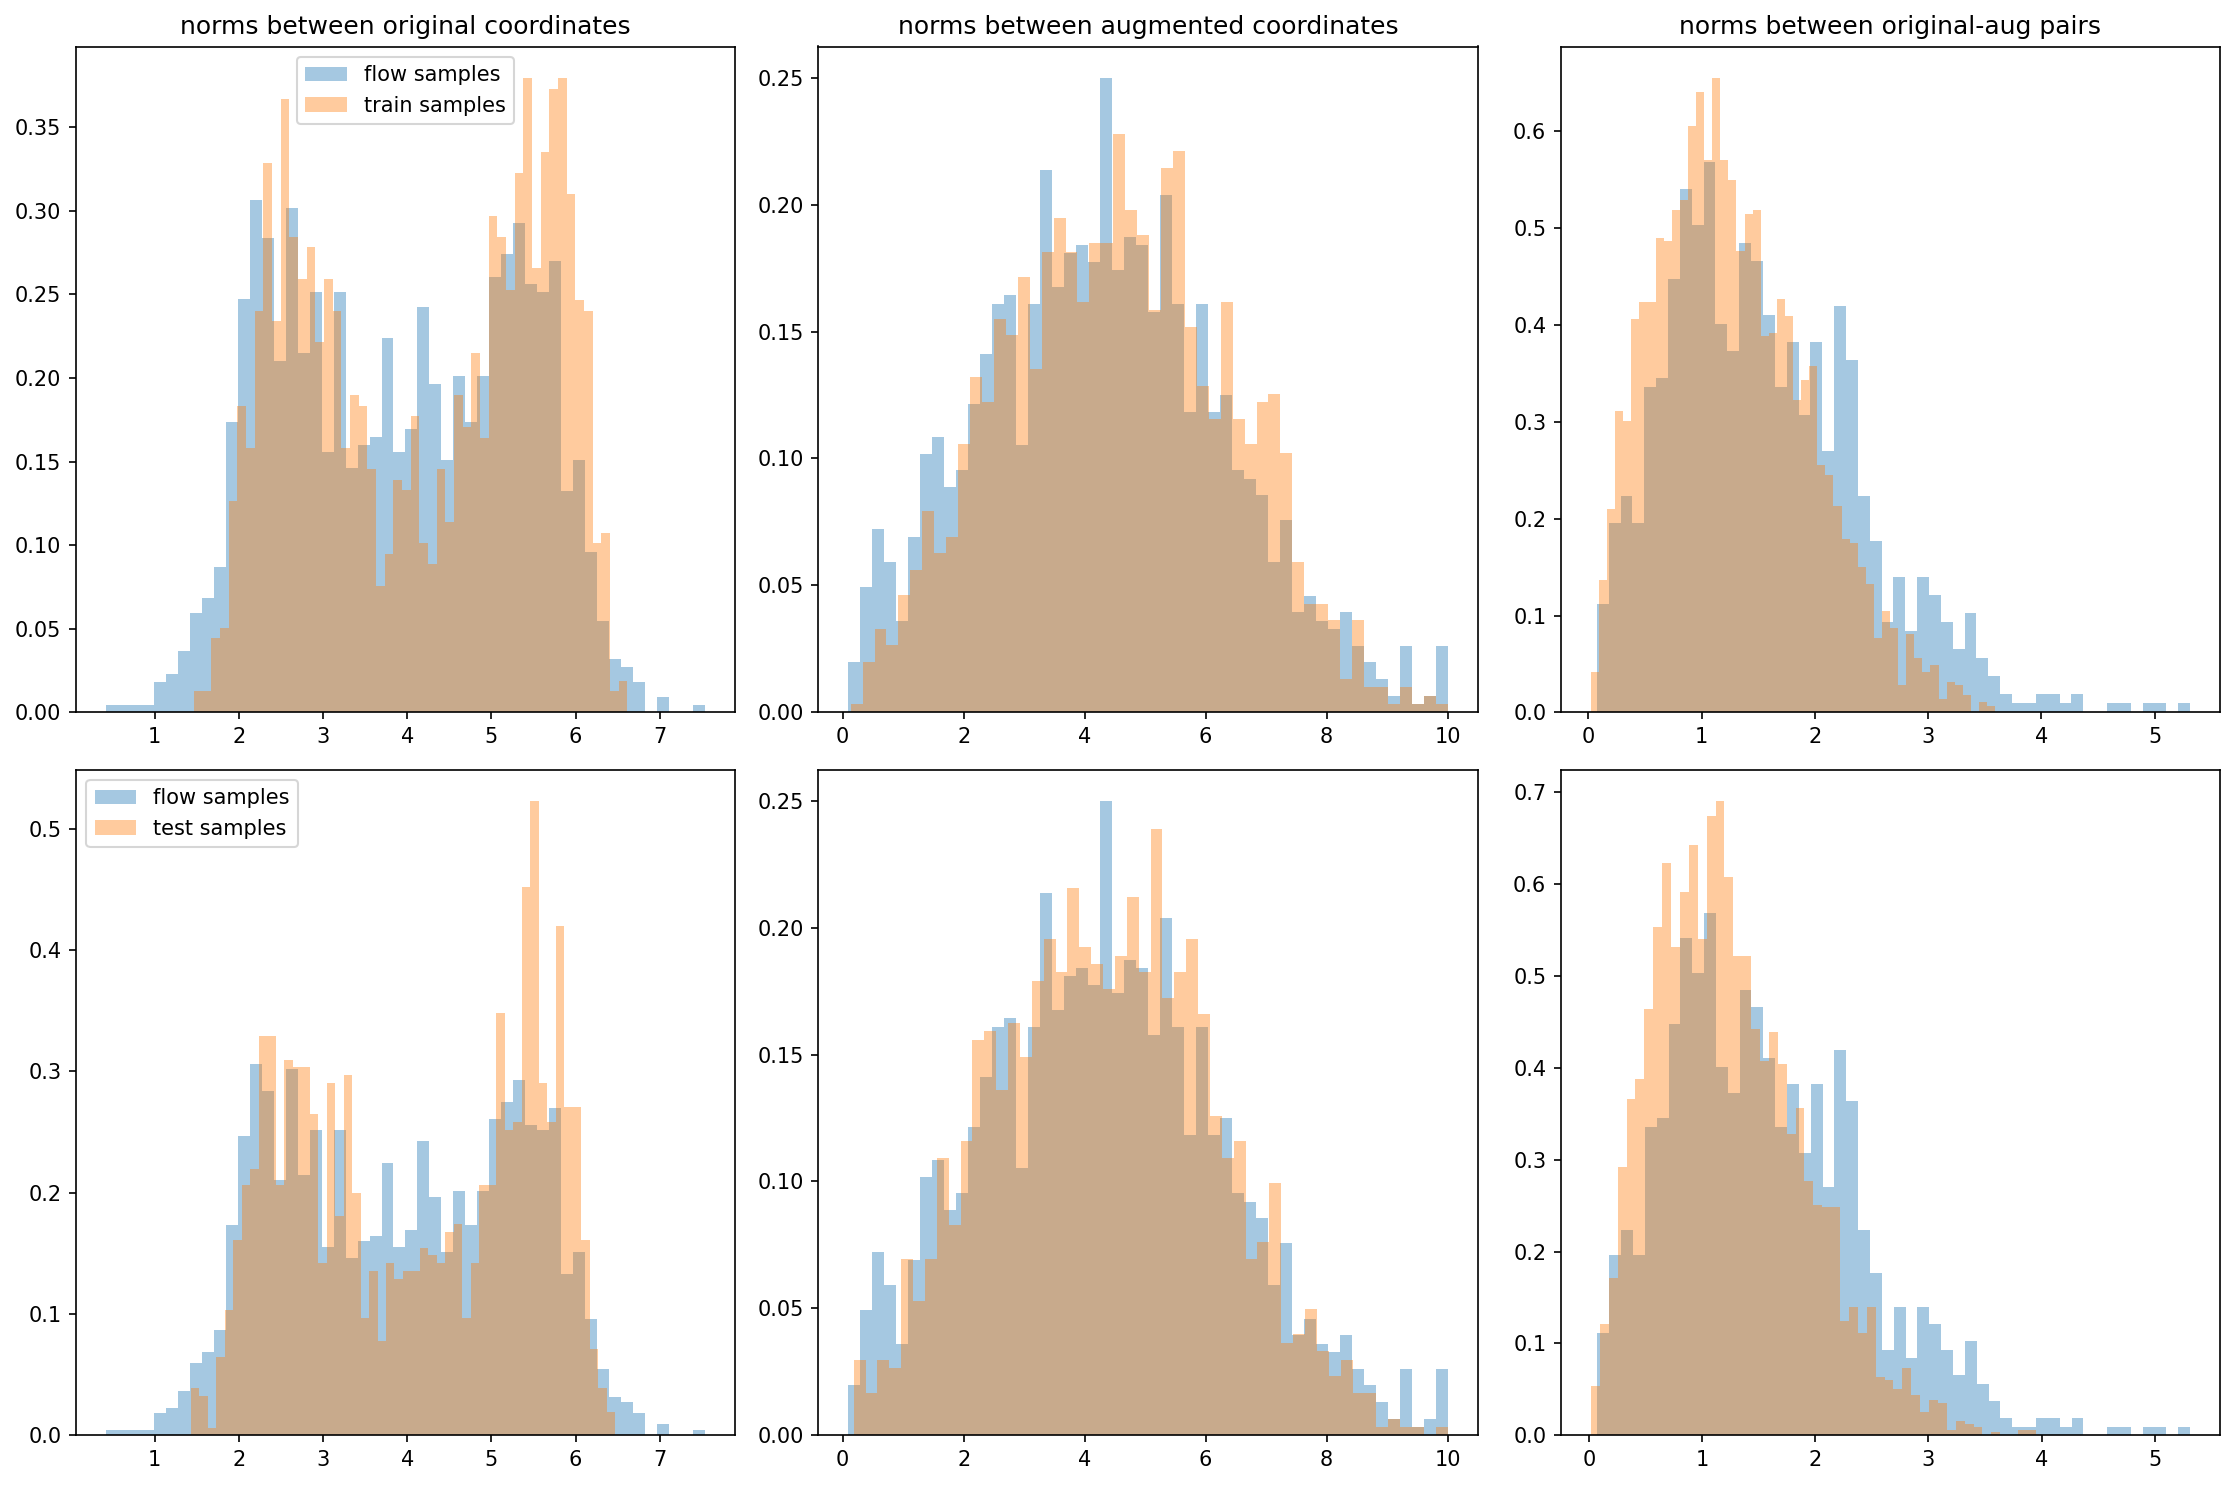

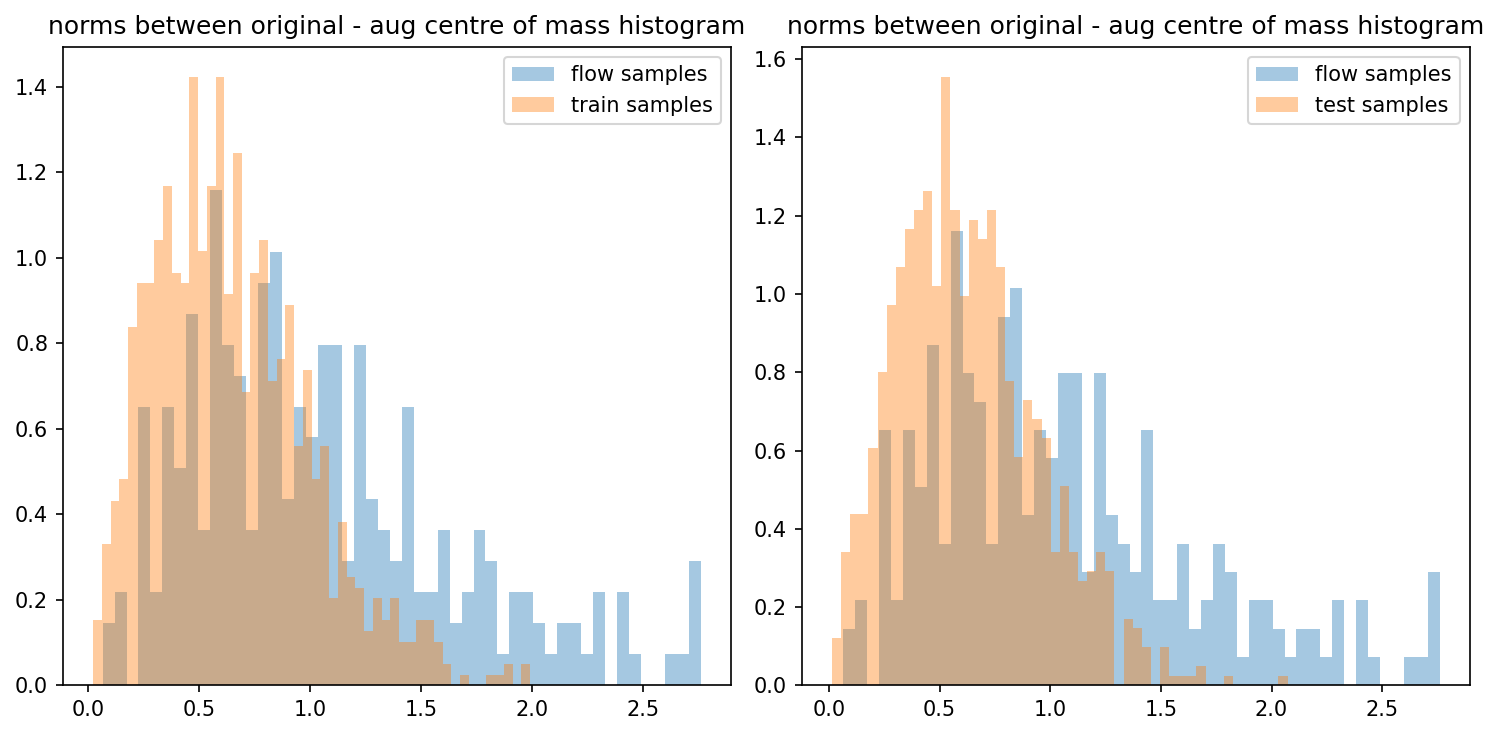

100%|█████████████████████████████████████████| 100/100 [01:16<00:00,  1.31it/s]


{'eval_log_lik': Array(-22.985504, dtype=float32), 'eval_marginal_log_lik': Array(-9.386382, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00065575, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(5.726814e-05, dtype=float32), 'mean_aug_orig_norm': Array(1.0769724, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.225103, dtype=float32)}


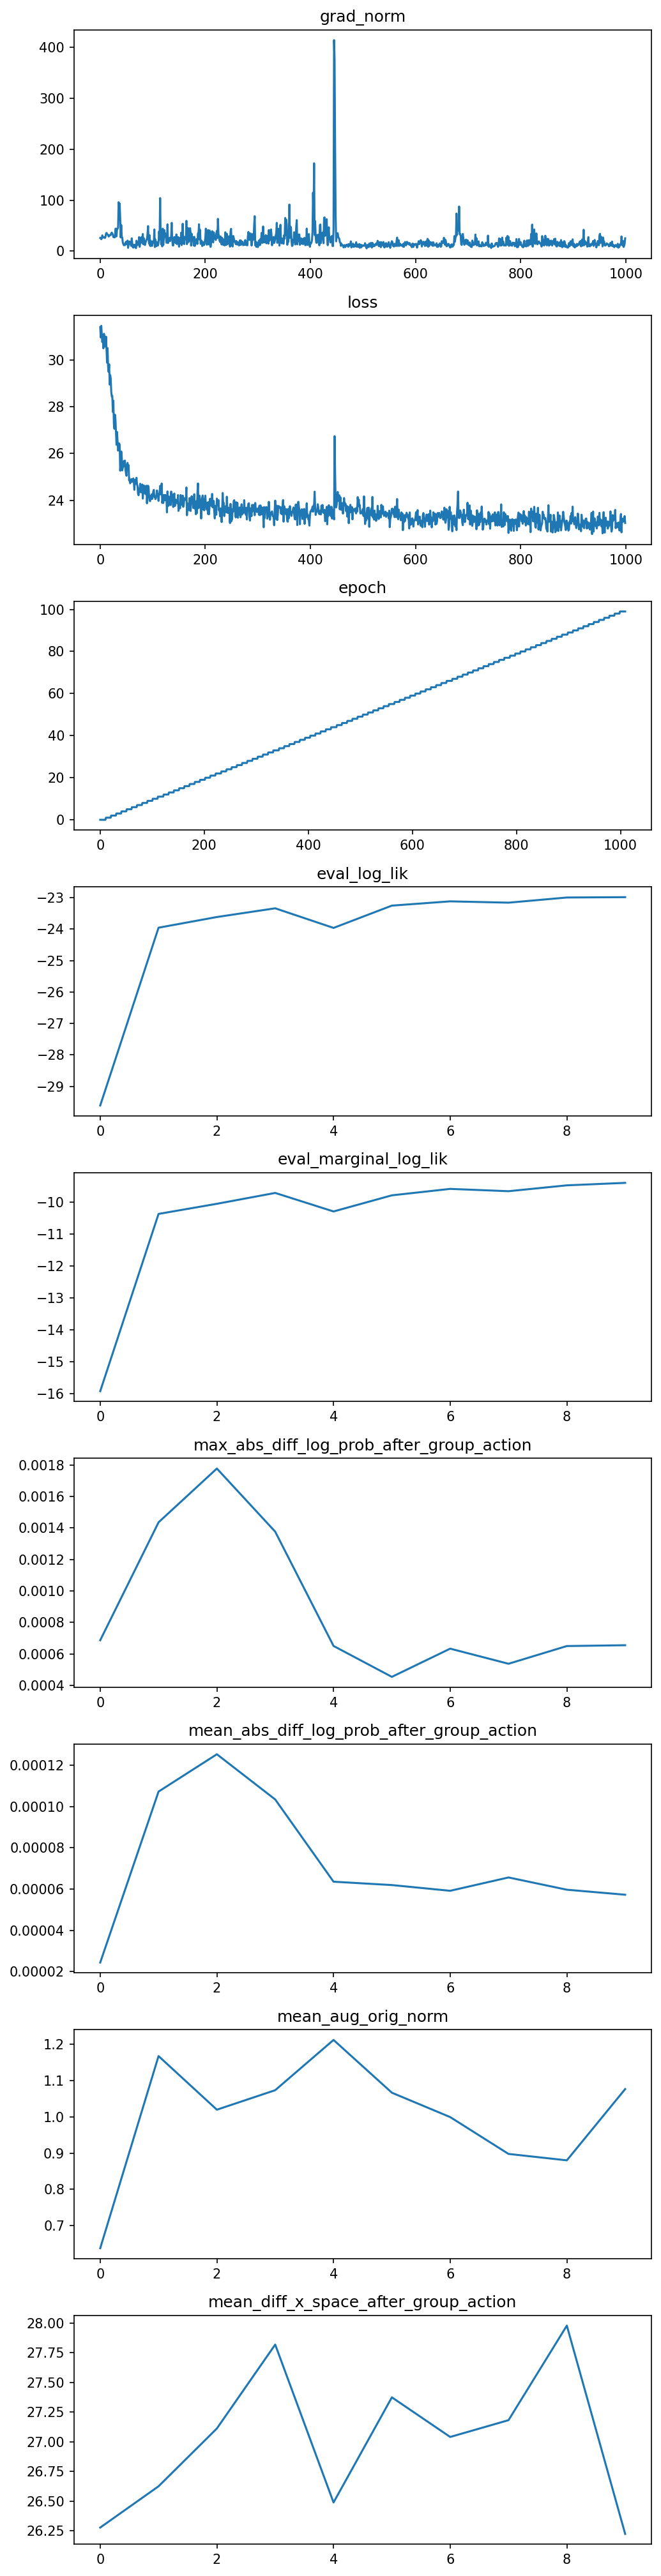

In [10]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)
logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

[<Figure size 2250x1500 with 6 Axes>, <Figure size 1500x750 with 2 Axes>]

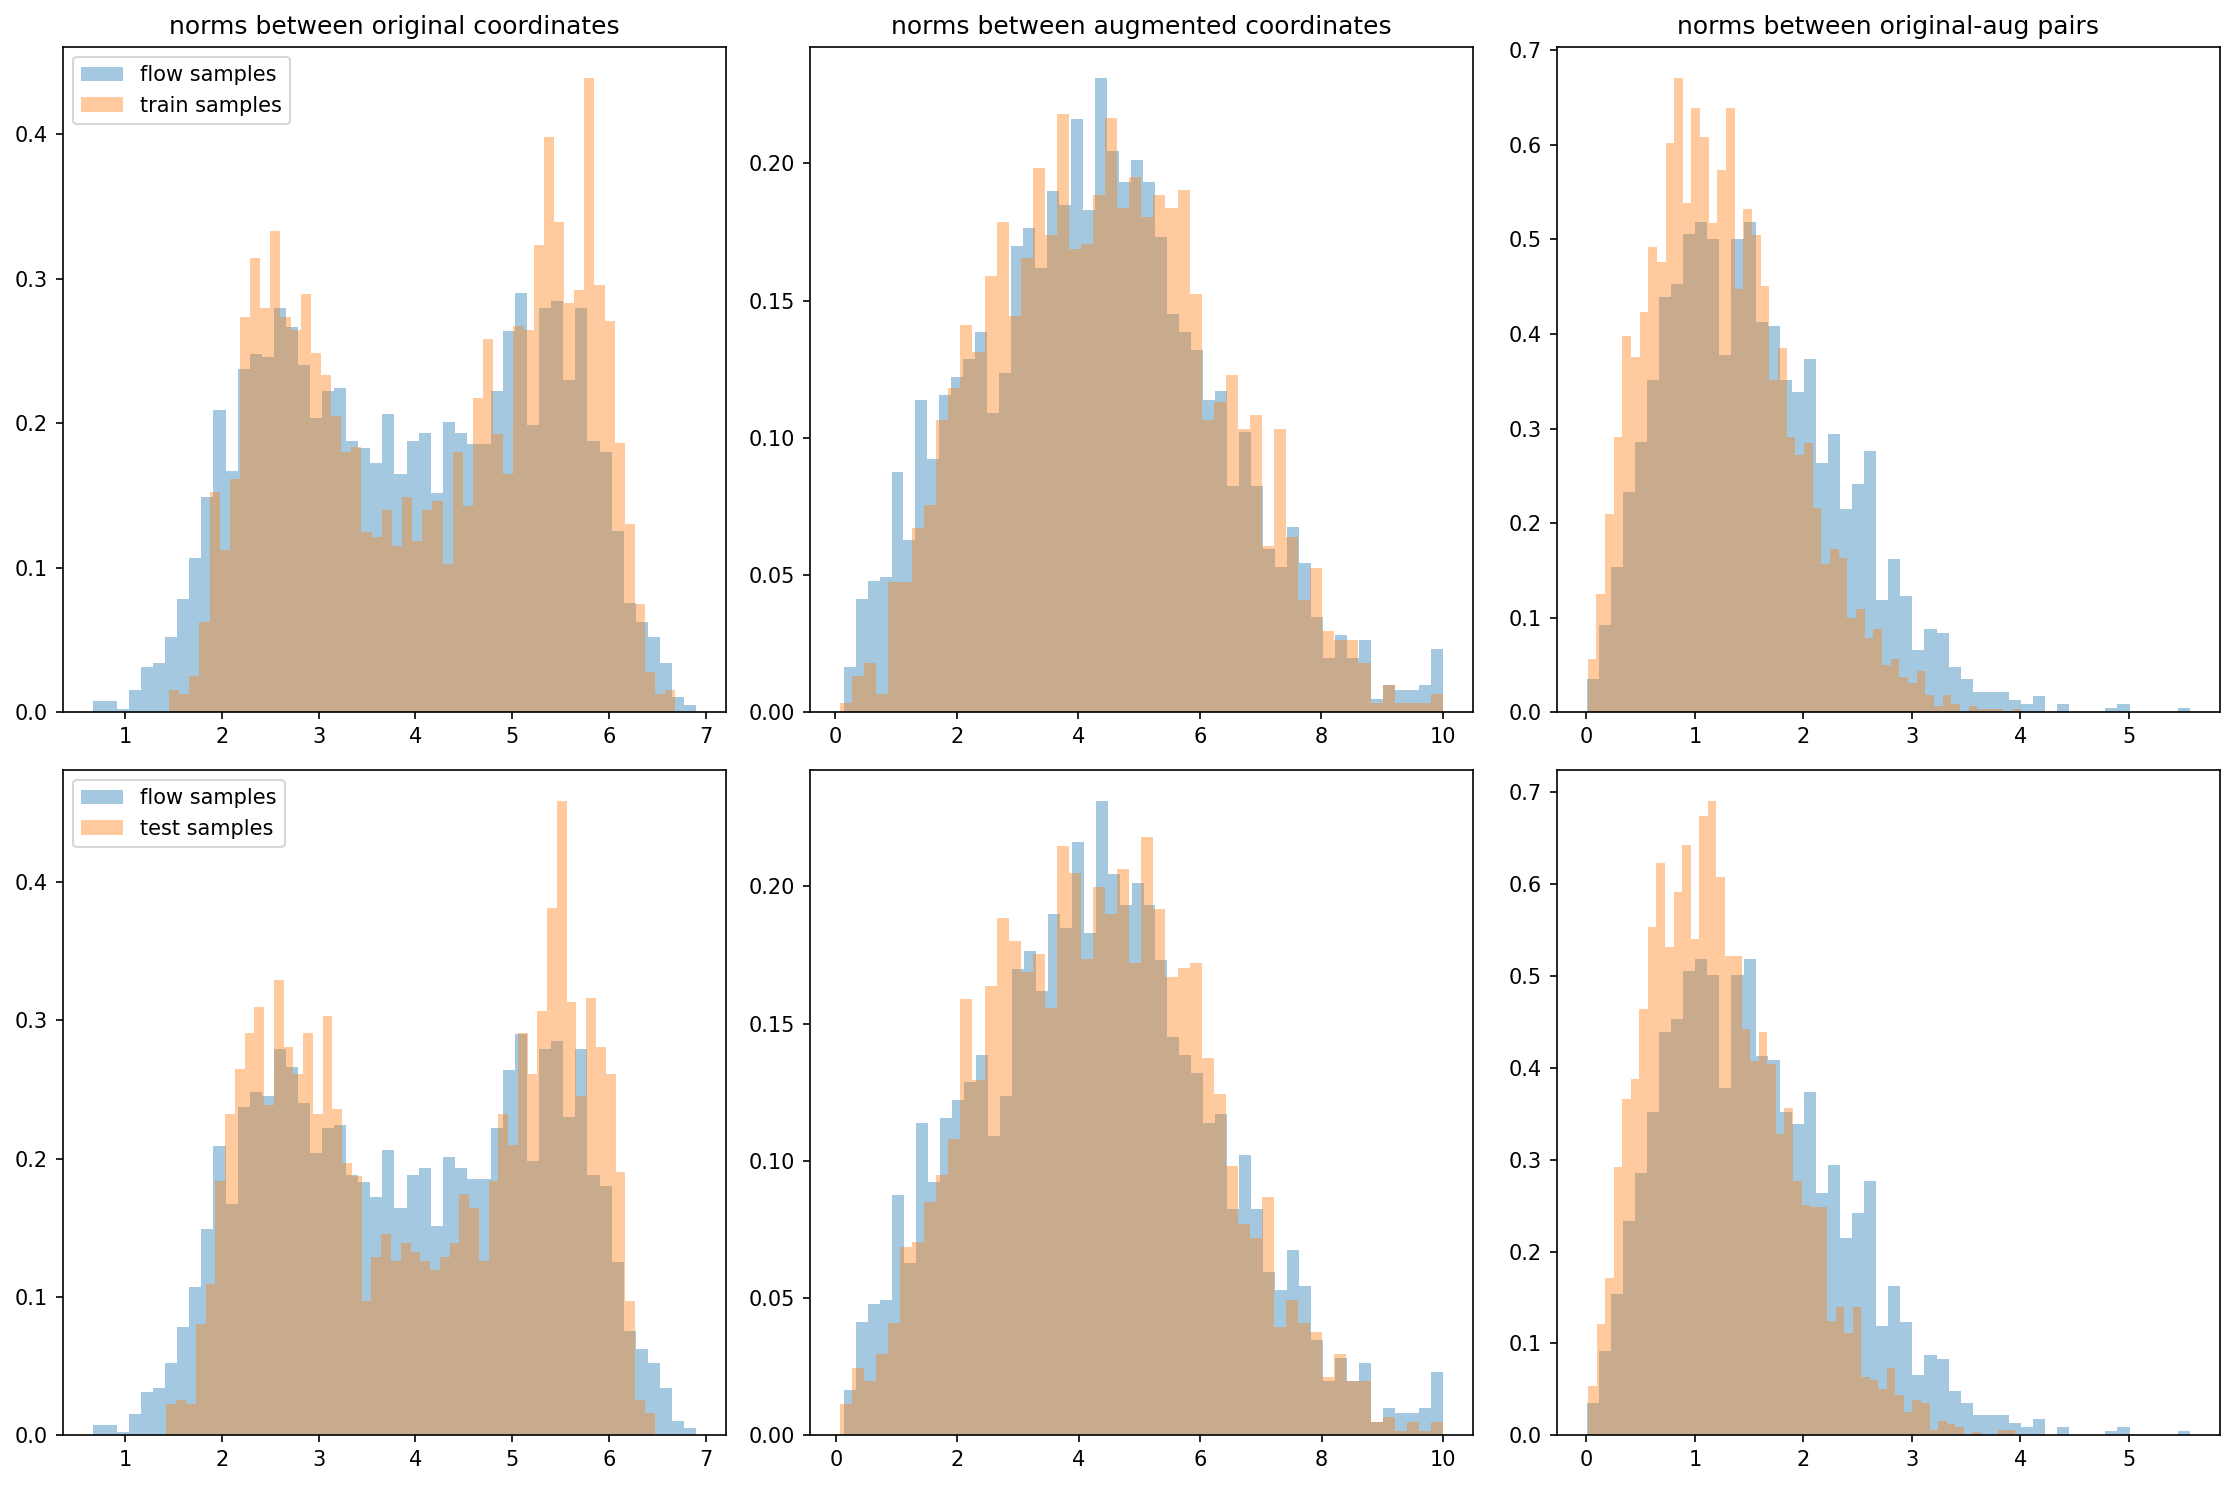

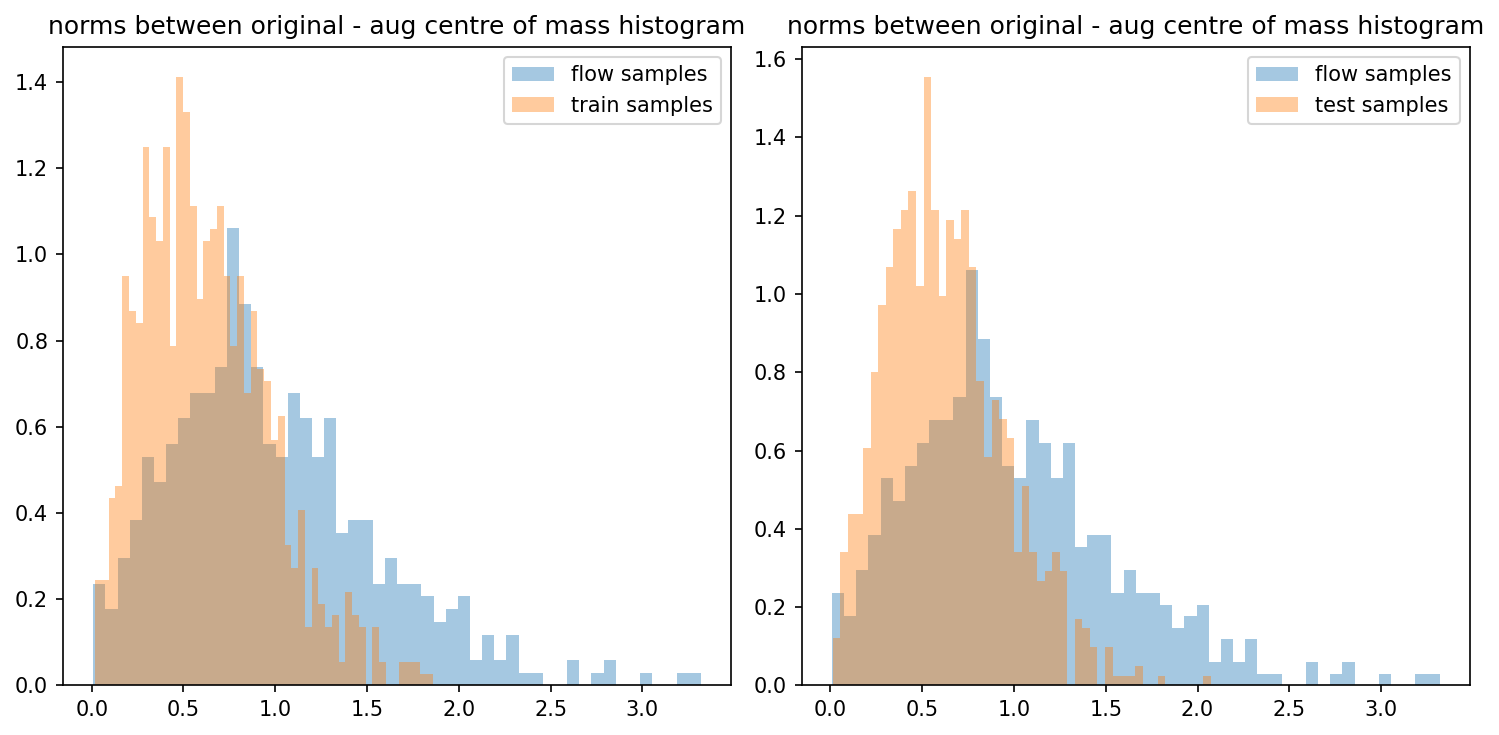

In [15]:
plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [16]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

{'ess': Array(0.04705787, dtype=float32),
 'eval_kl': Array(-996.15857, dtype=float32),
 'eval_log_lik': Array(-22.985504, dtype=float32),
 'eval_marginal_log_lik': Array(-8.893819, dtype=float32),
 'max_abs_diff_log_prob_after_group_action': Array(0.00048752, dtype=float32),
 'mean_abs_diff_log_prob_after_group_action': Array(5.6051253e-05, dtype=float32),
 'mean_aug_orig_norm': Array(1.0264735, dtype=float32),
 'mean_diff_x_space_after_group_action': Array(26.574081, dtype=float32)}

# 